In [1]:
import chipwhisperer as cw
from utils import IbexChipWhisperer, DataGenerator, DataSynthesizer, DataWrangler 
from riscv32_isg import *
import os

In [2]:
datgen = DataGenerator()
datsynth = DataSynthesizer()
softwares = datgen.list_software()

Available software:
#  	Name                	Compiled	Data    	Labeled 	Debugged
----------------------------------------------------------------------
 1.	pre_rvi_mdb_100_0   	   ✓    	   ✓    	   ✓    	   ✗    
 2.	pre_rvi_mdb_100_1   	   ✓    	   ✓    	   ✓    	   ✗    
 3.	pre_rvi_mdb_100_10  	   ✓    	   ✓    	   ✓    	   ✗    
 4.	pre_rvi_mdb_100_100 	   ✓    	   ✓    	   ✓    	   ✗    
 5.	pre_rvi_mdb_100_1000	   ✓    	   ✓    	   ✓    	   ✗    
 6.	pre_rvi_mdb_100_1001	   ✓    	   ✓    	   ✓    	   ✗    
 7.	pre_rvi_mdb_100_1002	   ✓    	   ✓    	   ✓    	   ✗    
 8.	pre_rvi_mdb_100_1003	   ✓    	   ✓    	   ✓    	   ✗    
 9.	pre_rvi_mdb_100_1004	   ✓    	   ✓    	   ✓    	   ✗    
10.	pre_rvi_mdb_100_1005	   ✓    	   ✓    	   ✓    	   ✗    
11.	pre_rvi_mdb_100_1006	   ✓    	   ✓    	   ✓    	   ✗    
12.	pre_rvi_mdb_100_1007	   ✓    	   ✓    	   ✓    	   ✗    
13.	pre_rvi_mdb_100_1008	   ✓    	   ✓    	   ✓    	   ✗    
14.	pre_rvi_mdb_100_1009	   ✓    	   ✓    	   ✓    	   

## Synthesize New Code

Including spike labels and power traces

In [3]:
datsynth = DataSynthesizer(allowed_instructions={'srl', 'addi', 'sh', 'jal', 'bgeu'})
for n_inst in range(5,20):
    if n_inst in [5, 10, 15, 20]:
        continue
    datsynth.extend_corpus(num_instructions = n_inst, num_new_files = 100, prefix="rvi_mdb")
datgen = DataGenerator()
datgen.build_all()
datgen.generate_all_labels()

Software pre_rvi_mdb_100_0 already compiled. Use force=True to rebuild.
Software pre_rvi_mdb_100_1 already compiled. Use force=True to rebuild.
Software pre_rvi_mdb_100_10 already compiled. Use force=True to rebuild.
Software pre_rvi_mdb_100_100 already compiled. Use force=True to rebuild.
Software pre_rvi_mdb_100_1000 already compiled. Use force=True to rebuild.
Software pre_rvi_mdb_100_1001 already compiled. Use force=True to rebuild.
Software pre_rvi_mdb_100_1002 already compiled. Use force=True to rebuild.
Software pre_rvi_mdb_100_1003 already compiled. Use force=True to rebuild.
Software pre_rvi_mdb_100_1004 already compiled. Use force=True to rebuild.
Software pre_rvi_mdb_100_1005 already compiled. Use force=True to rebuild.
Software pre_rvi_mdb_100_1006 already compiled. Use force=True to rebuild.
Software pre_rvi_mdb_100_1007 already compiled. Use force=True to rebuild.
Software pre_rvi_mdb_100_1008 already compiled. Use force=True to rebuild.
Software pre_rvi_mdb_100_1009 alre

(['pre_rvi_mdb_100_0',
  'pre_rvi_mdb_100_1',
  'pre_rvi_mdb_100_10',
  'pre_rvi_mdb_100_100',
  'pre_rvi_mdb_100_1000',
  'pre_rvi_mdb_100_1001',
  'pre_rvi_mdb_100_1002',
  'pre_rvi_mdb_100_1003',
  'pre_rvi_mdb_100_1004',
  'pre_rvi_mdb_100_1005',
  'pre_rvi_mdb_100_1006',
  'pre_rvi_mdb_100_1007',
  'pre_rvi_mdb_100_1008',
  'pre_rvi_mdb_100_1009',
  'pre_rvi_mdb_100_101',
  'pre_rvi_mdb_100_1010',
  'pre_rvi_mdb_100_1011',
  'pre_rvi_mdb_100_1012',
  'pre_rvi_mdb_100_1013',
  'pre_rvi_mdb_100_1014',
  'pre_rvi_mdb_100_1015',
  'pre_rvi_mdb_100_1016',
  'pre_rvi_mdb_100_1017',
  'pre_rvi_mdb_100_1018',
  'pre_rvi_mdb_100_1019',
  'pre_rvi_mdb_100_102',
  'pre_rvi_mdb_100_1020',
  'pre_rvi_mdb_100_1021',
  'pre_rvi_mdb_100_1022',
  'pre_rvi_mdb_100_1023',
  'pre_rvi_mdb_100_1024',
  'pre_rvi_mdb_100_1025',
  'pre_rvi_mdb_100_1026',
  'pre_rvi_mdb_100_1027',
  'pre_rvi_mdb_100_1028',
  'pre_rvi_mdb_100_1029',
  'pre_rvi_mdb_100_103',
  'pre_rvi_mdb_100_1030',
  'pre_rvi_mdb_100_1031'

In [4]:
# Program FGPA with ibex and connect Chipwhisperer
try:
    icw.disconnect()
except:
    pass

bitstream = "ibex_12MHz_512KRAM.bit"  # 12.5 MHz allowing for 16x oversampling

icw = IbexChipWhisperer(oversampling_factor=16)
icw.program_fpga(bitstream=bitstream)
icw.connect()

(ChipWhisperer Target WARNING|File CW305.py:508) No FPGA Bitstream file specified.


✅ FPGA programmed. Next you need to program the firmware using the load_demo_system.sh command from the Ibex repository.
INFO: Found ChipWhisperer😍
scope.gain.mode                          changed from low                       to high                     
scope.gain.gain                          changed from 0                         to 22                       
scope.gain.db                            changed from 15.0                      to 25.091743119266056       
scope.adc.samples                        changed from 131124                    to 5000                     
scope.clock.clkgen_freq                  changed from 0                         to 7363636.363636363        
scope.clock.adc_freq                     changed from 0                         to 29454545.454545453       
scope.io.tio1                            changed from serial_tx                 to serial_rx                
scope.io.tio2                            changed from serial_rx                 to serial

(ChipWhisperer Scope WARNING|File ChipWhispererHuskyClock.py:524) ADC frequency must be between 1MHz and 300000000.0MHz - ADC mul has been adjusted to 3
(ChipWhisperer Scope WARNING|File ChipWhispererHuskyClock.py:527) ADC frequency exceeds specification (200 MHz). 
            This may or may not work, depending on temperature, voltage, and luck.
            It may not work reliably.
            You can run scope.adc_test() to check whether ADC data is sampled properly by the FPGA,
            but this doesn't fully verify that the ADC is working properly.
            Set scope.clock.pll._no_warning_freq if you don't want
            to see this message anymore.
            


In [5]:
datgen.generate_all_data(icw, repetitions=5, force=False)

Data for pre_rvi_mdb_100_0 already generated. Use force=True to regenerate.
Data for pre_rvi_mdb_100_1 already generated. Use force=True to regenerate.
Data for pre_rvi_mdb_100_10 already generated. Use force=True to regenerate.
Data for pre_rvi_mdb_100_100 already generated. Use force=True to regenerate.
Data for pre_rvi_mdb_100_1000 already generated. Use force=True to regenerate.
Data for pre_rvi_mdb_100_1001 already generated. Use force=True to regenerate.
Data for pre_rvi_mdb_100_1002 already generated. Use force=True to regenerate.
Data for pre_rvi_mdb_100_1003 already generated. Use force=True to regenerate.
Data for pre_rvi_mdb_100_1004 already generated. Use force=True to regenerate.
Data for pre_rvi_mdb_100_1005 already generated. Use force=True to regenerate.
Data for pre_rvi_mdb_100_1006 already generated. Use force=True to regenerate.
Data for pre_rvi_mdb_100_1007 already generated. Use force=True to regenerate.
Data for pre_rvi_mdb_100_1008 already generated. Use force=Tr

Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.041915s (52.562 KiB/s)

verified 2256 bytes in 0.038574s (57.114 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Variable trace lengths detected. Padding to max length: 592
Length range: 560 - 592
Successfully captured trace of length 592 for rvi_mdb_11_0

=== Generating data for: rvi_mdb_11_1 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_1/rvi_mdb_11_1-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.060953s (36.209 KiB/s)

verified 2260 bytes in 0.045658s (48.338 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 624 for rvi_mdb_11_1

=== Generating data for: rvi_mdb_11_10 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_10/rvi_mdb_11_10-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.045940s (48.042 KiB/s)

verified 2260 bytes in 0.044222s (49.908 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_11_10

=== Generating data for: rvi_mdb_11_11 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_11/rvi_mdb_11_11-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.044007s (50.241 KiB/s)

verified 2264 bytes in 0.039864s (55.462 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_11_11

=== Generating data for: rvi_mdb_11_12 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_12/rvi_mdb_11_12-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.043081s (51.230 KiB/s)

verified 2260 bytes in 0.042981s (51.349 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 608 for rvi_mdb_11_12

=== Generating data for: rvi_mdb_11_13 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_13/rvi_mdb_11_13-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.039502s (55.871 KiB/s)

verified 2260 bytes in 0.037781s (58.416 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 608 for rvi_mdb_11_13

=== Generating data for: rvi_mdb_11_14 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_14/rvi_mdb_11_14-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.045796s (48.107 KiB/s)

verified 2256 bytes in 0.042334s (52.042 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_11_14

=== Generating data for: rvi_mdb_11_15 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_15/rvi_mdb_11_15-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.081313s (27.094 KiB/s)

verified 2256 bytes in 0.069229s (31.824 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 704 for rvi_mdb_11_15

=== Generating data for: rvi_mdb_11_16 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_16/rvi_mdb_11_16-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.078088s (28.163 KiB/s)

verified 2252 bytes in 0.064137s (34.289 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 592 for rvi_mdb_11_16

=== Generating data for: rvi_mdb_11_17 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_17/rvi_mdb_11_17-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.059074s (37.228 KiB/s)

verified 2252 bytes in 0.062848s (34.993 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 592 for rvi_mdb_11_17

=== Generating data for: rvi_mdb_11_18 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_18/rvi_mdb_11_18-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.054332s (40.693 KiB/s)

verified 2264 bytes in 0.053416s (41.391 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_11_18

=== Generating data for: rvi_mdb_11_19 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_19/rvi_mdb_11_19-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.041622s (52.838 KiB/s)

verified 2252 bytes in 0.040244s (54.647 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 624
Length range: 560 - 624
Successfully captured trace of length 624 for rvi_mdb_11_19

=== Generating data for: rvi_mdb_11_2 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_2/rvi_mdb_11_2-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.038107s (57.712 KiB/s)

verified 2252 bytes in 0.035644s (61.700 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 560 for rvi_mdb_11_2

=== Generating data for: rvi_mdb_11_20 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_20/rvi_mdb_11_20-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.037539s (58.689 KiB/s)

verified 2256 bytes in 0.037135s (59.327 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 560 for rvi_mdb_11_20

=== Generating data for: rvi_mdb_11_21 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_21/rvi_mdb_11_21-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.035826s (61.604 KiB/s)

verified 2260 bytes in 0.034096s (64.730 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_11_21

=== Generating data for: rvi_mdb_11_22 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_22/rvi_mdb_11_22-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.035962s (61.480 KiB/s)

verified 2264 bytes in 0.033460s (66.077 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 736 for rvi_mdb_11_22

=== Generating data for: rvi_mdb_11_23 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_23/rvi_mdb_11_23-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.034370s (64.100 KiB/s)

verified 2256 bytes in 0.032459s (67.874 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_11_23

=== Generating data for: rvi_mdb_11_24 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_24/rvi_mdb_11_24-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.037131s (59.439 KiB/s)

verified 2260 bytes in 0.038465s (57.378 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_11_24

=== Generating data for: rvi_mdb_11_25 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_25/rvi_mdb_11_25-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.036587s (60.323 KiB/s)

verified 2260 bytes in 0.035964s (61.368 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_11_25

=== Generating data for: rvi_mdb_11_26 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_26/rvi_mdb_11_26-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.037748s (58.571 KiB/s)

verified 2264 bytes in 0.033223s (66.548 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_11_26

=== Generating data for: rvi_mdb_11_27 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_27/rvi_mdb_11_27-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.034636s (63.608 KiB/s)

verified 2256 bytes in 0.033355s (66.051 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 608 for rvi_mdb_11_27

=== Generating data for: rvi_mdb_11_28 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_28/rvi_mdb_11_28-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.040779s (54.026 KiB/s)

verified 2256 bytes in 0.035030s (62.893 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 736 for rvi_mdb_11_28

=== Generating data for: rvi_mdb_11_29 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_29/rvi_mdb_11_29-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.036374s (60.569 KiB/s)

verified 2256 bytes in 0.032324s (68.158 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_11_29

=== Generating data for: rvi_mdb_11_3 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_3/rvi_mdb_11_3-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.039693s (55.406 KiB/s)

verified 2252 bytes in 0.041308s (53.240 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_11_3

=== Generating data for: rvi_mdb_11_30 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_30/rvi_mdb_11_30-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.039242s (56.142 KiB/s)

verified 2256 bytes in 0.035648s (61.802 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 768 for rvi_mdb_11_30

=== Generating data for: rvi_mdb_11_31 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_31/rvi_mdb_11_31-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.040813s (53.981 KiB/s)

verified 2256 bytes in 0.040831s (53.957 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 592 for rvi_mdb_11_31

=== Generating data for: rvi_mdb_11_32 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_32/rvi_mdb_11_32-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.036045s (60.905 KiB/s)

verified 2248 bytes in 0.030326s (72.390 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_11_32

=== Generating data for: rvi_mdb_11_33 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_33/rvi_mdb_11_33-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.032788s (67.431 KiB/s)

verified 2264 bytes in 0.035990s (61.432 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 608 for rvi_mdb_11_33

=== Generating data for: rvi_mdb_11_34 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_34/rvi_mdb_11_34-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.036533s (60.198 KiB/s)

verified 2252 bytes in 0.033322s (65.999 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_11_34

=== Generating data for: rvi_mdb_11_35 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_35/rvi_mdb_11_35-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.036659s (60.204 KiB/s)

verified 2260 bytes in 0.033491s (65.899 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_11_35

=== Generating data for: rvi_mdb_11_36 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_36/rvi_mdb_11_36-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.037654s (58.302 KiB/s)

verified 2248 bytes in 0.035699s (61.495 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 576 for rvi_mdb_11_36

=== Generating data for: rvi_mdb_11_37 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_37/rvi_mdb_11_37-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.039657s (55.555 KiB/s)

verified 2256 bytes in 0.039290s (56.073 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_11_37

=== Generating data for: rvi_mdb_11_38 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_38/rvi_mdb_11_38-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.048292s (45.702 KiB/s)

verified 2260 bytes in 0.046382s (47.584 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_11_38

=== Generating data for: rvi_mdb_11_39 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_39/rvi_mdb_11_39-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.039772s (55.492 KiB/s)

verified 2260 bytes in 0.037578s (58.732 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 608 for rvi_mdb_11_39

=== Generating data for: rvi_mdb_11_4 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_4/rvi_mdb_11_4-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.043504s (50.821 KiB/s)

verified 2264 bytes in 0.037490s (58.974 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_11_4

=== Generating data for: rvi_mdb_11_40 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_40/rvi_mdb_11_40-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.035245s (62.509 KiB/s)

verified 2256 bytes in 0.038712s (56.911 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_11_40

=== Generating data for: rvi_mdb_11_41 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_41/rvi_mdb_11_41-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.040069s (54.983 KiB/s)

verified 2256 bytes in 0.042803s (51.471 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 608 for rvi_mdb_11_41

=== Generating data for: rvi_mdb_11_42 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_42/rvi_mdb_11_42-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.039186s (56.123 KiB/s)

verified 2252 bytes in 0.036184s (60.779 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 592 for rvi_mdb_11_42

=== Generating data for: rvi_mdb_11_43 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_43/rvi_mdb_11_43-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.036036s (61.137 KiB/s)

verified 2256 bytes in 0.034408s (64.029 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 736 for rvi_mdb_11_43

=== Generating data for: rvi_mdb_11_44 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_44/rvi_mdb_11_44-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.104796s (21.060 KiB/s)

verified 2260 bytes in 0.037439s (58.950 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 640 for rvi_mdb_11_44

=== Generating data for: rvi_mdb_11_45 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_45/rvi_mdb_11_45-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.095461s (23.079 KiB/s)

verified 2256 bytes in 0.032991s (66.780 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 560 for rvi_mdb_11_45

=== Generating data for: rvi_mdb_11_46 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_46/rvi_mdb_11_46-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.044193s (49.852 KiB/s)

verified 2256 bytes in 0.038232s (57.625 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 608 for rvi_mdb_11_46

=== Generating data for: rvi_mdb_11_47 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_47/rvi_mdb_11_47-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.062319s (35.478 KiB/s)

verified 2264 bytes in 0.038379s (57.608 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_11_47

=== Generating data for: rvi_mdb_11_48 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_48/rvi_mdb_11_48-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.069006s (31.927 KiB/s)

verified 2256 bytes in 0.036021s (61.162 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 608 for rvi_mdb_11_48

=== Generating data for: rvi_mdb_11_49 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_49/rvi_mdb_11_49-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.040359s (54.491 KiB/s)

verified 2252 bytes in 0.035971s (61.139 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_11_49

=== Generating data for: rvi_mdb_11_5 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_5/rvi_mdb_11_5-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.040487s (54.416 KiB/s)

verified 2256 bytes in 0.037468s (58.800 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 560
Length range: 528 - 560
Successfully captured trace of length 560 for rvi_mdb_11_5

=== Generating data for: rvi_mdb_11_50 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_50/rvi_mdb_11_50-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.045403s (48.610 KiB/s)

verified 2260 bytes in 0.043192s (51.098 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 576 for rvi_mdb_11_50

=== Generating data for: rvi_mdb_11_51 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_51/rvi_mdb_11_51-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.036128s (61.089 KiB/s)

verified 2260 bytes in 0.036450s (60.550 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_11_51

=== Generating data for: rvi_mdb_11_52 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_52/rvi_mdb_11_52-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.036164s (60.812 KiB/s)

verified 2252 bytes in 0.034760s (63.269 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_11_52

=== Generating data for: rvi_mdb_11_53 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_53/rvi_mdb_11_53-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.036270s (60.742 KiB/s)

verified 2256 bytes in 0.034040s (64.722 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_11_53

=== Generating data for: rvi_mdb_11_54 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_54/rvi_mdb_11_54-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.039523s (55.743 KiB/s)

verified 2256 bytes in 0.034960s (63.018 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_11_54

=== Generating data for: rvi_mdb_11_55 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_55/rvi_mdb_11_55-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.037285s (59.089 KiB/s)

verified 2256 bytes in 0.041842s (52.653 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_11_55

=== Generating data for: rvi_mdb_11_56 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_56/rvi_mdb_11_56-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.037632s (58.544 KiB/s)

verified 2256 bytes in 0.034880s (63.163 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 592 for rvi_mdb_11_56

=== Generating data for: rvi_mdb_11_57 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_57/rvi_mdb_11_57-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.036006s (61.079 KiB/s)

verified 2252 bytes in 0.033792s (65.081 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_11_57

=== Generating data for: rvi_mdb_11_58 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_58/rvi_mdb_11_58-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.041240s (53.422 KiB/s)

verified 2256 bytes in 0.039052s (56.415 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_11_58

=== Generating data for: rvi_mdb_11_59 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_59/rvi_mdb_11_59-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.037349s (58.883 KiB/s)

verified 2252 bytes in 0.034753s (63.281 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_11_59

=== Generating data for: rvi_mdb_11_6 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_6/rvi_mdb_11_6-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.036621s (60.160 KiB/s)

verified 2256 bytes in 0.035209s (62.573 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 608 for rvi_mdb_11_6

=== Generating data for: rvi_mdb_11_60 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_60/rvi_mdb_11_60-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.035581s (62.028 KiB/s)

verified 2260 bytes in 0.037528s (58.810 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 688 for rvi_mdb_11_60

=== Generating data for: rvi_mdb_11_61 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_61/rvi_mdb_11_61-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.038571s (57.220 KiB/s)

verified 2260 bytes in 0.034705s (63.594 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 592 for rvi_mdb_11_61

=== Generating data for: rvi_mdb_11_62 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_62/rvi_mdb_11_62-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.043054s (51.262 KiB/s)

verified 2260 bytes in 0.045783s (48.206 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 608 for rvi_mdb_11_62

=== Generating data for: rvi_mdb_11_63 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_63/rvi_mdb_11_63-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.033984s (65.173 KiB/s)

verified 2268 bytes in 0.034080s (64.990 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 688 for rvi_mdb_11_63

=== Generating data for: rvi_mdb_11_64 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_64/rvi_mdb_11_64-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.039267s (56.106 KiB/s)

verified 2256 bytes in 0.032902s (66.960 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 608 for rvi_mdb_11_64

=== Generating data for: rvi_mdb_11_65 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_65/rvi_mdb_11_65-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.041250s (53.504 KiB/s)

verified 2260 bytes in 0.035213s (62.677 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 592 for rvi_mdb_11_65

=== Generating data for: rvi_mdb_11_66 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_66/rvi_mdb_11_66-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.035312s (62.390 KiB/s)

verified 2256 bytes in 0.033672s (65.429 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 688 for rvi_mdb_11_66

=== Generating data for: rvi_mdb_11_67 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_67/rvi_mdb_11_67-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.036819s (59.731 KiB/s)

verified 2252 bytes in 0.033412s (65.821 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 608 for rvi_mdb_11_67

=== Generating data for: rvi_mdb_11_68 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_68/rvi_mdb_11_68-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.039507s (55.864 KiB/s)

verified 2260 bytes in 0.035035s (62.995 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_11_68

=== Generating data for: rvi_mdb_11_69 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_69/rvi_mdb_11_69-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.034599s (63.902 KiB/s)

verified 2264 bytes in 0.033839s (65.337 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_11_69

=== Generating data for: rvi_mdb_11_7 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_7/rvi_mdb_11_7-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.040041s (55.022 KiB/s)

verified 2256 bytes in 0.042167s (52.248 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 752 for rvi_mdb_11_7

=== Generating data for: rvi_mdb_11_70 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_70/rvi_mdb_11_70-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.038505s (57.217 KiB/s)

verified 2256 bytes in 0.035088s (62.789 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 608 for rvi_mdb_11_70

=== Generating data for: rvi_mdb_11_71 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_71/rvi_mdb_11_71-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.038989s (56.607 KiB/s)

verified 2260 bytes in 0.034381s (64.193 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_11_71

=== Generating data for: rvi_mdb_11_72 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_72/rvi_mdb_11_72-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.039512s (55.857 KiB/s)

verified 2260 bytes in 0.036307s (60.788 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_11_72

=== Generating data for: rvi_mdb_11_73 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_73/rvi_mdb_11_73-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.046887s (47.071 KiB/s)

verified 2260 bytes in 0.039491s (55.887 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 704 for rvi_mdb_11_73

=== Generating data for: rvi_mdb_11_74 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_74/rvi_mdb_11_74-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.039739s (55.243 KiB/s)

verified 2248 bytes in 0.044459s (49.378 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 608 for rvi_mdb_11_74

=== Generating data for: rvi_mdb_11_75 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_75/rvi_mdb_11_75-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.038101s (57.823 KiB/s)

verified 2256 bytes in 0.038196s (57.679 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_11_75

=== Generating data for: rvi_mdb_11_76 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_76/rvi_mdb_11_76-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.037535s (58.591 KiB/s)

verified 2252 bytes in 0.037983s (57.900 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 576 for rvi_mdb_11_76

=== Generating data for: rvi_mdb_11_77 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_77/rvi_mdb_11_77-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.080513s (27.364 KiB/s)

verified 2256 bytes in 0.039755s (55.418 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_11_77

=== Generating data for: rvi_mdb_11_78 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_78/rvi_mdb_11_78-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.130687s (16.858 KiB/s)

verified 2256 bytes in 0.038243s (57.609 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 592 for rvi_mdb_11_78

=== Generating data for: rvi_mdb_11_79 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_79/rvi_mdb_11_79-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.108158s (20.333 KiB/s)

verified 2252 bytes in 0.039964s (55.030 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 576 for rvi_mdb_11_79

=== Generating data for: rvi_mdb_11_8 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_8/rvi_mdb_11_8-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.106929s (20.604 KiB/s)

verified 2256 bytes in 0.035072s (62.817 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 608 for rvi_mdb_11_8

=== Generating data for: rvi_mdb_11_80 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_80/rvi_mdb_11_80-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.093147s (23.694 KiB/s)

verified 2260 bytes in 0.038143s (57.862 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 752 for rvi_mdb_11_80

=== Generating data for: rvi_mdb_11_81 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_81/rvi_mdb_11_81-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.041389s (53.230 KiB/s)

verified 2256 bytes in 0.039914s (55.197 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 592 for rvi_mdb_11_81

=== Generating data for: rvi_mdb_11_82 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_82/rvi_mdb_11_82-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.042045s (52.399 KiB/s)

verified 2256 bytes in 0.039728s (55.455 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 560 for rvi_mdb_11_82

=== Generating data for: rvi_mdb_11_83 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_83/rvi_mdb_11_83-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.038112s (57.704 KiB/s)

verified 2252 bytes in 0.035473s (61.997 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 688 for rvi_mdb_11_83

=== Generating data for: rvi_mdb_11_84 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_84/rvi_mdb_11_84-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.041019s (53.710 KiB/s)

verified 2256 bytes in 0.037345s (58.994 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 752 for rvi_mdb_11_84

=== Generating data for: rvi_mdb_11_85 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_85/rvi_mdb_11_85-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.042489s (51.944 KiB/s)

verified 2260 bytes in 0.036180s (61.001 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_11_85

=== Generating data for: rvi_mdb_11_86 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_86/rvi_mdb_11_86-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.069102s (31.826 KiB/s)

verified 2252 bytes in 0.039952s (55.047 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 608 for rvi_mdb_11_86

=== Generating data for: rvi_mdb_11_87 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_87/rvi_mdb_11_87-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.065366s (33.764 KiB/s)

verified 2260 bytes in 0.037549s (58.777 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_11_87

=== Generating data for: rvi_mdb_11_88 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_88/rvi_mdb_11_88-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.037629s (58.549 KiB/s)

verified 2256 bytes in 0.040018s (55.053 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 720
Length range: 672 - 720
Successfully captured trace of length 672 for rvi_mdb_11_88

=== Generating data for: rvi_mdb_11_89 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_89/rvi_mdb_11_89-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.044816s (49.072 KiB/s)

verified 2252 bytes in 0.040097s (54.847 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 544 for rvi_mdb_11_89

=== Generating data for: rvi_mdb_11_9 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_9/rvi_mdb_11_9-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.037226s (59.392 KiB/s)

verified 2264 bytes in 0.036945s (59.844 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_11_9

=== Generating data for: rvi_mdb_11_90 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_90/rvi_mdb_11_90-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.040039s (55.024 KiB/s)

verified 2256 bytes in 0.035017s (62.916 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_11_90

=== Generating data for: rvi_mdb_11_91 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_91/rvi_mdb_11_91-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.035941s (61.298 KiB/s)

verified 2256 bytes in 0.038413s (57.354 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_11_91

=== Generating data for: rvi_mdb_11_92 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_92/rvi_mdb_11_92-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.041715s (52.907 KiB/s)

verified 2260 bytes in 0.039090s (56.460 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_11_92

=== Generating data for: rvi_mdb_11_93 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_93/rvi_mdb_11_93-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.044109s (49.947 KiB/s)

verified 2256 bytes in 0.036903s (59.700 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_11_93

=== Generating data for: rvi_mdb_11_94 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_94/rvi_mdb_11_94-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.037346s (59.097 KiB/s)

verified 2260 bytes in 0.036315s (60.775 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_11_94

=== Generating data for: rvi_mdb_11_95 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_95/rvi_mdb_11_95-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.038070s (57.870 KiB/s)

verified 2256 bytes in 0.036685s (60.055 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 736 for rvi_mdb_11_95

=== Generating data for: rvi_mdb_11_96 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_96/rvi_mdb_11_96-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.040898s (54.060 KiB/s)

verified 2264 bytes in 0.039333s (56.211 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 688 for rvi_mdb_11_96

=== Generating data for: rvi_mdb_11_97 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_97/rvi_mdb_11_97-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.039896s (55.222 KiB/s)

verified 2256 bytes in 0.040117s (54.917 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 624 for rvi_mdb_11_97

=== Generating data for: rvi_mdb_11_98 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_98/rvi_mdb_11_98-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.040202s (54.801 KiB/s)

verified 2256 bytes in 0.037335s (59.010 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_11_98

=== Generating data for: rvi_mdb_11_99 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_11_99/rvi_mdb_11_99-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.040019s (55.052 KiB/s)

verified 2256 bytes in 0.042271s (52.119 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Variable trace lengths detected. Padding to max length: 592
Length range: 560 - 592
Successfully captured trace of length 592 for rvi_mdb_11_99

=== Generating data for: rvi_mdb_12_0 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_0/rvi_mdb_12_0-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.117902s (18.653 KiB/s)

verified 2252 bytes in 0.036032s (61.035 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 608 for rvi_mdb_12_0

=== Generating data for: rvi_mdb_12_1 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_1/rvi_mdb_12_1-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.041896s (52.679 KiB/s)

verified 2260 bytes in 0.035874s (61.522 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 576 for rvi_mdb_12_1

=== Generating data for: rvi_mdb_12_10 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_10/rvi_mdb_12_10-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.038067s (57.978 KiB/s)

verified 2260 bytes in 0.038418s (57.448 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 608 for rvi_mdb_12_10

=== Generating data for: rvi_mdb_12_11 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_11/rvi_mdb_12_11-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.040669s (54.268 KiB/s)

verified 2260 bytes in 0.038441s (57.413 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_12_11

=== Generating data for: rvi_mdb_12_12 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_12/rvi_mdb_12_12-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.038540s (57.266 KiB/s)

verified 2260 bytes in 0.037978s (58.113 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_12_12

=== Generating data for: rvi_mdb_12_13 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_13/rvi_mdb_12_13-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.042275s (52.114 KiB/s)

verified 2256 bytes in 0.038811s (56.765 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 592 for rvi_mdb_12_13

=== Generating data for: rvi_mdb_12_14 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_14/rvi_mdb_12_14-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.037179s (59.257 KiB/s)

verified 2256 bytes in 0.034941s (63.053 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 608 for rvi_mdb_12_14

=== Generating data for: rvi_mdb_12_15 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_15/rvi_mdb_12_15-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.037511s (58.941 KiB/s)

verified 2264 bytes in 0.038331s (57.680 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 816 for rvi_mdb_12_15

=== Generating data for: rvi_mdb_12_16 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_16/rvi_mdb_12_16-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.039923s (55.184 KiB/s)

verified 2256 bytes in 0.034880s (63.163 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_12_16

=== Generating data for: rvi_mdb_12_17 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_17/rvi_mdb_12_17-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.047103s (47.021 KiB/s)

verified 2268 bytes in 0.038938s (56.881 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 768 for rvi_mdb_12_17

=== Generating data for: rvi_mdb_12_18 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_18/rvi_mdb_12_18-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.047885s (46.009 KiB/s)

verified 2256 bytes in 0.043303s (50.877 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 720
Length range: 688 - 720
Successfully captured trace of length 688 for rvi_mdb_12_18

=== Generating data for: rvi_mdb_12_19 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_19/rvi_mdb_12_19-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.042120s (52.584 KiB/s)

verified 2268 bytes in 0.038283s (57.854 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 768 for rvi_mdb_12_19

=== Generating data for: rvi_mdb_12_2 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_2/rvi_mdb_12_2-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.038392s (57.385 KiB/s)

verified 2256 bytes in 0.034784s (63.337 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 688
Length range: 656 - 688
Successfully captured trace of length 656 for rvi_mdb_12_2

=== Generating data for: rvi_mdb_12_20 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_20/rvi_mdb_12_20-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.038665s (57.081 KiB/s)

verified 2260 bytes in 0.036474s (60.510 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 608 for rvi_mdb_12_20

=== Generating data for: rvi_mdb_12_21 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_21/rvi_mdb_12_21-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.038192s (57.686 KiB/s)

verified 2256 bytes in 0.039066s (56.395 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 592 for rvi_mdb_12_21

=== Generating data for: rvi_mdb_12_22 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_22/rvi_mdb_12_22-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.040068s (55.180 KiB/s)

verified 2264 bytes in 0.038343s (57.662 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_12_22

=== Generating data for: rvi_mdb_12_23 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_23/rvi_mdb_12_23-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.037440s (58.740 KiB/s)

verified 2252 bytes in 0.033097s (66.448 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 576 for rvi_mdb_12_23

=== Generating data for: rvi_mdb_12_24 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_24/rvi_mdb_12_24-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.036043s (61.342 KiB/s)

verified 2264 bytes in 0.035997s (61.420 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 704
Length range: 656 - 704
Successfully captured trace of length 704 for rvi_mdb_12_24

=== Generating data for: rvi_mdb_12_25 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_25/rvi_mdb_12_25-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.039780s (55.481 KiB/s)

verified 2260 bytes in 0.036173s (61.013 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 784 for rvi_mdb_12_25

=== Generating data for: rvi_mdb_12_26 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_26/rvi_mdb_12_26-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.041550s (53.023 KiB/s)

verified 2256 bytes in 0.041144s (53.547 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_12_26

=== Generating data for: rvi_mdb_12_27 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_27/rvi_mdb_12_27-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.035585s (61.912 KiB/s)

verified 2256 bytes in 0.036084s (61.055 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 608 for rvi_mdb_12_27

=== Generating data for: rvi_mdb_12_28 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_28/rvi_mdb_12_28-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.035595s (61.784 KiB/s)

verified 2252 bytes in 0.034477s (63.788 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_12_28

=== Generating data for: rvi_mdb_12_29 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_29/rvi_mdb_12_29-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.037354s (59.084 KiB/s)

verified 2260 bytes in 0.034649s (63.697 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_12_29

=== Generating data for: rvi_mdb_12_3 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_3/rvi_mdb_12_3-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.040235s (54.854 KiB/s)

verified 2260 bytes in 0.039911s (55.299 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_12_3

=== Generating data for: rvi_mdb_12_30 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_30/rvi_mdb_12_30-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.045384s (48.716 KiB/s)

verified 2264 bytes in 0.042475s (52.053 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_12_30

=== Generating data for: rvi_mdb_12_31 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_31/rvi_mdb_12_31-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.038035s (57.924 KiB/s)

verified 2256 bytes in 0.034984s (62.975 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 608 for rvi_mdb_12_31

=== Generating data for: rvi_mdb_12_32 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_32/rvi_mdb_12_32-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.036945s (59.738 KiB/s)

verified 2260 bytes in 0.039993s (55.185 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_12_32

=== Generating data for: rvi_mdb_12_33 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_33/rvi_mdb_12_33-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.043542s (50.598 KiB/s)

verified 2256 bytes in 0.039614s (55.615 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_12_33

=== Generating data for: rvi_mdb_12_34 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_34/rvi_mdb_12_34-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.038507s (57.315 KiB/s)

verified 2260 bytes in 0.034714s (63.578 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_12_34

=== Generating data for: rvi_mdb_12_35 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_35/rvi_mdb_12_35-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.046826s (47.133 KiB/s)

verified 2260 bytes in 0.038742s (56.967 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 592 for rvi_mdb_12_35

=== Generating data for: rvi_mdb_12_36 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_36/rvi_mdb_12_36-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.043143s (51.247 KiB/s)

verified 2264 bytes in 0.042629s (51.865 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_12_36

=== Generating data for: rvi_mdb_12_37 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_37/rvi_mdb_12_37-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.039178s (56.333 KiB/s)

verified 2260 bytes in 0.037156s (59.399 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 752 for rvi_mdb_12_37

=== Generating data for: rvi_mdb_12_38 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_38/rvi_mdb_12_38-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.037293s (59.286 KiB/s)

verified 2264 bytes in 0.036012s (61.394 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_12_38

=== Generating data for: rvi_mdb_12_39 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_39/rvi_mdb_12_39-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.097105s (22.728 KiB/s)

verified 2260 bytes in 0.036648s (60.222 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 608 for rvi_mdb_12_39

=== Generating data for: rvi_mdb_12_4 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_4/rvi_mdb_12_4-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.060069s (36.742 KiB/s)

verified 2260 bytes in 0.035929s (61.428 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_12_4

=== Generating data for: rvi_mdb_12_40 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_40/rvi_mdb_12_40-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.074741s (29.581 KiB/s)

verified 2264 bytes in 0.040619s (54.431 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_12_40

=== Generating data for: rvi_mdb_12_41 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_41/rvi_mdb_12_41-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.039339s (56.301 KiB/s)

verified 2268 bytes in 0.035696s (62.047 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_12_41

=== Generating data for: rvi_mdb_12_42 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_42/rvi_mdb_12_42-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.052761s (41.905 KiB/s)

verified 2264 bytes in 0.036888s (59.936 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_12_42

=== Generating data for: rvi_mdb_12_43 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_43/rvi_mdb_12_43-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.091252s (24.186 KiB/s)

verified 2260 bytes in 0.039474s (55.911 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 640
Length range: 608 - 640
Successfully captured trace of length 608 for rvi_mdb_12_43

=== Generating data for: rvi_mdb_12_44 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_44/rvi_mdb_12_44-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.105921s (20.873 KiB/s)

verified 2264 bytes in 0.035206s (62.800 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 720 for rvi_mdb_12_44

=== Generating data for: rvi_mdb_12_45 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_45/rvi_mdb_12_45-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.119392s (18.453 KiB/s)

verified 2256 bytes in 0.044987s (48.972 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 608 for rvi_mdb_12_45

=== Generating data for: rvi_mdb_12_46 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_46/rvi_mdb_12_46-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.037008s (59.425 KiB/s)

verified 2252 bytes in 0.035029s (62.783 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 576 for rvi_mdb_12_46

=== Generating data for: rvi_mdb_12_47 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_47/rvi_mdb_12_47-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.035752s (61.841 KiB/s)

verified 2264 bytes in 0.036576s (60.448 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_12_47

=== Generating data for: rvi_mdb_12_48 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_48/rvi_mdb_12_48-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.067151s (32.809 KiB/s)

verified 2256 bytes in 0.037052s (59.460 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_12_48

=== Generating data for: rvi_mdb_12_49 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_49/rvi_mdb_12_49-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.036845s (59.900 KiB/s)

verified 2260 bytes in 0.038006s (58.071 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 656
Length range: 624 - 656
Successfully captured trace of length 624 for rvi_mdb_12_49

=== Generating data for: rvi_mdb_12_5 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_5/rvi_mdb_12_5-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.048181s (45.807 KiB/s)

verified 2260 bytes in 0.048017s (45.964 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_12_5

=== Generating data for: rvi_mdb_12_50 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_50/rvi_mdb_12_50-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.044577s (49.511 KiB/s)

verified 2260 bytes in 0.042699s (51.688 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_12_50

=== Generating data for: rvi_mdb_12_51 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_51/rvi_mdb_12_51-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.045528s (48.562 KiB/s)

verified 2264 bytes in 0.045393s (48.707 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_12_51

=== Generating data for: rvi_mdb_12_52 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_52/rvi_mdb_12_52-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.044287s (49.923 KiB/s)

verified 2264 bytes in 0.038646s (57.210 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 608 for rvi_mdb_12_52

=== Generating data for: rvi_mdb_12_53 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_53/rvi_mdb_12_53-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.047318s (46.725 KiB/s)

verified 2264 bytes in 0.038850s (56.910 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_12_53

=== Generating data for: rvi_mdb_12_54 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_54/rvi_mdb_12_54-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.047505s (46.459 KiB/s)

verified 2260 bytes in 0.041850s (52.737 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_12_54

=== Generating data for: rvi_mdb_12_55 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_55/rvi_mdb_12_55-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.042245s (52.151 KiB/s)

verified 2256 bytes in 0.038246s (57.604 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_12_55

=== Generating data for: rvi_mdb_12_56 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_56/rvi_mdb_12_56-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.054813s (40.336 KiB/s)

verified 2264 bytes in 0.047158s (46.884 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_12_56

=== Generating data for: rvi_mdb_12_57 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_57/rvi_mdb_12_57-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.048417s (45.503 KiB/s)

verified 2256 bytes in 0.055434s (39.743 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 624
Length range: 592 - 624
Successfully captured trace of length 592 for rvi_mdb_12_57

=== Generating data for: rvi_mdb_12_58 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_58/rvi_mdb_12_58-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.052527s (42.017 KiB/s)

verified 2260 bytes in 0.043589s (50.633 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 640 for rvi_mdb_12_58

=== Generating data for: rvi_mdb_12_59 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_59/rvi_mdb_12_59-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.050964s (43.306 KiB/s)

verified 2260 bytes in 0.059070s (37.363 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 608 for rvi_mdb_12_59

=== Generating data for: rvi_mdb_12_6 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_6/rvi_mdb_12_6-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.062929s (35.072 KiB/s)

verified 2260 bytes in 0.040316s (54.743 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_12_6

=== Generating data for: rvi_mdb_12_60 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_60/rvi_mdb_12_60-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.055792s (39.418 KiB/s)

verified 2252 bytes in 0.044026s (49.953 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 592 for rvi_mdb_12_60

=== Generating data for: rvi_mdb_12_61 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_61/rvi_mdb_12_61-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.047948s (46.030 KiB/s)

verified 2260 bytes in 0.041036s (53.783 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 752 for rvi_mdb_12_61

=== Generating data for: rvi_mdb_12_62 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_62/rvi_mdb_12_62-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.042769s (51.695 KiB/s)

verified 2264 bytes in 0.063158s (35.006 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_12_62

=== Generating data for: rvi_mdb_12_63 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_63/rvi_mdb_12_63-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.044008s (50.239 KiB/s)

verified 2264 bytes in 0.042672s (51.812 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_12_63

=== Generating data for: rvi_mdb_12_64 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_64/rvi_mdb_12_64-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.039416s (56.092 KiB/s)

verified 2264 bytes in 0.040616s (54.435 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 608 for rvi_mdb_12_64

=== Generating data for: rvi_mdb_12_65 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_65/rvi_mdb_12_65-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.043931s (50.239 KiB/s)

verified 2260 bytes in 0.045596s (48.404 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 656
Length range: 624 - 656
Successfully captured trace of length 624 for rvi_mdb_12_65

=== Generating data for: rvi_mdb_12_66 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_66/rvi_mdb_12_66-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.037787s (58.614 KiB/s)

verified 2268 bytes in 0.041421s (53.472 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 704 for rvi_mdb_12_66

=== Generating data for: rvi_mdb_12_67 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_67/rvi_mdb_12_67-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.041170s (53.608 KiB/s)

verified 2260 bytes in 0.048473s (45.531 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 608 for rvi_mdb_12_67

=== Generating data for: rvi_mdb_12_68 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_68/rvi_mdb_12_68-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.038890s (56.550 KiB/s)

verified 2252 bytes in 0.047344s (46.452 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_12_68

=== Generating data for: rvi_mdb_12_69 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_69/rvi_mdb_12_69-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.054492s (40.502 KiB/s)

verified 2260 bytes in 0.053336s (41.380 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 608 for rvi_mdb_12_69

=== Generating data for: rvi_mdb_12_7 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_7/rvi_mdb_12_7-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.048218s (45.691 KiB/s)

verified 2256 bytes in 0.051286s (42.958 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_12_7

=== Generating data for: rvi_mdb_12_70 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_70/rvi_mdb_12_70-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.040973s (53.961 KiB/s)

verified 2264 bytes in 0.042398s (52.147 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 816
Length range: 768 - 816
Successfully captured trace of length 816 for rvi_mdb_12_70

=== Generating data for: rvi_mdb_12_71 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_71/rvi_mdb_12_71-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.045340s (48.591 KiB/s)

verified 2256 bytes in 0.040584s (54.286 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 640 for rvi_mdb_12_71

=== Generating data for: rvi_mdb_12_72 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_72/rvi_mdb_12_72-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.043916s (50.434 KiB/s)

verified 2268 bytes in 0.039922s (55.479 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 752 for rvi_mdb_12_72

=== Generating data for: rvi_mdb_12_73 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_73/rvi_mdb_12_73-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.053626s (41.083 KiB/s)

verified 2256 bytes in 0.057092s (38.589 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_12_73

=== Generating data for: rvi_mdb_12_74 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_74/rvi_mdb_12_74-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.044368s (49.656 KiB/s)

verified 2256 bytes in 0.042911s (51.342 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_12_74

=== Generating data for: rvi_mdb_12_75 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_75/rvi_mdb_12_75-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.039777s (55.583 KiB/s)

verified 2264 bytes in 0.041899s (52.768 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_12_75

=== Generating data for: rvi_mdb_12_76 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_76/rvi_mdb_12_76-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.042794s (51.482 KiB/s)

verified 2256 bytes in 0.040995s (53.741 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 544 for rvi_mdb_12_76

=== Generating data for: rvi_mdb_12_77 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_77/rvi_mdb_12_77-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.038388s (57.391 KiB/s)

verified 2256 bytes in 0.037116s (59.358 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_12_77

=== Generating data for: rvi_mdb_12_78 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_78/rvi_mdb_12_78-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.045638s (48.360 KiB/s)

verified 2260 bytes in 0.049899s (44.230 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_12_78

=== Generating data for: rvi_mdb_12_79 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_79/rvi_mdb_12_79-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.041629s (53.017 KiB/s)

verified 2260 bytes in 0.039697s (55.597 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_12_79

=== Generating data for: rvi_mdb_12_8 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_8/rvi_mdb_12_8-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.044316s (49.714 KiB/s)

verified 2256 bytes in 0.040959s (53.789 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_12_8

=== Generating data for: rvi_mdb_12_80 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_80/rvi_mdb_12_80-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.049742s (44.291 KiB/s)

verified 2256 bytes in 0.053133s (41.464 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_12_80

=== Generating data for: rvi_mdb_12_81 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_81/rvi_mdb_12_81-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.038072s (57.970 KiB/s)

verified 2260 bytes in 0.037331s (59.121 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_12_81

=== Generating data for: rvi_mdb_12_82 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_82/rvi_mdb_12_82-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.043331s (50.844 KiB/s)

verified 2256 bytes in 0.036990s (59.560 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_12_82

=== Generating data for: rvi_mdb_12_83 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_83/rvi_mdb_12_83-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.047636s (46.495 KiB/s)

verified 2268 bytes in 0.037088s (59.719 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 736 for rvi_mdb_12_83

=== Generating data for: rvi_mdb_12_84 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_84/rvi_mdb_12_84-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.050087s (44.142 KiB/s)

verified 2264 bytes in 0.039340s (56.201 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 736 for rvi_mdb_12_84

=== Generating data for: rvi_mdb_12_85 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_85/rvi_mdb_12_85-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.043397s (50.857 KiB/s)

verified 2260 bytes in 0.057683s (38.261 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_12_85

=== Generating data for: rvi_mdb_12_86 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_86/rvi_mdb_12_86-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.055957s (39.372 KiB/s)

verified 2256 bytes in 0.042815s (51.457 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_12_86

=== Generating data for: rvi_mdb_12_87 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_87/rvi_mdb_12_87-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.043163s (51.042 KiB/s)

verified 2256 bytes in 0.052911s (41.638 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_12_87

=== Generating data for: rvi_mdb_12_88 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_88/rvi_mdb_12_88-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.044875s (49.182 KiB/s)

verified 2260 bytes in 0.053891s (40.954 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_12_88

=== Generating data for: rvi_mdb_12_89 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_89/rvi_mdb_12_89-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.045977s (47.918 KiB/s)

verified 2256 bytes in 0.036806s (59.858 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_12_89

=== Generating data for: rvi_mdb_12_9 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_9/rvi_mdb_12_9-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.036425s (60.591 KiB/s)

verified 2260 bytes in 0.038637s (57.122 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_12_9

=== Generating data for: rvi_mdb_12_90 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_90/rvi_mdb_12_90-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.035525s (62.126 KiB/s)

verified 2260 bytes in 0.038150s (57.851 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_12_90

=== Generating data for: rvi_mdb_12_91 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_91/rvi_mdb_12_91-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.038354s (57.544 KiB/s)

verified 2260 bytes in 0.040556s (54.419 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_12_91

=== Generating data for: rvi_mdb_12_92 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_92/rvi_mdb_12_92-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.039482s (55.900 KiB/s)

verified 2260 bytes in 0.034811s (63.400 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_12_92

=== Generating data for: rvi_mdb_12_93 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_93/rvi_mdb_12_93-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.036247s (60.781 KiB/s)

verified 2256 bytes in 0.034260s (64.306 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_12_93

=== Generating data for: rvi_mdb_12_94 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_94/rvi_mdb_12_94-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.046286s (47.767 KiB/s)

verified 2264 bytes in 0.043674s (50.624 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_12_94

=== Generating data for: rvi_mdb_12_95 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_95/rvi_mdb_12_95-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.047496s (46.385 KiB/s)

verified 2256 bytes in 0.044058s (50.005 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 672
Length range: 608 - 672
Successfully captured trace of length 608 for rvi_mdb_12_95

=== Generating data for: rvi_mdb_12_96 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_96/rvi_mdb_12_96-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.042834s (51.434 KiB/s)

verified 2256 bytes in 0.042825s (51.445 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 624 for rvi_mdb_12_96

=== Generating data for: rvi_mdb_12_97 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_97/rvi_mdb_12_97-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.045306s (48.628 KiB/s)

verified 2256 bytes in 0.044246s (49.793 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 608 for rvi_mdb_12_97

=== Generating data for: rvi_mdb_12_98 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_98/rvi_mdb_12_98-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.040251s (54.638 KiB/s)

verified 2252 bytes in 0.036637s (60.027 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 592 for rvi_mdb_12_98

=== Generating data for: rvi_mdb_12_99 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_12_99/rvi_mdb_12_99-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.051998s (42.294 KiB/s)

verified 2252 bytes in 0.046751s (47.041 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_12_99

=== Generating data for: rvi_mdb_13_0 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_0/rvi_mdb_13_0-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.063029s (35.016 KiB/s)

verified 2260 bytes in 0.052692s (41.886 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 688 for rvi_mdb_13_0

=== Generating data for: rvi_mdb_13_1 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_1/rvi_mdb_13_1-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.064957s (34.037 KiB/s)

verified 2264 bytes in 0.062623s (35.306 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 656 for rvi_mdb_13_1

=== Generating data for: rvi_mdb_13_10 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_10/rvi_mdb_13_10-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.044711s (49.362 KiB/s)

verified 2260 bytes in 0.051996s (42.446 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 688 for rvi_mdb_13_10

=== Generating data for: rvi_mdb_13_11 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_11/rvi_mdb_13_11-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.050163s (43.997 KiB/s)

verified 2260 bytes in 0.058432s (37.771 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 768 for rvi_mdb_13_11

=== Generating data for: rvi_mdb_13_12 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_12/rvi_mdb_13_12-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.041009s (53.818 KiB/s)

verified 2260 bytes in 0.043466s (50.776 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_13_12

=== Generating data for: rvi_mdb_13_13 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_13/rvi_mdb_13_13-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.042258s (52.320 KiB/s)

verified 2264 bytes in 0.050334s (43.925 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 656
Length range: 624 - 656
Successfully captured trace of length 624 for rvi_mdb_13_13

=== Generating data for: rvi_mdb_13_14 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_14/rvi_mdb_13_14-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.041845s (52.836 KiB/s)

verified 2264 bytes in 0.034164s (64.715 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 672 for rvi_mdb_13_14

=== Generating data for: rvi_mdb_13_15 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_15/rvi_mdb_13_15-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.039745s (55.726 KiB/s)

verified 2268 bytes in 0.041024s (53.989 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_13_15

=== Generating data for: rvi_mdb_13_16 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_16/rvi_mdb_13_16-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.035858s (61.658 KiB/s)

verified 2264 bytes in 0.034871s (63.403 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 640
Length range: 608 - 640
Successfully captured trace of length 608 for rvi_mdb_13_16

=== Generating data for: rvi_mdb_13_17 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_17/rvi_mdb_13_17-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.035799s (61.869 KiB/s)

verified 2268 bytes in 0.034592s (64.028 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 672 for rvi_mdb_13_17

=== Generating data for: rvi_mdb_13_18 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_18/rvi_mdb_13_18-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.050374s (43.735 KiB/s)

verified 2256 bytes in 0.046067s (47.824 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 736 for rvi_mdb_13_18

=== Generating data for: rvi_mdb_13_19 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_19/rvi_mdb_13_19-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.038402s (57.472 KiB/s)

verified 2260 bytes in 0.045902s (48.081 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_13_19

=== Generating data for: rvi_mdb_13_2 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_2/rvi_mdb_13_2-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.046237s (47.817 KiB/s)

verified 2264 bytes in 0.041657s (53.075 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_13_2

=== Generating data for: rvi_mdb_13_20 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_20/rvi_mdb_13_20-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.042895s (51.543 KiB/s)

verified 2264 bytes in 0.049706s (44.480 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_13_20

=== Generating data for: rvi_mdb_13_21 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_21/rvi_mdb_13_21-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.038770s (56.926 KiB/s)

verified 2260 bytes in 0.036763s (60.034 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 592 for rvi_mdb_13_21

=== Generating data for: rvi_mdb_13_22 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_22/rvi_mdb_13_22-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.039974s (55.309 KiB/s)

verified 2264 bytes in 0.035303s (62.627 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_13_22

=== Generating data for: rvi_mdb_13_23 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_23/rvi_mdb_13_23-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.049328s (44.742 KiB/s)

verified 2260 bytes in 0.038835s (56.831 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 592 for rvi_mdb_13_23

=== Generating data for: rvi_mdb_13_24 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_24/rvi_mdb_13_24-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.042679s (51.712 KiB/s)

verified 2260 bytes in 0.044139s (50.002 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 688 for rvi_mdb_13_24

=== Generating data for: rvi_mdb_13_25 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_25/rvi_mdb_13_25-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.048553s (45.456 KiB/s)

verified 2260 bytes in 0.065989s (33.445 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_13_25

=== Generating data for: rvi_mdb_13_26 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_26/rvi_mdb_13_26-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.049083s (45.124 KiB/s)

verified 2268 bytes in 0.049502s (44.743 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_13_26

=== Generating data for: rvi_mdb_13_27 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_27/rvi_mdb_13_27-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.076536s (28.837 KiB/s)

verified 2260 bytes in 0.075064s (29.402 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 624 for rvi_mdb_13_27

=== Generating data for: rvi_mdb_13_28 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_28/rvi_mdb_13_28-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.063581s (34.835 KiB/s)

verified 2268 bytes in 0.058081s (38.134 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 784 for rvi_mdb_13_28

=== Generating data for: rvi_mdb_13_29 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_29/rvi_mdb_13_29-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.051863s (42.480 KiB/s)

verified 2256 bytes in 0.047486s (46.395 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_13_29

=== Generating data for: rvi_mdb_13_3 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_3/rvi_mdb_13_3-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.077645s (28.475 KiB/s)

verified 2264 bytes in 0.073019s (30.279 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 656 for rvi_mdb_13_3

=== Generating data for: rvi_mdb_13_30 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_30/rvi_mdb_13_30-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.056697s (38.996 KiB/s)

verified 2264 bytes in 0.050666s (43.637 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 688 for rvi_mdb_13_30

=== Generating data for: rvi_mdb_13_31 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_31/rvi_mdb_13_31-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.042848s (51.508 KiB/s)

verified 2260 bytes in 0.048067s (45.916 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 656
Length range: 624 - 656
Successfully captured trace of length 624 for rvi_mdb_13_31

=== Generating data for: rvi_mdb_13_32 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_32/rvi_mdb_13_32-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.044679s (49.398 KiB/s)

verified 2260 bytes in 0.036049s (61.223 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 656 for rvi_mdb_13_32

=== Generating data for: rvi_mdb_13_33 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_33/rvi_mdb_13_33-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.045896s (47.917 KiB/s)

verified 2252 bytes in 0.040889s (53.785 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 624
Length range: 592 - 624
Successfully captured trace of length 624 for rvi_mdb_13_33

=== Generating data for: rvi_mdb_13_34 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_34/rvi_mdb_13_34-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.036159s (61.037 KiB/s)

verified 2260 bytes in 0.040530s (54.454 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 720 for rvi_mdb_13_34

=== Generating data for: rvi_mdb_13_35 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_35/rvi_mdb_13_35-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.049411s (44.667 KiB/s)

verified 2260 bytes in 0.039210s (56.287 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 720 for rvi_mdb_13_35

=== Generating data for: rvi_mdb_13_36 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_36/rvi_mdb_13_36-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.038207s (57.970 KiB/s)

verified 2268 bytes in 0.040018s (55.346 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 688 for rvi_mdb_13_36

=== Generating data for: rvi_mdb_13_37 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_37/rvi_mdb_13_37-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.047227s (46.898 KiB/s)

verified 2268 bytes in 0.041285s (53.648 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_13_37

=== Generating data for: rvi_mdb_13_38 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_38/rvi_mdb_13_38-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.040686s (54.245 KiB/s)

verified 2260 bytes in 0.046256s (47.713 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_13_38

=== Generating data for: rvi_mdb_13_39 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_39/rvi_mdb_13_39-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.094659s (23.316 KiB/s)

verified 2260 bytes in 0.046688s (47.272 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 752 for rvi_mdb_13_39

=== Generating data for: rvi_mdb_13_4 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_4/rvi_mdb_13_4-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.061216s (36.245 KiB/s)

verified 2272 bytes in 0.037687s (58.873 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 832 for rvi_mdb_13_4

=== Generating data for: rvi_mdb_13_40 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_40/rvi_mdb_13_40-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.043606s (50.703 KiB/s)

verified 2264 bytes in 0.044899s (49.242 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_13_40

=== Generating data for: rvi_mdb_13_41 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_41/rvi_mdb_13_41-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.042297s (52.272 KiB/s)

verified 2264 bytes in 0.040622s (54.427 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 800
Length range: 752 - 800
Successfully captured trace of length 800 for rvi_mdb_13_41

=== Generating data for: rvi_mdb_13_42 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_42/rvi_mdb_13_42-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.092875s (23.806 KiB/s)

verified 2264 bytes in 0.044605s (49.567 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 656 for rvi_mdb_13_42

=== Generating data for: rvi_mdb_13_43 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_43/rvi_mdb_13_43-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.044192s (50.207 KiB/s)

verified 2272 bytes in 0.040777s (54.412 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 752 for rvi_mdb_13_43

=== Generating data for: rvi_mdb_13_44 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_44/rvi_mdb_13_44-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.038677s (57.164 KiB/s)

verified 2264 bytes in 0.036983s (59.783 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_13_44

=== Generating data for: rvi_mdb_13_45 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_45/rvi_mdb_13_45-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.055473s (39.927 KiB/s)

verified 2268 bytes in 0.042035s (52.690 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 736 for rvi_mdb_13_45

=== Generating data for: rvi_mdb_13_46 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_46/rvi_mdb_13_46-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.045265s (48.844 KiB/s)

verified 2264 bytes in 0.039977s (55.305 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 704
Length range: 672 - 704
Successfully captured trace of length 704 for rvi_mdb_13_46

=== Generating data for: rvi_mdb_13_47 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_47/rvi_mdb_13_47-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.053259s (41.586 KiB/s)

verified 2268 bytes in 0.047310s (46.816 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_13_47

=== Generating data for: rvi_mdb_13_48 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_48/rvi_mdb_13_48-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.044391s (49.806 KiB/s)

verified 2264 bytes in 0.047148s (46.894 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 816 for rvi_mdb_13_48

=== Generating data for: rvi_mdb_13_49 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_49/rvi_mdb_13_49-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.049304s (44.843 KiB/s)

verified 2264 bytes in 0.053967s (40.968 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_13_49

=== Generating data for: rvi_mdb_13_5 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_5/rvi_mdb_13_5-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.041946s (52.616 KiB/s)

verified 2260 bytes in 0.040395s (54.636 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_13_5

=== Generating data for: rvi_mdb_13_50 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_50/rvi_mdb_13_50-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.056372s (39.151 KiB/s)

verified 2260 bytes in 0.045803s (48.185 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_13_50

=== Generating data for: rvi_mdb_13_51 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_51/rvi_mdb_13_51-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.038365s (57.629 KiB/s)

verified 2264 bytes in 0.038567s (57.327 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 592 for rvi_mdb_13_51

=== Generating data for: rvi_mdb_13_52 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_52/rvi_mdb_13_52-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.037786s (58.409 KiB/s)

verified 2260 bytes in 0.053793s (41.028 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 784 for rvi_mdb_13_52

=== Generating data for: rvi_mdb_13_53 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_53/rvi_mdb_13_53-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.059612s (37.154 KiB/s)

verified 2268 bytes in 0.059917s (36.965 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_13_53

=== Generating data for: rvi_mdb_13_54 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_54/rvi_mdb_13_54-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.051160s (43.140 KiB/s)

verified 2260 bytes in 0.046380s (47.586 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_13_54

=== Generating data for: rvi_mdb_13_55 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_55/rvi_mdb_13_55-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.047957s (45.940 KiB/s)

verified 2256 bytes in 0.054971s (40.078 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_13_55

=== Generating data for: rvi_mdb_13_56 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_56/rvi_mdb_13_56-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.065540s (33.675 KiB/s)

verified 2260 bytes in 0.066527s (33.175 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 784 for rvi_mdb_13_56

=== Generating data for: rvi_mdb_13_57 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_57/rvi_mdb_13_57-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.060865s (36.261 KiB/s)

verified 2260 bytes in 0.059746s (36.940 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 656 for rvi_mdb_13_57

=== Generating data for: rvi_mdb_13_58 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_58/rvi_mdb_13_58-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.057148s (38.688 KiB/s)

verified 2264 bytes in 0.078119s (28.302 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 656 for rvi_mdb_13_58

=== Generating data for: rvi_mdb_13_59 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_59/rvi_mdb_13_59-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.062158s (35.570 KiB/s)

verified 2264 bytes in 0.056830s (38.904 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 688 for rvi_mdb_13_59

=== Generating data for: rvi_mdb_13_6 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_6/rvi_mdb_13_6-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.067090s (32.955 KiB/s)

verified 2264 bytes in 0.057864s (38.209 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 624 for rvi_mdb_13_6

=== Generating data for: rvi_mdb_13_60 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_60/rvi_mdb_13_60-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.051669s (42.942 KiB/s)

verified 2272 bytes in 0.050787s (43.687 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_13_60

=== Generating data for: rvi_mdb_13_61 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_61/rvi_mdb_13_61-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.065151s (33.996 KiB/s)

verified 2268 bytes in 0.054476s (40.657 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 784 for rvi_mdb_13_61

=== Generating data for: rvi_mdb_13_62 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_62/rvi_mdb_13_62-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.054626s (40.546 KiB/s)

verified 2268 bytes in 0.065576s (33.775 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 752 for rvi_mdb_13_62

=== Generating data for: rvi_mdb_13_63 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_63/rvi_mdb_13_63-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.080068s (27.516 KiB/s)

verified 2256 bytes in 0.062295s (35.366 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 624 for rvi_mdb_13_63

=== Generating data for: rvi_mdb_13_64 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_64/rvi_mdb_13_64-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.050971s (43.300 KiB/s)

verified 2260 bytes in 0.082587s (26.724 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_13_64

=== Generating data for: rvi_mdb_13_65 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_65/rvi_mdb_13_65-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.041118s (53.866 KiB/s)

verified 2268 bytes in 0.039538s (56.018 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_13_65

=== Generating data for: rvi_mdb_13_66 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_66/rvi_mdb_13_66-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.066118s (33.439 KiB/s)

verified 2264 bytes in 0.036927s (59.873 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_13_66

=== Generating data for: rvi_mdb_13_67 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_67/rvi_mdb_13_67-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.044053s (50.099 KiB/s)

verified 2260 bytes in 0.040316s (54.743 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 592 for rvi_mdb_13_67

=== Generating data for: rvi_mdb_13_68 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_68/rvi_mdb_13_68-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.046668s (47.543 KiB/s)

verified 2272 bytes in 0.041718s (53.184 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 704 for rvi_mdb_13_68

=== Generating data for: rvi_mdb_13_69 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_69/rvi_mdb_13_69-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.087061s (25.350 KiB/s)

verified 2260 bytes in 0.059023s (37.393 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 672 for rvi_mdb_13_69

=== Generating data for: rvi_mdb_13_7 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_7/rvi_mdb_13_7-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.052991s (41.723 KiB/s)

verified 2264 bytes in 0.044448s (49.742 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 752 for rvi_mdb_13_7

=== Generating data for: rvi_mdb_13_70 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_70/rvi_mdb_13_70-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.083012s (26.587 KiB/s)

verified 2260 bytes in 0.038665s (57.081 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_13_70

=== Generating data for: rvi_mdb_13_71 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_71/rvi_mdb_13_71-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.099048s (22.322 KiB/s)

verified 2264 bytes in 0.073406s (30.119 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 656 for rvi_mdb_13_71

=== Generating data for: rvi_mdb_13_72 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_72/rvi_mdb_13_72-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.057905s (38.182 KiB/s)

verified 2264 bytes in 0.062907s (35.146 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 672 for rvi_mdb_13_72

=== Generating data for: rvi_mdb_13_73 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_73/rvi_mdb_13_73-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.054485s (40.579 KiB/s)

verified 2264 bytes in 0.044982s (49.152 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 656
Length range: 624 - 656
Successfully captured trace of length 624 for rvi_mdb_13_73

=== Generating data for: rvi_mdb_13_74 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_74/rvi_mdb_13_74-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.054777s (40.434 KiB/s)

verified 2268 bytes in 0.057319s (38.641 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 688 for rvi_mdb_13_74

=== Generating data for: rvi_mdb_13_75 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_75/rvi_mdb_13_75-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.058972s (37.558 KiB/s)

verified 2268 bytes in 0.051795s (42.762 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 656 for rvi_mdb_13_75

=== Generating data for: rvi_mdb_13_76 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_76/rvi_mdb_13_76-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.043593s (50.539 KiB/s)

verified 2256 bytes in 0.038580s (57.105 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_13_76

=== Generating data for: rvi_mdb_13_77 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_77/rvi_mdb_13_77-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.043507s (50.728 KiB/s)

verified 2260 bytes in 0.045743s (48.249 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 688 for rvi_mdb_13_77

=== Generating data for: rvi_mdb_13_78 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_78/rvi_mdb_13_78-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.037264s (59.332 KiB/s)

verified 2264 bytes in 0.042167s (52.433 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_13_78

=== Generating data for: rvi_mdb_13_79 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_79/rvi_mdb_13_79-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.052398s (42.270 KiB/s)

verified 2268 bytes in 0.036164s (61.244 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 656
Length range: 592 - 656
Successfully captured trace of length 656 for rvi_mdb_13_79

=== Generating data for: rvi_mdb_13_8 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_8/rvi_mdb_13_8-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.051046s (43.160 KiB/s)

verified 2256 bytes in 0.057518s (38.303 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Variable trace lengths detected. Padding to max length: 704
Length range: 672 - 704
Successfully captured trace of length 704 for rvi_mdb_13_8

=== Generating data for: rvi_mdb_13_80 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_80/rvi_mdb_13_80-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.040028s (55.332 KiB/s)

verified 2268 bytes in 0.039620s (55.902 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 736 for rvi_mdb_13_80

=== Generating data for: rvi_mdb_13_81 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_81/rvi_mdb_13_81-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.046767s (47.109 KiB/s)

verified 2256 bytes in 0.056695s (38.859 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 688 for rvi_mdb_13_81

=== Generating data for: rvi_mdb_13_82 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_82/rvi_mdb_13_82-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.046032s (47.861 KiB/s)

verified 2256 bytes in 0.043713s (50.400 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_13_82

=== Generating data for: rvi_mdb_13_83 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_83/rvi_mdb_13_83-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.047616s (46.433 KiB/s)

verified 2264 bytes in 0.046381s (47.669 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_13_83

=== Generating data for: rvi_mdb_13_84 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_84/rvi_mdb_13_84-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.044413s (49.605 KiB/s)

verified 2256 bytes in 0.042630s (51.680 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_13_84

=== Generating data for: rvi_mdb_13_85 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_85/rvi_mdb_13_85-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.050283s (44.125 KiB/s)

verified 2272 bytes in 0.048579s (45.673 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 736 for rvi_mdb_13_85

=== Generating data for: rvi_mdb_13_86 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_86/rvi_mdb_13_86-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.045931s (48.136 KiB/s)

verified 2264 bytes in 0.047428s (46.617 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_13_86

=== Generating data for: rvi_mdb_13_87 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_87/rvi_mdb_13_87-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.065928s (33.417 KiB/s)

verified 2256 bytes in 0.071238s (30.926 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 640 for rvi_mdb_13_87

=== Generating data for: rvi_mdb_13_88 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_88/rvi_mdb_13_88-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.048798s (45.228 KiB/s)

verified 2260 bytes in 0.078624s (28.071 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Variable trace lengths detected. Padding to max length: 672
Length range: 640 - 672
Successfully captured trace of length 640 for rvi_mdb_13_88

=== Generating data for: rvi_mdb_13_89 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_89/rvi_mdb_13_89-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.040390s (54.740 KiB/s)

verified 2264 bytes in 0.047728s (46.324 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 608 for rvi_mdb_13_89

=== Generating data for: rvi_mdb_13_9 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_9/rvi_mdb_13_9-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.060570s (36.309 KiB/s)

verified 2252 bytes in 0.052890s (41.581 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 640 for rvi_mdb_13_9

=== Generating data for: rvi_mdb_13_90 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_90/rvi_mdb_13_90-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.044727s (49.344 KiB/s)

verified 2260 bytes in 0.050796s (43.449 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 736
Length range: 688 - 736
Successfully captured trace of length 688 for rvi_mdb_13_90

=== Generating data for: rvi_mdb_13_91 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_91/rvi_mdb_13_91-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.041695s (53.120 KiB/s)

verified 2268 bytes in 0.041544s (53.313 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 768 for rvi_mdb_13_91

=== Generating data for: rvi_mdb_13_92 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_92/rvi_mdb_13_92-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.042616s (51.789 KiB/s)

verified 2260 bytes in 0.043874s (50.304 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_13_92

=== Generating data for: rvi_mdb_13_93 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_93/rvi_mdb_13_93-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.056218s (39.119 KiB/s)

verified 2252 bytes in 0.037418s (58.774 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_13_93

=== Generating data for: rvi_mdb_13_94 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_94/rvi_mdb_13_94-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.045970s (48.010 KiB/s)

verified 2260 bytes in 0.048919s (45.116 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 864
Length range: 816 - 864
Successfully captured trace of length 864 for rvi_mdb_13_94

=== Generating data for: rvi_mdb_13_95 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_95/rvi_mdb_13_95-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.083330s (26.532 KiB/s)

verified 2264 bytes in 0.055989s (39.489 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 768 for rvi_mdb_13_95

=== Generating data for: rvi_mdb_13_96 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_96/rvi_mdb_13_96-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.068837s (32.118 KiB/s)

verified 2264 bytes in 0.038669s (57.176 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 768 for rvi_mdb_13_96

=== Generating data for: rvi_mdb_13_97 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_97/rvi_mdb_13_97-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.045655s (48.513 KiB/s)

verified 2268 bytes in 0.045184s (49.018 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_13_97

=== Generating data for: rvi_mdb_13_98 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_98/rvi_mdb_13_98-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.083149s (26.590 KiB/s)

verified 2264 bytes in 0.061401s (36.008 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Variable trace lengths detected. Padding to max length: 688
Length range: 656 - 688
Successfully captured trace of length 688 for rvi_mdb_13_98

=== Generating data for: rvi_mdb_13_99 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_13_99/rvi_mdb_13_99-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.045200s (49.001 KiB/s)

verified 2268 bytes in 0.044119s (50.202 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 752 for rvi_mdb_13_99

=== Generating data for: rvi_mdb_14_0 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_0/rvi_mdb_14_0-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.056065s (39.505 KiB/s)

verified 2268 bytes in 0.055755s (39.725 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_14_0

=== Generating data for: rvi_mdb_14_1 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_1/rvi_mdb_14_1-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.064629s (34.270 KiB/s)

verified 2268 bytes in 0.045702s (48.463 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 768 for rvi_mdb_14_1

=== Generating data for: rvi_mdb_14_10 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_10/rvi_mdb_14_10-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.068673s (32.252 KiB/s)

verified 2268 bytes in 0.042645s (51.937 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_14_10

=== Generating data for: rvi_mdb_14_11 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_11/rvi_mdb_14_11-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.069768s (31.802 KiB/s)

verified 2272 bytes in 0.055064s (40.294 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 688 for rvi_mdb_14_11

=== Generating data for: rvi_mdb_14_12 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_12/rvi_mdb_14_12-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.044369s (49.743 KiB/s)

verified 2260 bytes in 0.048981s (45.059 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_14_12

=== Generating data for: rvi_mdb_14_13 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_13/rvi_mdb_14_13-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.048490s (45.757 KiB/s)

verified 2272 bytes in 0.048969s (45.309 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 736 for rvi_mdb_14_13

=== Generating data for: rvi_mdb_14_14 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_14/rvi_mdb_14_14-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.070077s (31.550 KiB/s)

verified 2264 bytes in 0.039576s (55.866 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 720
Length range: 688 - 720
Successfully captured trace of length 720 for rvi_mdb_14_14

=== Generating data for: rvi_mdb_14_15 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_15/rvi_mdb_14_15-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.049042s (45.321 KiB/s)

verified 2276 bytes in 0.050051s (44.408 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 784 for rvi_mdb_14_15

=== Generating data for: rvi_mdb_14_16 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_16/rvi_mdb_14_16-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.041438s (53.355 KiB/s)

verified 2264 bytes in 0.050382s (43.883 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_14_16

=== Generating data for: rvi_mdb_14_17 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_17/rvi_mdb_14_17-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.041286s (53.552 KiB/s)

verified 2264 bytes in 0.044561s (49.616 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 704 for rvi_mdb_14_17

=== Generating data for: rvi_mdb_14_18 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_18/rvi_mdb_14_18-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.045431s (48.580 KiB/s)

verified 2260 bytes in 0.046776s (47.183 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 752 for rvi_mdb_14_18

=== Generating data for: rvi_mdb_14_19 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_19/rvi_mdb_14_19-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.043415s (50.746 KiB/s)

verified 2256 bytes in 0.042525s (51.808 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 640
Length range: 608 - 640
Successfully captured trace of length 608 for rvi_mdb_14_19

=== Generating data for: rvi_mdb_14_2 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_2/rvi_mdb_14_2-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.045490s (48.689 KiB/s)

verified 2268 bytes in 0.047509s (46.619 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 688 for rvi_mdb_14_2

=== Generating data for: rvi_mdb_14_20 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_20/rvi_mdb_14_20-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.052105s (42.507 KiB/s)

verified 2268 bytes in 0.049989s (44.307 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 800 for rvi_mdb_14_20

=== Generating data for: rvi_mdb_14_21 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_21/rvi_mdb_14_21-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.043248s (51.122 KiB/s)

verified 2264 bytes in 0.041752s (52.954 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 704 for rvi_mdb_14_21

=== Generating data for: rvi_mdb_14_22 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_22/rvi_mdb_14_22-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.049411s (44.667 KiB/s)

verified 2260 bytes in 0.051310s (43.014 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 688
Length range: 656 - 688
Successfully captured trace of length 656 for rvi_mdb_14_22

=== Generating data for: rvi_mdb_14_23 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_23/rvi_mdb_14_23-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.048515s (45.572 KiB/s)

verified 2264 bytes in 0.044237s (49.979 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 816
Length range: 768 - 816
Successfully captured trace of length 816 for rvi_mdb_14_23

=== Generating data for: rvi_mdb_14_24 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_24/rvi_mdb_14_24-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.041720s (52.995 KiB/s)

verified 2264 bytes in 0.040569s (54.498 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 656 for rvi_mdb_14_24

=== Generating data for: rvi_mdb_14_25 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_25/rvi_mdb_14_25-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.047433s (46.694 KiB/s)

verified 2268 bytes in 0.048605s (45.568 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_14_25

=== Generating data for: rvi_mdb_14_26 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_26/rvi_mdb_14_26-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.050099s (44.053 KiB/s)

verified 2260 bytes in 0.047899s (46.077 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_14_26

=== Generating data for: rvi_mdb_14_27 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_27/rvi_mdb_14_27-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.059028s (37.456 KiB/s)

verified 2264 bytes in 0.063499s (34.818 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 608 for rvi_mdb_14_27

=== Generating data for: rvi_mdb_14_28 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_28/rvi_mdb_14_28-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.059987s (36.857 KiB/s)

verified 2264 bytes in 0.053486s (41.337 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 608 for rvi_mdb_14_28

=== Generating data for: rvi_mdb_14_29 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_29/rvi_mdb_14_29-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.041502s (53.273 KiB/s)

verified 2264 bytes in 0.042029s (52.605 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_14_29

=== Generating data for: rvi_mdb_14_3 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_3/rvi_mdb_14_3-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.051089s (43.276 KiB/s)

verified 2264 bytes in 0.043513s (50.811 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 800 for rvi_mdb_14_3

=== Generating data for: rvi_mdb_14_30 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_30/rvi_mdb_14_30-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.047152s (46.972 KiB/s)

verified 2268 bytes in 0.044412s (49.870 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 784 for rvi_mdb_14_30

=== Generating data for: rvi_mdb_14_31 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_31/rvi_mdb_14_31-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.043380s (51.057 KiB/s)

verified 2268 bytes in 0.042038s (52.687 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_14_31

=== Generating data for: rvi_mdb_14_32 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_32/rvi_mdb_14_32-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.044272s (49.940 KiB/s)

verified 2264 bytes in 0.042338s (52.221 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_14_32

=== Generating data for: rvi_mdb_14_33 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_33/rvi_mdb_14_33-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.043922s (50.427 KiB/s)

verified 2268 bytes in 0.036499s (60.682 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 688 for rvi_mdb_14_33

=== Generating data for: rvi_mdb_14_34 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_34/rvi_mdb_14_34-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.038587s (57.399 KiB/s)

verified 2268 bytes in 0.043086s (51.405 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 736 for rvi_mdb_14_34

=== Generating data for: rvi_mdb_14_35 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_35/rvi_mdb_14_35-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.043719s (50.661 KiB/s)

verified 2268 bytes in 0.043596s (50.804 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 688 for rvi_mdb_14_35

=== Generating data for: rvi_mdb_14_36 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_36/rvi_mdb_14_36-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.040826s (54.059 KiB/s)

verified 2260 bytes in 0.051467s (42.882 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_14_36

=== Generating data for: rvi_mdb_14_37 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_37/rvi_mdb_14_37-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.040684s (54.440 KiB/s)

verified 2268 bytes in 0.040444s (54.763 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_14_37

=== Generating data for: rvi_mdb_14_38 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_38/rvi_mdb_14_38-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.037339s (59.526 KiB/s)

verified 2276 bytes in 0.035812s (62.065 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 720 for rvi_mdb_14_38

=== Generating data for: rvi_mdb_14_39 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_39/rvi_mdb_14_39-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.049012s (45.110 KiB/s)

verified 2264 bytes in 0.053478s (41.343 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 704 for rvi_mdb_14_39

=== Generating data for: rvi_mdb_14_4 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_4/rvi_mdb_14_4-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.042951s (51.476 KiB/s)

verified 2264 bytes in 0.046325s (47.727 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_14_4

=== Generating data for: rvi_mdb_14_40 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_40/rvi_mdb_14_40-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.042623s (51.872 KiB/s)

verified 2264 bytes in 0.043438s (50.899 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 688 for rvi_mdb_14_40

=== Generating data for: rvi_mdb_14_41 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_41/rvi_mdb_14_41-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.055862s (39.579 KiB/s)

verified 2264 bytes in 0.051314s (43.086 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_14_41

=== Generating data for: rvi_mdb_14_42 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_42/rvi_mdb_14_42-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.057286s (38.663 KiB/s)

verified 2268 bytes in 0.065094s (34.025 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 704 for rvi_mdb_14_42

=== Generating data for: rvi_mdb_14_43 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_43/rvi_mdb_14_43-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.063547s (34.854 KiB/s)

verified 2268 bytes in 0.077678s (28.513 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 720 for rvi_mdb_14_43

=== Generating data for: rvi_mdb_14_44 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_44/rvi_mdb_14_44-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.040844s (54.036 KiB/s)

verified 2260 bytes in 0.044932s (49.119 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 640
Length range: 608 - 640
Successfully captured trace of length 608 for rvi_mdb_14_44

=== Generating data for: rvi_mdb_14_45 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_45/rvi_mdb_14_45-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.047815s (46.321 KiB/s)

verified 2268 bytes in 0.046455s (47.677 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 720
Length range: 688 - 720
Successfully captured trace of length 688 for rvi_mdb_14_45

=== Generating data for: rvi_mdb_14_46 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_46/rvi_mdb_14_46-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.039949s (55.540 KiB/s)

verified 2272 bytes in 0.040039s (55.415 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 736 for rvi_mdb_14_46

=== Generating data for: rvi_mdb_14_47 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_47/rvi_mdb_14_47-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.041974s (52.767 KiB/s)

verified 2268 bytes in 0.047085s (47.039 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_14_47

=== Generating data for: rvi_mdb_14_48 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_48/rvi_mdb_14_48-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.059072s (37.428 KiB/s)

verified 2264 bytes in 0.059691s (37.040 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 832 for rvi_mdb_14_48

=== Generating data for: rvi_mdb_14_49 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_49/rvi_mdb_14_49-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.081575s (27.103 KiB/s)

verified 2264 bytes in 0.064047s (34.521 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 656 for rvi_mdb_14_49

=== Generating data for: rvi_mdb_14_5 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_5/rvi_mdb_14_5-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.051136s (43.389 KiB/s)

verified 2272 bytes in 0.048741s (45.521 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 720 for rvi_mdb_14_5

=== Generating data for: rvi_mdb_14_50 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_50/rvi_mdb_14_50-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.074404s (29.768 KiB/s)

verified 2268 bytes in 0.064908s (34.123 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 656 for rvi_mdb_14_50

=== Generating data for: rvi_mdb_14_51 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_51/rvi_mdb_14_51-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.056574s (39.011 KiB/s)

verified 2260 bytes in 0.058081s (37.999 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 672 for rvi_mdb_14_51

=== Generating data for: rvi_mdb_14_52 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_52/rvi_mdb_14_52-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.051862s (42.706 KiB/s)

verified 2268 bytes in 0.071088s (31.156 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 624 for rvi_mdb_14_52

=== Generating data for: rvi_mdb_14_53 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_53/rvi_mdb_14_53-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.066255s (33.370 KiB/s)

verified 2264 bytes in 0.056019s (39.468 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Variable trace lengths detected. Padding to max length: 656
Length range: 624 - 656
Successfully captured trace of length 624 for rvi_mdb_14_53

=== Generating data for: rvi_mdb_14_54 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_54/rvi_mdb_14_54-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.060775s (36.315 KiB/s)

verified 2260 bytes in 0.070341s (31.376 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 624 for rvi_mdb_14_54

=== Generating data for: rvi_mdb_14_55 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_55/rvi_mdb_14_55-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.064190s (34.444 KiB/s)

verified 2264 bytes in 0.059737s (37.011 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 672 for rvi_mdb_14_55

=== Generating data for: rvi_mdb_14_56 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_56/rvi_mdb_14_56-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.060844s (36.402 KiB/s)

verified 2268 bytes in 0.062277s (35.564 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 656 for rvi_mdb_14_56

=== Generating data for: rvi_mdb_14_57 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_57/rvi_mdb_14_57-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.053243s (41.525 KiB/s)

verified 2264 bytes in 0.060592s (36.489 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 688
Length range: 656 - 688
Successfully captured trace of length 688 for rvi_mdb_14_57

=== Generating data for: rvi_mdb_14_58 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_58/rvi_mdb_14_58-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.046913s (47.295 KiB/s)

verified 2272 bytes in 0.075286s (29.471 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 832 for rvi_mdb_14_58

=== Generating data for: rvi_mdb_14_59 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_59/rvi_mdb_14_59-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.059814s (37.094 KiB/s)

verified 2272 bytes in 0.048463s (45.782 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 816 for rvi_mdb_14_59

=== Generating data for: rvi_mdb_14_6 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_6/rvi_mdb_14_6-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.051849s (42.717 KiB/s)

verified 2268 bytes in 0.065872s (33.623 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 704 for rvi_mdb_14_6

=== Generating data for: rvi_mdb_14_60 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_60/rvi_mdb_14_60-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.049131s (45.001 KiB/s)

verified 2264 bytes in 0.045971s (48.094 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_14_60

=== Generating data for: rvi_mdb_14_61 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_61/rvi_mdb_14_61-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.045160s (48.958 KiB/s)

verified 2264 bytes in 0.043238s (51.134 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_14_61

=== Generating data for: rvi_mdb_14_62 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_62/rvi_mdb_14_62-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.041830s (52.855 KiB/s)

verified 2264 bytes in 0.044692s (49.471 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 864 for rvi_mdb_14_62

=== Generating data for: rvi_mdb_14_63 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_63/rvi_mdb_14_63-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.045685s (48.481 KiB/s)

verified 2268 bytes in 0.046566s (47.564 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 752 for rvi_mdb_14_63

=== Generating data for: rvi_mdb_14_64 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_64/rvi_mdb_14_64-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.038800s (57.084 KiB/s)

verified 2268 bytes in 0.054835s (40.391 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 832 for rvi_mdb_14_64

=== Generating data for: rvi_mdb_14_65 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_65/rvi_mdb_14_65-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.061831s (35.631 KiB/s)

verified 2256 bytes in 0.049915s (44.138 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 672 for rvi_mdb_14_65

=== Generating data for: rvi_mdb_14_66 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_66/rvi_mdb_14_66-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.048177s (45.811 KiB/s)

verified 2260 bytes in 0.041833s (52.758 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_14_66

=== Generating data for: rvi_mdb_14_67 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_67/rvi_mdb_14_67-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.043193s (51.187 KiB/s)

verified 2264 bytes in 0.047986s (46.075 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 784 for rvi_mdb_14_67

=== Generating data for: rvi_mdb_14_68 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_68/rvi_mdb_14_68-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.038457s (57.491 KiB/s)

verified 2264 bytes in 0.043547s (50.771 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 688 for rvi_mdb_14_68

=== Generating data for: rvi_mdb_14_69 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_69/rvi_mdb_14_69-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.041121s (53.767 KiB/s)

verified 2264 bytes in 0.038756s (57.048 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 784 for rvi_mdb_14_69

=== Generating data for: rvi_mdb_14_7 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_7/rvi_mdb_14_7-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.050068s (44.159 KiB/s)

verified 2264 bytes in 0.152105s (14.536 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 736 for rvi_mdb_14_7

=== Generating data for: rvi_mdb_14_70 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_70/rvi_mdb_14_70-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.062244s (35.458 KiB/s)

verified 2260 bytes in 0.055726s (39.605 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 640 for rvi_mdb_14_70

=== Generating data for: rvi_mdb_14_71 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_71/rvi_mdb_14_71-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.062289s (35.558 KiB/s)

verified 2268 bytes in 0.057759s (38.346 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 704 for rvi_mdb_14_71

=== Generating data for: rvi_mdb_14_72 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_72/rvi_mdb_14_72-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.050946s (43.321 KiB/s)

verified 2260 bytes in 0.045140s (48.893 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_14_72

=== Generating data for: rvi_mdb_14_73 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_73/rvi_mdb_14_73-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.047069s (47.138 KiB/s)

verified 2272 bytes in 0.043377s (51.150 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_14_73

=== Generating data for: rvi_mdb_14_74 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_74/rvi_mdb_14_74-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.046559s (47.655 KiB/s)

verified 2272 bytes in 0.052590s (42.190 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 688 for rvi_mdb_14_74

=== Generating data for: rvi_mdb_14_75 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_75/rvi_mdb_14_75-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.050946s (43.321 KiB/s)

verified 2260 bytes in 0.045108s (48.928 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_14_75

=== Generating data for: rvi_mdb_14_76 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_76/rvi_mdb_14_76-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.047074s (47.050 KiB/s)

verified 2268 bytes in 0.044605s (49.655 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 784 for rvi_mdb_14_76

=== Generating data for: rvi_mdb_14_77 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_77/rvi_mdb_14_77-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.061413s (35.938 KiB/s)

verified 2260 bytes in 0.074237s (29.730 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 640 for rvi_mdb_14_77

=== Generating data for: rvi_mdb_14_78 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_78/rvi_mdb_14_78-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.050503s (43.701 KiB/s)

verified 2260 bytes in 0.048298s (45.696 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 672
Length range: 640 - 672
Successfully captured trace of length 640 for rvi_mdb_14_78

=== Generating data for: rvi_mdb_14_79 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_79/rvi_mdb_14_79-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.054474s (40.802 KiB/s)

verified 2276 bytes in 0.051506s (43.153 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 784 for rvi_mdb_14_79

=== Generating data for: rvi_mdb_14_8 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_8/rvi_mdb_14_8-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.071276s (31.074 KiB/s)

verified 2268 bytes in 0.059923s (36.961 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 592 for rvi_mdb_14_8

=== Generating data for: rvi_mdb_14_80 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_80/rvi_mdb_14_80-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.046559s (47.571 KiB/s)

verified 2268 bytes in 0.044100s (50.223 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 752 for rvi_mdb_14_80

=== Generating data for: rvi_mdb_14_81 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_81/rvi_mdb_14_81-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.048265s (45.889 KiB/s)

verified 2268 bytes in 0.046224s (47.915 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 736 for rvi_mdb_14_81

=== Generating data for: rvi_mdb_14_82 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_82/rvi_mdb_14_82-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.048129s (46.019 KiB/s)

verified 2268 bytes in 0.041327s (53.593 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 736 for rvi_mdb_14_82

=== Generating data for: rvi_mdb_14_83 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_83/rvi_mdb_14_83-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.051554s (42.886 KiB/s)

verified 2264 bytes in 0.042147s (52.458 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 720 for rvi_mdb_14_83

=== Generating data for: rvi_mdb_14_84 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_84/rvi_mdb_14_84-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.042250s (52.330 KiB/s)

verified 2264 bytes in 0.047960s (46.100 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 816
Length range: 768 - 816
Successfully captured trace of length 816 for rvi_mdb_14_84

=== Generating data for: rvi_mdb_14_85 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_85/rvi_mdb_14_85-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.063865s (34.741 KiB/s)

verified 2272 bytes in 0.059748s (37.135 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 768 for rvi_mdb_14_85

=== Generating data for: rvi_mdb_14_86 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_86/rvi_mdb_14_86-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.043620s (50.686 KiB/s)

verified 2264 bytes in 0.040071s (55.176 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 720 for rvi_mdb_14_86

=== Generating data for: rvi_mdb_14_87 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_87/rvi_mdb_14_87-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.044007s (50.241 KiB/s)

verified 2264 bytes in 0.040135s (55.088 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 688 for rvi_mdb_14_87

=== Generating data for: rvi_mdb_14_88 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_88/rvi_mdb_14_88-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.047175s (46.867 KiB/s)

verified 2264 bytes in 0.048235s (45.837 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_14_88

=== Generating data for: rvi_mdb_14_89 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_89/rvi_mdb_14_89-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.042685s (51.797 KiB/s)

verified 2264 bytes in 0.044119s (50.113 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 656
Length range: 592 - 656
Successfully captured trace of length 592 for rvi_mdb_14_89

=== Generating data for: rvi_mdb_14_9 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_9/rvi_mdb_14_9-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.044255s (49.959 KiB/s)

verified 2264 bytes in 0.042615s (51.882 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_14_9

=== Generating data for: rvi_mdb_14_90 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_90/rvi_mdb_14_90-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.041980s (52.853 KiB/s)

verified 2272 bytes in 0.041840s (53.029 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 704 for rvi_mdb_14_90

=== Generating data for: rvi_mdb_14_91 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_91/rvi_mdb_14_91-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.048828s (45.200 KiB/s)

verified 2260 bytes in 0.043365s (50.894 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_14_91

=== Generating data for: rvi_mdb_14_92 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_92/rvi_mdb_14_92-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.046462s (47.502 KiB/s)

verified 2260 bytes in 0.042045s (52.492 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_14_92

=== Generating data for: rvi_mdb_14_93 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_93/rvi_mdb_14_93-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.049630s (44.627 KiB/s)

verified 2268 bytes in 0.052196s (42.433 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_14_93

=== Generating data for: rvi_mdb_14_94 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_94/rvi_mdb_14_94-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.053377s (41.494 KiB/s)

verified 2268 bytes in 0.042002s (52.732 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 752 for rvi_mdb_14_94

=== Generating data for: rvi_mdb_14_95 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_95/rvi_mdb_14_95-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.050390s (44.032 KiB/s)

verified 2272 bytes in 0.043621s (50.864 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_14_95

=== Generating data for: rvi_mdb_14_96 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_96/rvi_mdb_14_96-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.050955s (43.467 KiB/s)

verified 2268 bytes in 0.050086s (44.221 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_14_96

=== Generating data for: rvi_mdb_14_97 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_97/rvi_mdb_14_97-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.053617s (41.163 KiB/s)

verified 2260 bytes in 0.053890s (40.954 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 624
Length range: 592 - 624
Successfully captured trace of length 592 for rvi_mdb_14_97

=== Generating data for: rvi_mdb_14_98 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_98/rvi_mdb_14_98-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.048125s (45.942 KiB/s)

verified 2264 bytes in 0.053508s (41.320 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_14_98

=== Generating data for: rvi_mdb_14_99 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_14_99/rvi_mdb_14_99-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.057170s (38.673 KiB/s)

verified 2264 bytes in 0.044646s (49.522 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 688 for rvi_mdb_14_99
Data for rvi_mdb_15_0 already generated. Use force=True to regenerate.
Data for rvi_mdb_15_1 already generated. Use force=True to regenerate.
Data for rvi_mdb_15_10 already generated. Use force=True to regenerate.
Data for rvi_mdb_15_11 already generated. Use force=True to regenerate.
Data for rvi_mdb_15_12 already generated. Use force=True to regenerate.
Data for rvi_mdb_15_13 already generated. Use force=True to regenerate.
Data for rvi_mdb_15_14 already generated. Use force=True to regenerate.
Data for rvi_mdb_15_15 already generated. Use force=True to regenerate.
Data for rvi_mdb_15_16 already generated. Use force=True to regenerate.
Data for rvi_mdb_15_17 already generated. Use force=True to regenerate.
Data for rvi_mdb_15_18 already generated. Use force=True to regenerate.
Data for rvi_mdb_15_19 already generated. Use force=True to regenerate.
Data for rvi_mdb_15_2 already generated. Use force=True to regenerate.
Data fo

Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.057329s (38.634 KiB/s)

verified 2268 bytes in 0.069967s (31.656 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 720 for rvi_mdb_16_0

=== Generating data for: rvi_mdb_16_1 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_1/rvi_mdb_16_1-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.047629s (46.420 KiB/s)

verified 2264 bytes in 0.039201s (56.400 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 704
Length range: 672 - 704
Successfully captured trace of length 672 for rvi_mdb_16_1

=== Generating data for: rvi_mdb_16_10 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_10/rvi_mdb_16_10-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.058833s (37.646 KiB/s)

verified 2268 bytes in 0.052217s (42.416 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 704 for rvi_mdb_16_10

=== Generating data for: rvi_mdb_16_11 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_11/rvi_mdb_16_11-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.056357s (39.231 KiB/s)

verified 2264 bytes in 0.049925s (44.285 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 704 for rvi_mdb_16_11

=== Generating data for: rvi_mdb_16_12 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_12/rvi_mdb_16_12-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.049076s (45.131 KiB/s)

verified 2268 bytes in 0.051288s (43.184 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 720 for rvi_mdb_16_12

=== Generating data for: rvi_mdb_16_13 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_13/rvi_mdb_16_13-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.042611s (52.070 KiB/s)

verified 2272 bytes in 0.044000s (50.426 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 704 for rvi_mdb_16_13

=== Generating data for: rvi_mdb_16_14 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_14/rvi_mdb_16_14-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.041728s (53.265 KiB/s)

verified 2276 bytes in 0.043212s (51.436 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 800
Length range: 752 - 800
Successfully captured trace of length 752 for rvi_mdb_16_14

=== Generating data for: rvi_mdb_16_15 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_15/rvi_mdb_16_15-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.045744s (48.674 KiB/s)

verified 2280 bytes in 0.040725s (54.673 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 832 for rvi_mdb_16_15

=== Generating data for: rvi_mdb_16_16 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_16/rvi_mdb_16_16-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.050568s (43.799 KiB/s)

verified 2268 bytes in 0.051566s (42.952 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 720 for rvi_mdb_16_16

=== Generating data for: rvi_mdb_16_17 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_17/rvi_mdb_16_17-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.049457s (45.020 KiB/s)

verified 2280 bytes in 0.048505s (45.904 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 832 for rvi_mdb_16_17

=== Generating data for: rvi_mdb_16_18 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_18/rvi_mdb_16_18-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.047974s (46.330 KiB/s)

verified 2276 bytes in 0.048761s (45.583 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 688 for rvi_mdb_16_18

=== Generating data for: rvi_mdb_16_19 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_19/rvi_mdb_16_19-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.046234s (47.821 KiB/s)

verified 2264 bytes in 0.048406s (45.675 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 848
Length range: 800 - 848
Successfully captured trace of length 800 for rvi_mdb_16_19

=== Generating data for: rvi_mdb_16_2 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_2/rvi_mdb_16_2-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.044160s (50.155 KiB/s)

verified 2268 bytes in 0.048258s (45.896 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_16_2

=== Generating data for: rvi_mdb_16_20 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_20/rvi_mdb_16_20-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.055624s (39.959 KiB/s)

verified 2276 bytes in 0.046234s (48.074 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 720 for rvi_mdb_16_20

=== Generating data for: rvi_mdb_16_21 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_21/rvi_mdb_16_21-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.051703s (42.913 KiB/s)

verified 2272 bytes in 0.061229s (36.237 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 752 for rvi_mdb_16_21

=== Generating data for: rvi_mdb_16_22 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_22/rvi_mdb_16_22-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.071304s (31.117 KiB/s)

verified 2272 bytes in 0.050466s (43.965 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Variable trace lengths detected. Padding to max length: 816
Length range: 768 - 816
Successfully captured trace of length 768 for rvi_mdb_16_22

=== Generating data for: rvi_mdb_16_23 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_23/rvi_mdb_16_23-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.038660s (57.391 KiB/s)

verified 2272 bytes in 0.042539s (52.158 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 720 for rvi_mdb_16_23

=== Generating data for: rvi_mdb_16_24 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_24/rvi_mdb_16_24-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.041983s (52.849 KiB/s)

verified 2272 bytes in 0.045581s (48.677 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 720 for rvi_mdb_16_24

=== Generating data for: rvi_mdb_16_25 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_25/rvi_mdb_16_25-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.043736s (50.820 KiB/s)

verified 2276 bytes in 0.047504s (46.789 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 832 for rvi_mdb_16_25

=== Generating data for: rvi_mdb_16_26 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_26/rvi_mdb_16_26-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.043527s (50.884 KiB/s)

verified 2268 bytes in 0.041472s (53.406 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_16_26

=== Generating data for: rvi_mdb_16_27 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_27/rvi_mdb_16_27-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.053820s (41.153 KiB/s)

verified 2268 bytes in 0.058040s (38.161 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_16_27

=== Generating data for: rvi_mdb_16_28 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_28/rvi_mdb_16_28-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.045734s (48.429 KiB/s)

verified 2268 bytes in 0.048576s (45.595 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 864
Length range: 816 - 864
Successfully captured trace of length 864 for rvi_mdb_16_28

=== Generating data for: rvi_mdb_16_29 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_29/rvi_mdb_16_29-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.053213s (41.769 KiB/s)

verified 2276 bytes in 0.044941s (49.457 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 800 for rvi_mdb_16_29

=== Generating data for: rvi_mdb_16_3 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_3/rvi_mdb_16_3-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.087093s (25.476 KiB/s)

verified 2272 bytes in 0.054873s (40.434 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 768 for rvi_mdb_16_3

=== Generating data for: rvi_mdb_16_30 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_30/rvi_mdb_16_30-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.045300s (48.893 KiB/s)

verified 2268 bytes in 0.043516s (50.897 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 688 for rvi_mdb_16_30

=== Generating data for: rvi_mdb_16_31 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_31/rvi_mdb_16_31-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.045635s (48.619 KiB/s)

verified 2272 bytes in 0.042718s (51.939 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 848 for rvi_mdb_16_31

=== Generating data for: rvi_mdb_16_32 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_32/rvi_mdb_16_32-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.058325s (38.175 KiB/s)

verified 2280 bytes in 0.050920s (43.727 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 720 for rvi_mdb_16_32

=== Generating data for: rvi_mdb_16_33 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_33/rvi_mdb_16_33-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.046282s (47.940 KiB/s)

verified 2272 bytes in 0.053070s (41.808 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 672
Length range: 640 - 672
Successfully captured trace of length 672 for rvi_mdb_16_33

=== Generating data for: rvi_mdb_16_34 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_34/rvi_mdb_16_34-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.053806s (41.164 KiB/s)

verified 2268 bytes in 0.057298s (38.655 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 704 for rvi_mdb_16_34

=== Generating data for: rvi_mdb_16_35 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_35/rvi_mdb_16_35-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.055908s (39.825 KiB/s)

verified 2280 bytes in 0.047323s (47.050 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 784 for rvi_mdb_16_35

=== Generating data for: rvi_mdb_16_36 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_36/rvi_mdb_16_36-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.048622s (45.633 KiB/s)

verified 2272 bytes in 0.050631s (43.822 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_16_36

=== Generating data for: rvi_mdb_16_37 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_37/rvi_mdb_16_37-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.045315s (48.963 KiB/s)

verified 2272 bytes in 0.038856s (57.102 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 688 for rvi_mdb_16_37

=== Generating data for: rvi_mdb_16_38 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_38/rvi_mdb_16_38-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.053583s (41.262 KiB/s)

verified 2264 bytes in 0.058473s (37.811 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 704
Length range: 672 - 704
Successfully captured trace of length 672 for rvi_mdb_16_38

=== Generating data for: rvi_mdb_16_39 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_39/rvi_mdb_16_39-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.049269s (45.033 KiB/s)

verified 2272 bytes in 0.041474s (53.497 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_16_39

=== Generating data for: rvi_mdb_16_4 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_4/rvi_mdb_16_4-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.045244s (48.867 KiB/s)

verified 2264 bytes in 0.041504s (53.270 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_16_4

=== Generating data for: rvi_mdb_16_40 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_40/rvi_mdb_16_40-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.040499s (54.882 KiB/s)

verified 2276 bytes in 0.041079s (54.107 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 832
Length range: 784 - 832
Successfully captured trace of length 784 for rvi_mdb_16_40

=== Generating data for: rvi_mdb_16_41 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_41/rvi_mdb_16_41-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.083655s (26.476 KiB/s)

verified 2268 bytes in 0.063432s (34.917 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 704 for rvi_mdb_16_41

=== Generating data for: rvi_mdb_16_42 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_42/rvi_mdb_16_42-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.043593s (50.897 KiB/s)

verified 2272 bytes in 0.049501s (44.822 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 736 for rvi_mdb_16_42

=== Generating data for: rvi_mdb_16_43 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_43/rvi_mdb_16_43-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.064211s (34.372 KiB/s)

verified 2260 bytes in 0.064942s (33.985 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 672 for rvi_mdb_16_43

=== Generating data for: rvi_mdb_16_44 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_44/rvi_mdb_16_44-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.068624s (32.275 KiB/s)

verified 2268 bytes in 0.074295s (29.811 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 752 for rvi_mdb_16_44

=== Generating data for: rvi_mdb_16_45 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_45/rvi_mdb_16_45-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.073584s (30.153 KiB/s)

verified 2272 bytes in 0.062406s (35.553 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Variable trace lengths detected. Padding to max length: 688
Length range: 656 - 688
Successfully captured trace of length 656 for rvi_mdb_16_45

=== Generating data for: rvi_mdb_16_46 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_46/rvi_mdb_16_46-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.073052s (30.372 KiB/s)

verified 2272 bytes in 0.078974s (28.095 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 768 for rvi_mdb_16_46

=== Generating data for: rvi_mdb_16_47 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_47/rvi_mdb_16_47-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.062655s (35.350 KiB/s)

verified 2268 bytes in 0.058978s (37.554 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 736 for rvi_mdb_16_47

=== Generating data for: rvi_mdb_16_48 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_48/rvi_mdb_16_48-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.059902s (37.040 KiB/s)

verified 2272 bytes in 0.046902s (47.306 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 704 for rvi_mdb_16_48

=== Generating data for: rvi_mdb_16_49 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_49/rvi_mdb_16_49-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.077245s (28.673 KiB/s)

verified 2268 bytes in 0.058263s (38.015 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 672 for rvi_mdb_16_49

=== Generating data for: rvi_mdb_16_5 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_5/rvi_mdb_16_5-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.057281s (38.734 KiB/s)

verified 2272 bytes in 0.076497s (29.004 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 672 for rvi_mdb_16_5

=== Generating data for: rvi_mdb_16_50 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_50/rvi_mdb_16_50-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.065925s (33.537 KiB/s)

verified 2264 bytes in 0.058411s (37.851 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 608 for rvi_mdb_16_50

=== Generating data for: rvi_mdb_16_51 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_51/rvi_mdb_16_51-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2284 bytes written at address 0x00100000
downloaded 2284 bytes in 0.057838s (38.564 KiB/s)

verified 2284 bytes in 0.058951s (37.836 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 848 for rvi_mdb_16_51

=== Generating data for: rvi_mdb_16_52 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_52/rvi_mdb_16_52-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.056278s (39.355 KiB/s)

verified 2268 bytes in 0.055909s (39.615 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 720 for rvi_mdb_16_52

=== Generating data for: rvi_mdb_16_53 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_53/rvi_mdb_16_53-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.059456s (37.186 KiB/s)

verified 2264 bytes in 0.060812s (36.357 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 704 for rvi_mdb_16_53

=== Generating data for: rvi_mdb_16_54 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_54/rvi_mdb_16_54-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.085382s (25.940 KiB/s)

verified 2268 bytes in 0.045440s (48.742 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 736 for rvi_mdb_16_54

=== Generating data for: rvi_mdb_16_55 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_55/rvi_mdb_16_55-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.048080s (46.228 KiB/s)

verified 2276 bytes in 0.044787s (49.627 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 800 for rvi_mdb_16_55

=== Generating data for: rvi_mdb_16_56 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_56/rvi_mdb_16_56-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.052267s (42.525 KiB/s)

verified 2276 bytes in 0.051418s (43.227 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 800 for rvi_mdb_16_56

=== Generating data for: rvi_mdb_16_57 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_57/rvi_mdb_16_57-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.071495s (30.979 KiB/s)

verified 2268 bytes in 0.075107s (29.489 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 752 for rvi_mdb_16_57

=== Generating data for: rvi_mdb_16_58 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_58/rvi_mdb_16_58-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.093947s (23.575 KiB/s)

verified 2268 bytes in 0.041704s (53.109 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 656 for rvi_mdb_16_58

=== Generating data for: rvi_mdb_16_59 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_59/rvi_mdb_16_59-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.053608s (41.316 KiB/s)

verified 2268 bytes in 0.056879s (38.940 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_16_59

=== Generating data for: rvi_mdb_16_6 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_6/rvi_mdb_16_6-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.050032s (44.347 KiB/s)

verified 2272 bytes in 0.050029s (44.349 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 736 for rvi_mdb_16_6

=== Generating data for: rvi_mdb_16_60 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_60/rvi_mdb_16_60-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.041078s (54.013 KiB/s)

verified 2272 bytes in 0.038882s (57.064 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 784 for rvi_mdb_16_60

=== Generating data for: rvi_mdb_16_61 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_61/rvi_mdb_16_61-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.041952s (52.888 KiB/s)

verified 2272 bytes in 0.038614s (57.460 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 704
Length range: 672 - 704
Successfully captured trace of length 704 for rvi_mdb_16_61

=== Generating data for: rvi_mdb_16_62 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_62/rvi_mdb_16_62-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2284 bytes written at address 0x00100000
downloaded 2284 bytes in 0.139313s (16.010 KiB/s)

verified 2284 bytes in 0.068208s (32.701 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Variable trace lengths detected. Padding to max length: 832
Length range: 784 - 832
Successfully captured trace of length 784 for rvi_mdb_16_62

=== Generating data for: rvi_mdb_16_63 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_63/rvi_mdb_16_63-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.071375s (31.141 KiB/s)

verified 2276 bytes in 0.080022s (27.776 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 848 for rvi_mdb_16_63

=== Generating data for: rvi_mdb_16_64 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_64/rvi_mdb_16_64-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.061793s (35.969 KiB/s)

verified 2276 bytes in 0.061300s (36.259 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 816 for rvi_mdb_16_64

=== Generating data for: rvi_mdb_16_65 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_65/rvi_mdb_16_65-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.051406s (43.237 KiB/s)

verified 2276 bytes in 0.050450s (44.057 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 752
Length range: 720 - 752
Successfully captured trace of length 720 for rvi_mdb_16_65

=== Generating data for: rvi_mdb_16_66 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_66/rvi_mdb_16_66-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.048836s (45.513 KiB/s)

verified 2276 bytes in 0.045810s (48.519 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 704 for rvi_mdb_16_66

=== Generating data for: rvi_mdb_16_67 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_67/rvi_mdb_16_67-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.058321s (37.977 KiB/s)

verified 2268 bytes in 0.046217s (47.923 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 688
Length range: 656 - 688
Successfully captured trace of length 656 for rvi_mdb_16_67

=== Generating data for: rvi_mdb_16_68 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_68/rvi_mdb_16_68-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.051070s (43.292 KiB/s)

verified 2264 bytes in 0.052081s (42.452 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 704 for rvi_mdb_16_68

=== Generating data for: rvi_mdb_16_69 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_69/rvi_mdb_16_69-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.044725s (49.521 KiB/s)

verified 2268 bytes in 0.051439s (43.058 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 704 for rvi_mdb_16_69

=== Generating data for: rvi_mdb_16_7 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_7/rvi_mdb_16_7-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.048301s (45.936 KiB/s)

verified 2272 bytes in 0.045961s (48.275 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 736 for rvi_mdb_16_7

=== Generating data for: rvi_mdb_16_70 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_70/rvi_mdb_16_70-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.041251s (53.881 KiB/s)

verified 2276 bytes in 0.043987s (50.530 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_16_70

=== Generating data for: rvi_mdb_16_71 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_71/rvi_mdb_16_71-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.048826s (45.202 KiB/s)

verified 2260 bytes in 0.051710s (42.681 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 720 for rvi_mdb_16_71

=== Generating data for: rvi_mdb_16_72 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_72/rvi_mdb_16_72-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.049431s (44.965 KiB/s)

verified 2276 bytes in 0.043938s (50.586 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 752
Length range: 720 - 752
Successfully captured trace of length 752 for rvi_mdb_16_72

=== Generating data for: rvi_mdb_16_73 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_73/rvi_mdb_16_73-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.048003s (46.140 KiB/s)

verified 2268 bytes in 0.040870s (54.192 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 688 for rvi_mdb_16_73

=== Generating data for: rvi_mdb_16_74 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_74/rvi_mdb_16_74-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.051178s (43.201 KiB/s)

verified 2264 bytes in 0.051639s (42.815 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 688 for rvi_mdb_16_74

=== Generating data for: rvi_mdb_16_75 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_75/rvi_mdb_16_75-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.067629s (32.808 KiB/s)

verified 2272 bytes in 0.050430s (43.997 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 752
Length range: 720 - 752
Successfully captured trace of length 752 for rvi_mdb_16_75

=== Generating data for: rvi_mdb_16_76 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_76/rvi_mdb_16_76-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.066824s (33.203 KiB/s)

verified 2272 bytes in 0.077740s (28.541 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 720 for rvi_mdb_16_76

=== Generating data for: rvi_mdb_16_77 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_77/rvi_mdb_16_77-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.056500s (39.201 KiB/s)

verified 2268 bytes in 0.057361s (38.612 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 736 for rvi_mdb_16_77

=== Generating data for: rvi_mdb_16_78 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_78/rvi_mdb_16_78-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.044772s (49.644 KiB/s)

verified 2276 bytes in 0.042923s (51.782 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 736 for rvi_mdb_16_78

=== Generating data for: rvi_mdb_16_79 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_79/rvi_mdb_16_79-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.052595s (42.037 KiB/s)

verified 2264 bytes in 0.044765s (49.390 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 704 for rvi_mdb_16_79

=== Generating data for: rvi_mdb_16_8 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_8/rvi_mdb_16_8-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.061265s (36.279 KiB/s)

verified 2276 bytes in 0.055944s (39.730 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 736 for rvi_mdb_16_8

=== Generating data for: rvi_mdb_16_80 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_80/rvi_mdb_16_80-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.045346s (48.757 KiB/s)

verified 2264 bytes in 0.051161s (43.215 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_16_80

=== Generating data for: rvi_mdb_16_81 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_81/rvi_mdb_16_81-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.040827s (54.249 KiB/s)

verified 2268 bytes in 0.038160s (58.041 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 720 for rvi_mdb_16_81

=== Generating data for: rvi_mdb_16_82 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_82/rvi_mdb_16_82-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.068055s (32.602 KiB/s)

verified 2272 bytes in 0.042562s (52.130 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_16_82

=== Generating data for: rvi_mdb_16_83 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_83/rvi_mdb_16_83-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2288 bytes written at address 0x00100000
downloaded 2288 bytes in 0.041864s (53.372 KiB/s)

verified 2288 bytes in 0.040251s (55.511 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 816 for rvi_mdb_16_83

=== Generating data for: rvi_mdb_16_84 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_84/rvi_mdb_16_84-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.039823s (55.715 KiB/s)

verified 2272 bytes in 0.042017s (52.806 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 688 for rvi_mdb_16_84

=== Generating data for: rvi_mdb_16_85 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_85/rvi_mdb_16_85-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.053784s (41.180 KiB/s)

verified 2268 bytes in 0.034890s (63.481 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 832 for rvi_mdb_16_85

=== Generating data for: rvi_mdb_16_86 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_86/rvi_mdb_16_86-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.067442s (33.014 KiB/s)

verified 2280 bytes in 0.042670s (52.181 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 832 for rvi_mdb_16_86

=== Generating data for: rvi_mdb_16_87 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_87/rvi_mdb_16_87-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.039141s (56.486 KiB/s)

verified 2264 bytes in 0.043310s (51.049 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 864 for rvi_mdb_16_87

=== Generating data for: rvi_mdb_16_88 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_88/rvi_mdb_16_88-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.045378s (48.895 KiB/s)

verified 2272 bytes in 0.047147s (47.060 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 704
Length range: 672 - 704
Successfully captured trace of length 672 for rvi_mdb_16_88

=== Generating data for: rvi_mdb_16_89 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_89/rvi_mdb_16_89-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.041375s (53.437 KiB/s)

verified 2264 bytes in 0.042460s (52.071 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 720
Length range: 688 - 720
Successfully captured trace of length 720 for rvi_mdb_16_89

=== Generating data for: rvi_mdb_16_9 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_9/rvi_mdb_16_9-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.050335s (44.157 KiB/s)

verified 2276 bytes in 0.047501s (46.792 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 736 for rvi_mdb_16_9

=== Generating data for: rvi_mdb_16_90 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_90/rvi_mdb_16_90-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.060293s (36.864 KiB/s)

verified 2276 bytes in 0.039758s (55.905 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 816
Length range: 768 - 816
Successfully captured trace of length 768 for rvi_mdb_16_90

=== Generating data for: rvi_mdb_16_91 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_91/rvi_mdb_16_91-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.049580s (44.672 KiB/s)

verified 2268 bytes in 0.045716s (48.448 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Variable trace lengths detected. Padding to max length: 736
Length range: 704 - 736
Successfully captured trace of length 736 for rvi_mdb_16_91

=== Generating data for: rvi_mdb_16_92 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_92/rvi_mdb_16_92-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.048051s (46.175 KiB/s)

verified 2272 bytes in 0.057765s (38.410 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_16_92

=== Generating data for: rvi_mdb_16_93 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_93/rvi_mdb_16_93-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.041982s (52.943 KiB/s)

verified 2276 bytes in 0.045570s (48.775 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 736 for rvi_mdb_16_93

=== Generating data for: rvi_mdb_16_94 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_94/rvi_mdb_16_94-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.059247s (37.383 KiB/s)

verified 2268 bytes in 0.037984s (58.310 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 864 for rvi_mdb_16_94

=== Generating data for: rvi_mdb_16_95 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_95/rvi_mdb_16_95-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.055967s (39.714 KiB/s)

verified 2276 bytes in 0.045064s (49.322 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 736 for rvi_mdb_16_95

=== Generating data for: rvi_mdb_16_96 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_96/rvi_mdb_16_96-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.042451s (52.266 KiB/s)

verified 2272 bytes in 0.039406s (56.305 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 768 for rvi_mdb_16_96

=== Generating data for: rvi_mdb_16_97 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_97/rvi_mdb_16_97-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.043136s (51.527 KiB/s)

verified 2276 bytes in 0.042411s (52.408 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 736
Length range: 704 - 736
Successfully captured trace of length 704 for rvi_mdb_16_97

=== Generating data for: rvi_mdb_16_98 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_98/rvi_mdb_16_98-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.050364s (43.899 KiB/s)

verified 2264 bytes in 0.041152s (53.726 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 688 for rvi_mdb_16_98

=== Generating data for: rvi_mdb_16_99 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_16_99/rvi_mdb_16_99-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.046583s (47.546 KiB/s)

verified 2268 bytes in 0.038744s (57.166 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 784 for rvi_mdb_16_99

=== Generating data for: rvi_mdb_17_0 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_0/rvi_mdb_17_0-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.045258s (49.111 KiB/s)

verified 2276 bytes in 0.050562s (43.959 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 880
Length range: 832 - 880
Successfully captured trace of length 832 for rvi_mdb_17_0

=== Generating data for: rvi_mdb_17_1 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_1/rvi_mdb_17_1-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.051110s (43.411 KiB/s)

verified 2272 bytes in 0.057103s (38.855 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 688
Length range: 656 - 688
Successfully captured trace of length 656 for rvi_mdb_17_1

=== Generating data for: rvi_mdb_17_10 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_10/rvi_mdb_17_10-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.046186s (48.039 KiB/s)

verified 2272 bytes in 0.045484s (48.781 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 832 for rvi_mdb_17_10

=== Generating data for: rvi_mdb_17_11 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_11/rvi_mdb_17_11-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.051077s (43.516 KiB/s)

verified 2276 bytes in 0.054317s (40.920 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 768
Length range: 736 - 768
Successfully captured trace of length 768 for rvi_mdb_17_11

=== Generating data for: rvi_mdb_17_12 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_12/rvi_mdb_17_12-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.044456s (49.997 KiB/s)

verified 2276 bytes in 0.045872s (48.453 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 720 for rvi_mdb_17_12

=== Generating data for: rvi_mdb_17_13 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_13/rvi_mdb_17_13-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.066086s (33.633 KiB/s)

verified 2276 bytes in 0.054395s (40.861 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 736 for rvi_mdb_17_13

=== Generating data for: rvi_mdb_17_14 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_14/rvi_mdb_17_14-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.047858s (46.361 KiB/s)

verified 2272 bytes in 0.045910s (48.328 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 752
Length range: 720 - 752
Successfully captured trace of length 720 for rvi_mdb_17_14

=== Generating data for: rvi_mdb_17_15 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_15/rvi_mdb_17_15-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.041872s (52.989 KiB/s)

verified 2272 bytes in 0.037366s (59.379 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 720 for rvi_mdb_17_15

=== Generating data for: rvi_mdb_17_16 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_16/rvi_mdb_17_16-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.058473s (37.945 KiB/s)

verified 2272 bytes in 0.048885s (45.387 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Variable trace lengths detected. Padding to max length: 736
Length range: 704 - 736
Successfully captured trace of length 704 for rvi_mdb_17_16

=== Generating data for: rvi_mdb_17_17 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_17/rvi_mdb_17_17-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.052840s (42.064 KiB/s)

verified 2276 bytes in 0.055969s (39.712 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 848 for rvi_mdb_17_17

=== Generating data for: rvi_mdb_17_18 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_18/rvi_mdb_17_18-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.043067s (51.700 KiB/s)

verified 2280 bytes in 0.050583s (44.018 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 784 for rvi_mdb_17_18

=== Generating data for: rvi_mdb_17_19 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_19/rvi_mdb_17_19-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.043199s (51.361 KiB/s)

verified 2272 bytes in 0.039158s (56.661 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 784 for rvi_mdb_17_19

=== Generating data for: rvi_mdb_17_2 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_2/rvi_mdb_17_2-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2284 bytes written at address 0x00100000
downloaded 2284 bytes in 0.057867s (38.545 KiB/s)

verified 2284 bytes in 0.052024s (42.874 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 896 for rvi_mdb_17_2

=== Generating data for: rvi_mdb_17_20 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_20/rvi_mdb_17_20-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.045097s (49.200 KiB/s)

verified 2272 bytes in 0.042754s (51.896 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 752
Length range: 720 - 752
Successfully captured trace of length 720 for rvi_mdb_17_20

=== Generating data for: rvi_mdb_17_21 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_21/rvi_mdb_17_21-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.040320s (55.222 KiB/s)

verified 2280 bytes in 0.043002s (51.778 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 736 for rvi_mdb_17_21

=== Generating data for: rvi_mdb_17_22 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_22/rvi_mdb_17_22-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.043236s (51.408 KiB/s)

verified 2276 bytes in 0.043854s (50.683 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 736 for rvi_mdb_17_22

=== Generating data for: rvi_mdb_17_23 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_23/rvi_mdb_17_23-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.049333s (45.133 KiB/s)

verified 2280 bytes in 0.048144s (46.248 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_17_23

=== Generating data for: rvi_mdb_17_24 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_24/rvi_mdb_17_24-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.062731s (35.369 KiB/s)

verified 2272 bytes in 0.044608s (49.739 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 736 for rvi_mdb_17_24

=== Generating data for: rvi_mdb_17_25 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_25/rvi_mdb_17_25-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2284 bytes written at address 0x00100000
downloaded 2284 bytes in 0.058277s (38.274 KiB/s)

verified 2284 bytes in 0.049022s (45.499 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 864 for rvi_mdb_17_25

=== Generating data for: rvi_mdb_17_26 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_26/rvi_mdb_17_26-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.041881s (53.164 KiB/s)

verified 2280 bytes in 0.043696s (50.956 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 832 for rvi_mdb_17_26

=== Generating data for: rvi_mdb_17_27 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_27/rvi_mdb_17_27-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.061632s (36.000 KiB/s)

verified 2272 bytes in 0.057311s (38.714 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 752
Length range: 720 - 752
Successfully captured trace of length 720 for rvi_mdb_17_27

=== Generating data for: rvi_mdb_17_28 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_28/rvi_mdb_17_28-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.067260s (33.104 KiB/s)

verified 2280 bytes in 0.064649s (34.441 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 784 for rvi_mdb_17_28

=== Generating data for: rvi_mdb_17_29 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_29/rvi_mdb_17_29-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.046989s (47.052 KiB/s)

verified 2264 bytes in 0.051425s (42.993 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 704 for rvi_mdb_17_29

=== Generating data for: rvi_mdb_17_3 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_3/rvi_mdb_17_3-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.041560s (53.387 KiB/s)

verified 2272 bytes in 0.045287s (48.993 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 704 for rvi_mdb_17_3

=== Generating data for: rvi_mdb_17_30 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_30/rvi_mdb_17_30-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.048781s (45.564 KiB/s)

verified 2276 bytes in 0.047075s (47.215 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 800 for rvi_mdb_17_30

=== Generating data for: rvi_mdb_17_31 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_31/rvi_mdb_17_31-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.052554s (42.144 KiB/s)

verified 2268 bytes in 0.046345s (47.790 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 720 for rvi_mdb_17_31

=== Generating data for: rvi_mdb_17_32 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_32/rvi_mdb_17_32-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.065538s (33.795 KiB/s)

verified 2268 bytes in 0.046369s (47.766 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 704 for rvi_mdb_17_32

=== Generating data for: rvi_mdb_17_33 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_33/rvi_mdb_17_33-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.063438s (35.098 KiB/s)

verified 2280 bytes in 0.064924s (34.295 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 832 for rvi_mdb_17_33

=== Generating data for: rvi_mdb_17_34 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_34/rvi_mdb_17_34-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.055401s (39.978 KiB/s)

verified 2268 bytes in 0.049261s (44.961 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 720 for rvi_mdb_17_34

=== Generating data for: rvi_mdb_17_35 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_35/rvi_mdb_17_35-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.071387s (31.081 KiB/s)

verified 2272 bytes in 0.083354s (26.618 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 656 for rvi_mdb_17_35

=== Generating data for: rvi_mdb_17_36 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_36/rvi_mdb_17_36-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.059161s (37.636 KiB/s)

verified 2280 bytes in 0.063335s (35.155 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 800 for rvi_mdb_17_36

=== Generating data for: rvi_mdb_17_37 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_37/rvi_mdb_17_37-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2292 bytes written at address 0x00100000
downloaded 2292 bytes in 0.066147s (33.838 KiB/s)

verified 2292 bytes in 0.067457s (33.181 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 784 for rvi_mdb_17_37

=== Generating data for: rvi_mdb_17_38 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_38/rvi_mdb_17_38-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.072762s (30.493 KiB/s)

verified 2272 bytes in 0.072705s (30.517 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 768 for rvi_mdb_17_38

=== Generating data for: rvi_mdb_17_39 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_39/rvi_mdb_17_39-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.074692s (29.705 KiB/s)

verified 2272 bytes in 0.065087s (34.089 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 720 for rvi_mdb_17_39

=== Generating data for: rvi_mdb_17_4 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_4/rvi_mdb_17_4-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.059836s (37.081 KiB/s)

verified 2272 bytes in 0.056800s (39.062 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 720 for rvi_mdb_17_4

=== Generating data for: rvi_mdb_17_40 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_40/rvi_mdb_17_40-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.064347s (34.542 KiB/s)

verified 2276 bytes in 0.088591s (25.089 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 784 for rvi_mdb_17_40

=== Generating data for: rvi_mdb_17_41 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_41/rvi_mdb_17_41-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2284 bytes written at address 0x00100000
downloaded 2284 bytes in 0.076882s (29.012 KiB/s)

verified 2284 bytes in 0.079540s (28.042 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 768 for rvi_mdb_17_41

=== Generating data for: rvi_mdb_17_42 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_42/rvi_mdb_17_42-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.056737s (39.037 KiB/s)

verified 2268 bytes in 0.061576s (35.969 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 768 for rvi_mdb_17_42

=== Generating data for: rvi_mdb_17_43 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_43/rvi_mdb_17_43-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.072626s (30.604 KiB/s)

verified 2276 bytes in 0.074541s (29.818 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 896 for rvi_mdb_17_43

=== Generating data for: rvi_mdb_17_44 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_44/rvi_mdb_17_44-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.072487s (30.609 KiB/s)

verified 2272 bytes in 0.066527s (33.351 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 784 for rvi_mdb_17_44

=== Generating data for: rvi_mdb_17_45 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_45/rvi_mdb_17_45-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.051952s (42.632 KiB/s)

verified 2268 bytes in 0.058449s (37.894 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 720 for rvi_mdb_17_45

=== Generating data for: rvi_mdb_17_46 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_46/rvi_mdb_17_46-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2284 bytes written at address 0x00100000
downloaded 2284 bytes in 0.044770s (49.821 KiB/s)

verified 2284 bytes in 0.046734s (47.727 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 800 for rvi_mdb_17_46

=== Generating data for: rvi_mdb_17_47 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_47/rvi_mdb_17_47-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.053706s (41.240 KiB/s)

verified 2268 bytes in 0.050841s (43.564 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 720 for rvi_mdb_17_47

=== Generating data for: rvi_mdb_17_48 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_48/rvi_mdb_17_48-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.049228s (45.150 KiB/s)

verified 2276 bytes in 0.043029s (51.655 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 704 for rvi_mdb_17_48

=== Generating data for: rvi_mdb_17_49 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_49/rvi_mdb_17_49-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.055228s (40.104 KiB/s)

verified 2268 bytes in 0.053263s (41.583 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_17_49

=== Generating data for: rvi_mdb_17_5 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_5/rvi_mdb_17_5-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.051916s (42.888 KiB/s)

verified 2280 bytes in 0.047960s (46.425 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 752 for rvi_mdb_17_5

=== Generating data for: rvi_mdb_17_50 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_50/rvi_mdb_17_50-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.052895s (42.020 KiB/s)

verified 2276 bytes in 0.053864s (41.264 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 720 for rvi_mdb_17_50

=== Generating data for: rvi_mdb_17_51 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_51/rvi_mdb_17_51-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.047507s (46.539 KiB/s)

verified 2264 bytes in 0.039752s (55.618 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 720 for rvi_mdb_17_51

=== Generating data for: rvi_mdb_17_52 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_52/rvi_mdb_17_52-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.053501s (41.544 KiB/s)

verified 2276 bytes in 0.050274s (44.211 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 896 for rvi_mdb_17_52

=== Generating data for: rvi_mdb_17_53 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_53/rvi_mdb_17_53-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.050401s (43.944 KiB/s)

verified 2268 bytes in 0.046096s (48.049 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 688 for rvi_mdb_17_53

=== Generating data for: rvi_mdb_17_54 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_54/rvi_mdb_17_54-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.051870s (42.700 KiB/s)

verified 2268 bytes in 0.052085s (42.524 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 720 for rvi_mdb_17_54

=== Generating data for: rvi_mdb_17_55 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_55/rvi_mdb_17_55-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.049752s (44.518 KiB/s)

verified 2268 bytes in 0.042667s (51.910 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 896
Length range: 848 - 896
Successfully captured trace of length 896 for rvi_mdb_17_55

=== Generating data for: rvi_mdb_17_56 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_56/rvi_mdb_17_56-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.051908s (42.744 KiB/s)

verified 2272 bytes in 0.053459s (41.504 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_17_56

=== Generating data for: rvi_mdb_17_57 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_57/rvi_mdb_17_57-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.048057s (46.250 KiB/s)

verified 2276 bytes in 0.064743s (34.330 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 768 for rvi_mdb_17_57

=== Generating data for: rvi_mdb_17_58 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_58/rvi_mdb_17_58-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2284 bytes written at address 0x00100000
downloaded 2284 bytes in 0.075231s (29.648 KiB/s)

verified 2284 bytes in 0.059025s (37.789 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 832 for rvi_mdb_17_58

=== Generating data for: rvi_mdb_17_59 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_59/rvi_mdb_17_59-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.049913s (44.609 KiB/s)

verified 2280 bytes in 0.048962s (45.475 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 800 for rvi_mdb_17_59

=== Generating data for: rvi_mdb_17_6 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_6/rvi_mdb_17_6-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.045908s (48.330 KiB/s)

verified 2272 bytes in 0.049408s (44.907 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 864 for rvi_mdb_17_6

=== Generating data for: rvi_mdb_17_60 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_60/rvi_mdb_17_60-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.043002s (51.506 KiB/s)

verified 2268 bytes in 0.047605s (46.525 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 704 for rvi_mdb_17_60

=== Generating data for: rvi_mdb_17_61 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_61/rvi_mdb_17_61-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.048267s (46.049 KiB/s)

verified 2276 bytes in 0.050840s (43.719 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 752 for rvi_mdb_17_61

=== Generating data for: rvi_mdb_17_62 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_62/rvi_mdb_17_62-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.040693s (54.524 KiB/s)

verified 2272 bytes in 0.044487s (49.874 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 704 for rvi_mdb_17_62

=== Generating data for: rvi_mdb_17_63 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_63/rvi_mdb_17_63-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.049854s (44.505 KiB/s)

verified 2272 bytes in 0.045556s (48.704 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 768
Length range: 736 - 768
Successfully captured trace of length 736 for rvi_mdb_17_63

=== Generating data for: rvi_mdb_17_64 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_64/rvi_mdb_17_64-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.046229s (48.164 KiB/s)

verified 2280 bytes in 0.062191s (35.802 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 784 for rvi_mdb_17_64

=== Generating data for: rvi_mdb_17_65 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_65/rvi_mdb_17_65-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.057946s (38.357 KiB/s)

verified 2276 bytes in 0.063068s (35.242 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 784 for rvi_mdb_17_65

=== Generating data for: rvi_mdb_17_66 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_66/rvi_mdb_17_66-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.049919s (44.604 KiB/s)

verified 2280 bytes in 0.048916s (45.518 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 720 for rvi_mdb_17_66

=== Generating data for: rvi_mdb_17_67 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_67/rvi_mdb_17_67-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.051870s (42.700 KiB/s)

verified 2268 bytes in 0.045646s (48.522 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 704 for rvi_mdb_17_67

=== Generating data for: rvi_mdb_17_68 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_68/rvi_mdb_17_68-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.044897s (49.419 KiB/s)

verified 2272 bytes in 0.051948s (42.711 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 720 for rvi_mdb_17_68

=== Generating data for: rvi_mdb_17_69 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_69/rvi_mdb_17_69-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.043554s (51.032 KiB/s)

verified 2276 bytes in 0.044096s (50.405 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 704 for rvi_mdb_17_69

=== Generating data for: rvi_mdb_17_7 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_7/rvi_mdb_17_7-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2288 bytes written at address 0x00100000
downloaded 2288 bytes in 0.048396s (46.169 KiB/s)

verified 2288 bytes in 0.043189s (51.735 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 816 for rvi_mdb_17_7

=== Generating data for: rvi_mdb_17_70 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_70/rvi_mdb_17_70-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.044788s (49.539 KiB/s)

verified 2272 bytes in 0.044348s (50.030 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 736 for rvi_mdb_17_70

=== Generating data for: rvi_mdb_17_71 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_71/rvi_mdb_17_71-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.062252s (35.641 KiB/s)

verified 2272 bytes in 0.063886s (34.730 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 880 for rvi_mdb_17_71

=== Generating data for: rvi_mdb_17_72 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_72/rvi_mdb_17_72-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.060622s (36.600 KiB/s)

verified 2272 bytes in 0.048392s (45.850 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 752 for rvi_mdb_17_72

=== Generating data for: rvi_mdb_17_73 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_73/rvi_mdb_17_73-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.060575s (36.693 KiB/s)

verified 2276 bytes in 0.043679s (50.886 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 704 for rvi_mdb_17_73

=== Generating data for: rvi_mdb_17_74 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_74/rvi_mdb_17_74-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.048490s (45.837 KiB/s)

verified 2276 bytes in 0.041783s (53.195 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 720
Length range: 688 - 720
Successfully captured trace of length 720 for rvi_mdb_17_74

=== Generating data for: rvi_mdb_17_75 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_75/rvi_mdb_17_75-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.045139s (48.981 KiB/s)

verified 2264 bytes in 0.045927s (48.140 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 704 for rvi_mdb_17_75

=== Generating data for: rvi_mdb_17_76 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_76/rvi_mdb_17_76-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.037268s (59.640 KiB/s)

verified 2276 bytes in 0.048413s (45.910 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 800 for rvi_mdb_17_76

=== Generating data for: rvi_mdb_17_77 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_77/rvi_mdb_17_77-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.045106s (49.103 KiB/s)

verified 2268 bytes in 0.043591s (50.810 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 704 for rvi_mdb_17_77

=== Generating data for: rvi_mdb_17_78 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_78/rvi_mdb_17_78-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.049975s (44.554 KiB/s)

verified 2280 bytes in 0.047531s (46.844 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 848 for rvi_mdb_17_78

=== Generating data for: rvi_mdb_17_79 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_79/rvi_mdb_17_79-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.043282s (51.263 KiB/s)

verified 2272 bytes in 0.044702s (49.634 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 720 for rvi_mdb_17_79

=== Generating data for: rvi_mdb_17_8 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_8/rvi_mdb_17_8-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.054035s (41.061 KiB/s)

verified 2272 bytes in 0.050842s (43.640 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 736 for rvi_mdb_17_8

=== Generating data for: rvi_mdb_17_80 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_80/rvi_mdb_17_80-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.044111s (50.299 KiB/s)

verified 2272 bytes in 0.046248s (47.975 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 736 for rvi_mdb_17_80

=== Generating data for: rvi_mdb_17_81 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_81/rvi_mdb_17_81-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.046840s (47.535 KiB/s)

verified 2280 bytes in 0.038197s (58.292 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 736 for rvi_mdb_17_81

=== Generating data for: rvi_mdb_17_82 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_82/rvi_mdb_17_82-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.049089s (45.358 KiB/s)

verified 2280 bytes in 0.054941s (40.526 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 784 for rvi_mdb_17_82

=== Generating data for: rvi_mdb_17_83 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_83/rvi_mdb_17_83-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2288 bytes written at address 0x00100000
downloaded 2288 bytes in 0.036413s (61.362 KiB/s)

verified 2288 bytes in 0.036030s (62.014 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 896 for rvi_mdb_17_83

=== Generating data for: rvi_mdb_17_84 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_84/rvi_mdb_17_84-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.048948s (45.409 KiB/s)

verified 2276 bytes in 0.046069s (48.246 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 688 for rvi_mdb_17_84

=== Generating data for: rvi_mdb_17_85 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_85/rvi_mdb_17_85-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.045859s (48.552 KiB/s)

verified 2280 bytes in 0.036348s (61.257 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 784 for rvi_mdb_17_85

=== Generating data for: rvi_mdb_17_86 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_86/rvi_mdb_17_86-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.044318s (50.152 KiB/s)

verified 2276 bytes in 0.036706s (60.553 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 784 for rvi_mdb_17_86

=== Generating data for: rvi_mdb_17_87 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_87/rvi_mdb_17_87-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2288 bytes written at address 0x00100000
downloaded 2288 bytes in 0.044207s (50.543 KiB/s)

verified 2288 bytes in 0.040992s (54.508 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 928 for rvi_mdb_17_87

=== Generating data for: rvi_mdb_17_88 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_88/rvi_mdb_17_88-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.044047s (50.461 KiB/s)

verified 2276 bytes in 0.040034s (55.519 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 752 for rvi_mdb_17_88

=== Generating data for: rvi_mdb_17_89 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_89/rvi_mdb_17_89-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.048734s (45.448 KiB/s)

verified 2268 bytes in 0.047802s (46.334 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 704 for rvi_mdb_17_89

=== Generating data for: rvi_mdb_17_9 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_9/rvi_mdb_17_9-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.041773s (53.208 KiB/s)

verified 2276 bytes in 0.041659s (53.354 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 720
Length range: 688 - 720
Successfully captured trace of length 688 for rvi_mdb_17_9

=== Generating data for: rvi_mdb_17_90 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_90/rvi_mdb_17_90-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.043528s (51.063 KiB/s)

verified 2276 bytes in 0.037290s (59.605 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 832 for rvi_mdb_17_90

=== Generating data for: rvi_mdb_17_91 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_91/rvi_mdb_17_91-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.055945s (39.729 KiB/s)

verified 2276 bytes in 0.049035s (45.328 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 928
Length range: 880 - 928
Successfully captured trace of length 928 for rvi_mdb_17_91

=== Generating data for: rvi_mdb_17_92 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_92/rvi_mdb_17_92-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.043475s (50.945 KiB/s)

verified 2268 bytes in 0.041221s (53.731 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 752 for rvi_mdb_17_92

=== Generating data for: rvi_mdb_17_93 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_93/rvi_mdb_17_93-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.060262s (36.948 KiB/s)

verified 2280 bytes in 0.072199s (30.839 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 752 for rvi_mdb_17_93

=== Generating data for: rvi_mdb_17_94 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_94/rvi_mdb_17_94-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.039849s (55.777 KiB/s)

verified 2276 bytes in 0.044882s (49.522 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 736 for rvi_mdb_17_94

=== Generating data for: rvi_mdb_17_95 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_95/rvi_mdb_17_95-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.037035s (60.120 KiB/s)

verified 2280 bytes in 0.047022s (47.352 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 896 for rvi_mdb_17_95

=== Generating data for: rvi_mdb_17_96 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_96/rvi_mdb_17_96-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.043228s (51.417 KiB/s)

verified 2276 bytes in 0.056623s (39.254 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 720 for rvi_mdb_17_96

=== Generating data for: rvi_mdb_17_97 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_97/rvi_mdb_17_97-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.035374s (62.723 KiB/s)

verified 2272 bytes in 0.038393s (57.790 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 752 for rvi_mdb_17_97

=== Generating data for: rvi_mdb_17_98 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_98/rvi_mdb_17_98-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.054157s (40.897 KiB/s)

verified 2268 bytes in 0.064335s (34.427 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 768 for rvi_mdb_17_98

=== Generating data for: rvi_mdb_17_99 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_17_99/rvi_mdb_17_99-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.042201s (52.668 KiB/s)

verified 2276 bytes in 0.040143s (55.368 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 736 for rvi_mdb_17_99

=== Generating data for: rvi_mdb_18_0 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_0/rvi_mdb_18_0-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.043495s (51.012 KiB/s)

verified 2272 bytes in 0.048374s (45.867 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 752 for rvi_mdb_18_0

=== Generating data for: rvi_mdb_18_1 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_1/rvi_mdb_18_1-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.046862s (47.346 KiB/s)

verified 2272 bytes in 0.045987s (48.247 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 896
Length range: 848 - 896
Successfully captured trace of length 896 for rvi_mdb_18_1

=== Generating data for: rvi_mdb_18_10 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_10/rvi_mdb_18_10-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2284 bytes written at address 0x00100000
downloaded 2284 bytes in 0.042118s (52.958 KiB/s)

verified 2284 bytes in 0.044464s (50.163 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 752 for rvi_mdb_18_10

=== Generating data for: rvi_mdb_18_11 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_11/rvi_mdb_18_11-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2284 bytes written at address 0x00100000
downloaded 2284 bytes in 0.110258s (20.230 KiB/s)

verified 2284 bytes in 0.054380s (41.016 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 880 for rvi_mdb_18_11

=== Generating data for: rvi_mdb_18_12 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_12/rvi_mdb_18_12-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.048324s (46.076 KiB/s)

verified 2280 bytes in 0.070454s (31.603 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 800 for rvi_mdb_18_12

=== Generating data for: rvi_mdb_18_13 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_13/rvi_mdb_18_13-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.054509s (40.633 KiB/s)

verified 2268 bytes in 0.053915s (41.080 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_18_13

=== Generating data for: rvi_mdb_18_14 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_14/rvi_mdb_18_14-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.129485s (17.105 KiB/s)

verified 2268 bytes in 0.075963s (29.157 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 768 for rvi_mdb_18_14

=== Generating data for: rvi_mdb_18_15 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_15/rvi_mdb_18_15-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.043655s (50.914 KiB/s)

verified 2276 bytes in 0.045819s (48.509 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 736 for rvi_mdb_18_15

=== Generating data for: rvi_mdb_18_16 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_16/rvi_mdb_18_16-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.041426s (53.748 KiB/s)

verified 2280 bytes in 0.054819s (40.617 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 896 for rvi_mdb_18_16

=== Generating data for: rvi_mdb_18_17 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_17/rvi_mdb_18_17-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2284 bytes written at address 0x00100000
downloaded 2284 bytes in 0.045577s (48.938 KiB/s)

verified 2284 bytes in 0.038105s (58.535 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 800 for rvi_mdb_18_17

=== Generating data for: rvi_mdb_18_18 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_18/rvi_mdb_18_18-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.041284s (53.933 KiB/s)

verified 2280 bytes in 0.046180s (48.215 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 768 for rvi_mdb_18_18

=== Generating data for: rvi_mdb_18_19 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_19/rvi_mdb_18_19-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.053965s (41.187 KiB/s)

verified 2276 bytes in 0.050527s (43.989 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 848 for rvi_mdb_18_19

=== Generating data for: rvi_mdb_18_2 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_2/rvi_mdb_18_2-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.048094s (46.134 KiB/s)

verified 2272 bytes in 0.046564s (47.649 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 736 for rvi_mdb_18_2

=== Generating data for: rvi_mdb_18_20 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_20/rvi_mdb_18_20-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.044129s (50.367 KiB/s)

verified 2276 bytes in 0.041027s (54.175 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 752 for rvi_mdb_18_20

=== Generating data for: rvi_mdb_18_21 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_21/rvi_mdb_18_21-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.050031s (44.269 KiB/s)

verified 2268 bytes in 0.040083s (55.256 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 704 for rvi_mdb_18_21

=== Generating data for: rvi_mdb_18_22 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_22/rvi_mdb_18_22-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2292 bytes written at address 0x00100000
downloaded 2292 bytes in 0.055248s (40.513 KiB/s)

verified 2292 bytes in 0.049417s (45.294 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 896 for rvi_mdb_18_22

=== Generating data for: rvi_mdb_18_23 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_23/rvi_mdb_18_23-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.047118s (47.172 KiB/s)

verified 2276 bytes in 0.047320s (46.971 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 752
Length range: 720 - 752
Successfully captured trace of length 720 for rvi_mdb_18_23

=== Generating data for: rvi_mdb_18_24 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_24/rvi_mdb_18_24-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2264 bytes written at address 0x00100000
downloaded 2264 bytes in 0.043531s (50.790 KiB/s)

verified 2264 bytes in 0.048163s (45.905 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 736 for rvi_mdb_18_24

=== Generating data for: rvi_mdb_18_25 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_25/rvi_mdb_18_25-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.066272s (33.597 KiB/s)

verified 2280 bytes in 0.043147s (51.604 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 800 for rvi_mdb_18_25

=== Generating data for: rvi_mdb_18_26 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_26/rvi_mdb_18_26-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.042756s (51.893 KiB/s)

verified 2272 bytes in 0.054260s (40.891 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 768 for rvi_mdb_18_26

=== Generating data for: rvi_mdb_18_27 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_27/rvi_mdb_18_27-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.080406s (27.643 KiB/s)

verified 2276 bytes in 0.070059s (31.725 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 720 for rvi_mdb_18_27

=== Generating data for: rvi_mdb_18_28 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_28/rvi_mdb_18_28-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.085920s (25.869 KiB/s)

verified 2276 bytes in 0.069744s (31.869 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 768 for rvi_mdb_18_28

=== Generating data for: rvi_mdb_18_29 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_29/rvi_mdb_18_29-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.067394s (33.038 KiB/s)

verified 2280 bytes in 0.059222s (37.597 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 896 for rvi_mdb_18_29

=== Generating data for: rvi_mdb_18_3 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_3/rvi_mdb_18_3-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.057814s (38.513 KiB/s)

verified 2280 bytes in 0.067675s (32.901 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 768 for rvi_mdb_18_3

=== Generating data for: rvi_mdb_18_30 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_30/rvi_mdb_18_30-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2284 bytes written at address 0x00100000
downloaded 2284 bytes in 0.067039s (33.271 KiB/s)

verified 2284 bytes in 0.077496s (28.782 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 736 for rvi_mdb_18_30

=== Generating data for: rvi_mdb_18_31 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_31/rvi_mdb_18_31-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.047609s (46.686 KiB/s)

verified 2276 bytes in 0.058853s (37.766 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 752 for rvi_mdb_18_31

=== Generating data for: rvi_mdb_18_32 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_32/rvi_mdb_18_32-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.056824s (39.183 KiB/s)

verified 2280 bytes in 0.059200s (37.611 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Variable trace lengths detected. Padding to max length: 944
Length range: 896 - 944
Successfully captured trace of length 944 for rvi_mdb_18_32

=== Generating data for: rvi_mdb_18_33 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_33/rvi_mdb_18_33-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.044122s (50.375 KiB/s)

verified 2276 bytes in 0.050588s (43.936 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Variable trace lengths detected. Padding to max length: 944
Length range: 896 - 944
Successfully captured trace of length 896 for rvi_mdb_18_33

=== Generating data for: rvi_mdb_18_34 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_34/rvi_mdb_18_34-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.052698s (42.251 KiB/s)

verified 2280 bytes in 0.055242s (40.306 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 816 for rvi_mdb_18_34

=== Generating data for: rvi_mdb_18_35 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_35/rvi_mdb_18_35-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.051030s (43.556 KiB/s)

verified 2276 bytes in 0.068965s (32.229 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 688 for rvi_mdb_18_35

=== Generating data for: rvi_mdb_18_36 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_36/rvi_mdb_18_36-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.059673s (37.116 KiB/s)

verified 2268 bytes in 0.061305s (36.128 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 752 for rvi_mdb_18_36

=== Generating data for: rvi_mdb_18_37 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_37/rvi_mdb_18_37-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.047328s (46.880 KiB/s)

verified 2272 bytes in 0.057681s (38.466 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 752
Length range: 720 - 752
Successfully captured trace of length 752 for rvi_mdb_18_37

=== Generating data for: rvi_mdb_18_38 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_38/rvi_mdb_18_38-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.068741s (32.391 KiB/s)

verified 2280 bytes in 0.055171s (40.357 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Variable trace lengths detected. Padding to max length: 736
Length range: 704 - 736
Successfully captured trace of length 736 for rvi_mdb_18_38

=== Generating data for: rvi_mdb_18_39 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_39/rvi_mdb_18_39-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.066010s (33.672 KiB/s)

verified 2276 bytes in 0.063065s (35.244 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 752 for rvi_mdb_18_39

=== Generating data for: rvi_mdb_18_4 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_4/rvi_mdb_18_4-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.046831s (47.378 KiB/s)

verified 2272 bytes in 0.041616s (53.315 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 880 for rvi_mdb_18_4

=== Generating data for: rvi_mdb_18_40 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_40/rvi_mdb_18_40-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2284 bytes written at address 0x00100000
downloaded 2284 bytes in 0.046278s (48.197 KiB/s)

verified 2284 bytes in 0.049999s (44.610 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 800 for rvi_mdb_18_40

=== Generating data for: rvi_mdb_18_41 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_41/rvi_mdb_18_41-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.069758s (31.806 KiB/s)

verified 2272 bytes in 0.042241s (52.526 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 768
Length range: 736 - 768
Successfully captured trace of length 736 for rvi_mdb_18_41

=== Generating data for: rvi_mdb_18_42 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_42/rvi_mdb_18_42-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.084139s (26.370 KiB/s)

verified 2272 bytes in 0.044663s (49.678 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 752 for rvi_mdb_18_42

=== Generating data for: rvi_mdb_18_43 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_43/rvi_mdb_18_43-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.061595s (36.022 KiB/s)

verified 2272 bytes in 0.051472s (43.106 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 736 for rvi_mdb_18_43

=== Generating data for: rvi_mdb_18_44 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_44/rvi_mdb_18_44-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.090179s (24.604 KiB/s)

verified 2272 bytes in 0.041621s (53.308 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Variable trace lengths detected. Padding to max length: 752
Length range: 720 - 752
Successfully captured trace of length 720 for rvi_mdb_18_44

=== Generating data for: rvi_mdb_18_45 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_45/rvi_mdb_18_45-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.049457s (45.020 KiB/s)

verified 2280 bytes in 0.050566s (44.033 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 752 for rvi_mdb_18_45

=== Generating data for: rvi_mdb_18_46 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_46/rvi_mdb_18_46-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2292 bytes written at address 0x00100000
downloaded 2292 bytes in 0.075055s (29.822 KiB/s)

verified 2292 bytes in 0.050243s (44.549 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 848 for rvi_mdb_18_46

=== Generating data for: rvi_mdb_18_47 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_47/rvi_mdb_18_47-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.046734s (47.643 KiB/s)

verified 2280 bytes in 0.049921s (44.602 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 880
Length range: 832 - 880
Successfully captured trace of length 832 for rvi_mdb_18_47

=== Generating data for: rvi_mdb_18_48 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_48/rvi_mdb_18_48-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.105517s (21.027 KiB/s)

verified 2272 bytes in 0.050509s (43.928 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 720 for rvi_mdb_18_48

=== Generating data for: rvi_mdb_18_49 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_49/rvi_mdb_18_49-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.057254s (38.753 KiB/s)

verified 2272 bytes in 0.044122s (50.287 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 736 for rvi_mdb_18_49

=== Generating data for: rvi_mdb_18_5 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_5/rvi_mdb_18_5-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2284 bytes written at address 0x00100000
downloaded 2284 bytes in 0.047141s (47.315 KiB/s)

verified 2284 bytes in 0.051681s (43.158 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 720 for rvi_mdb_18_5

=== Generating data for: rvi_mdb_18_50 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_50/rvi_mdb_18_50-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2284 bytes written at address 0x00100000
downloaded 2284 bytes in 0.072096s (30.937 KiB/s)

verified 2284 bytes in 0.042179s (52.881 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 832
Length range: 784 - 832
Successfully captured trace of length 832 for rvi_mdb_18_50

=== Generating data for: rvi_mdb_18_51 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_51/rvi_mdb_18_51-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.043702s (50.859 KiB/s)

verified 2276 bytes in 0.041861s (53.096 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Variable trace lengths detected. Padding to max length: 784
Length range: 720 - 784
Successfully captured trace of length 784 for rvi_mdb_18_51

=== Generating data for: rvi_mdb_18_52 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_52/rvi_mdb_18_52-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.059920s (37.094 KiB/s)

verified 2276 bytes in 0.054942s (40.455 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 800 for rvi_mdb_18_52

=== Generating data for: rvi_mdb_18_53 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_53/rvi_mdb_18_53-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.067615s (32.814 KiB/s)

verified 2272 bytes in 0.078437s (28.287 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 880 for rvi_mdb_18_53

=== Generating data for: rvi_mdb_18_54 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_54/rvi_mdb_18_54-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.058664s (37.888 KiB/s)

verified 2276 bytes in 0.059249s (37.514 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 704 for rvi_mdb_18_54

=== Generating data for: rvi_mdb_18_55 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_55/rvi_mdb_18_55-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.047533s (46.842 KiB/s)

verified 2280 bytes in 0.048698s (45.722 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 928
Length range: 880 - 928
Successfully captured trace of length 880 for rvi_mdb_18_55

=== Generating data for: rvi_mdb_18_56 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_56/rvi_mdb_18_56-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.057513s (38.714 KiB/s)

verified 2280 bytes in 0.062601s (35.568 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 752 for rvi_mdb_18_56

=== Generating data for: rvi_mdb_18_57 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_57/rvi_mdb_18_57-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.038504s (57.827 KiB/s)

verified 2280 bytes in 0.038587s (57.702 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 864
Length range: 816 - 864
Successfully captured trace of length 816 for rvi_mdb_18_57

=== Generating data for: rvi_mdb_18_58 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_58/rvi_mdb_18_58-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.054476s (40.801 KiB/s)

verified 2276 bytes in 0.054970s (40.434 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 880 for rvi_mdb_18_58

=== Generating data for: rvi_mdb_18_59 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_59/rvi_mdb_18_59-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2284 bytes written at address 0x00100000
downloaded 2284 bytes in 0.049944s (44.659 KiB/s)

verified 2284 bytes in 0.041891s (53.245 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 720 for rvi_mdb_18_59

=== Generating data for: rvi_mdb_18_6 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_6/rvi_mdb_18_6-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.042891s (51.912 KiB/s)

verified 2280 bytes in 0.057508s (38.717 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 832 for rvi_mdb_18_6

=== Generating data for: rvi_mdb_18_60 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_60/rvi_mdb_18_60-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2284 bytes written at address 0x00100000
downloaded 2284 bytes in 0.037369s (59.688 KiB/s)

verified 2284 bytes in 0.034041s (65.523 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 816 for rvi_mdb_18_60

=== Generating data for: rvi_mdb_18_61 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_61/rvi_mdb_18_61-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.040427s (54.883 KiB/s)

verified 2272 bytes in 0.041919s (52.929 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 736
Length range: 704 - 736
Successfully captured trace of length 704 for rvi_mdb_18_61

=== Generating data for: rvi_mdb_18_62 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_62/rvi_mdb_18_62-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.039822s (55.717 KiB/s)

verified 2272 bytes in 0.041941s (52.902 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Variable trace lengths detected. Padding to max length: 800
Length range: 768 - 800
Successfully captured trace of length 768 for rvi_mdb_18_62

=== Generating data for: rvi_mdb_18_63 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_63/rvi_mdb_18_63-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2284 bytes written at address 0x00100000
downloaded 2284 bytes in 0.062508s (35.683 KiB/s)

verified 2284 bytes in 0.056291s (39.624 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 864 for rvi_mdb_18_63

=== Generating data for: rvi_mdb_18_64 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_64/rvi_mdb_18_64-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2284 bytes written at address 0x00100000
downloaded 2284 bytes in 0.038742s (57.572 KiB/s)

verified 2284 bytes in 0.044856s (49.725 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 784 for rvi_mdb_18_64

=== Generating data for: rvi_mdb_18_65 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_65/rvi_mdb_18_65-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2284 bytes written at address 0x00100000
downloaded 2284 bytes in 0.060626s (36.791 KiB/s)

verified 2284 bytes in 0.054323s (41.059 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Variable trace lengths detected. Padding to max length: 736
Length range: 704 - 736
Successfully captured trace of length 736 for rvi_mdb_18_65

=== Generating data for: rvi_mdb_18_66 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_66/rvi_mdb_18_66-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.042414s (52.496 KiB/s)

verified 2280 bytes in 0.041117s (54.152 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 816 for rvi_mdb_18_66

=== Generating data for: rvi_mdb_18_67 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_67/rvi_mdb_18_67-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2284 bytes written at address 0x00100000
downloaded 2284 bytes in 0.053062s (42.035 KiB/s)

verified 2284 bytes in 0.051231s (43.537 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 896 for rvi_mdb_18_67

=== Generating data for: rvi_mdb_18_68 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_68/rvi_mdb_18_68-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2288 bytes written at address 0x00100000
downloaded 2288 bytes in 0.053176s (42.018 KiB/s)

verified 2288 bytes in 0.055102s (40.550 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 768 for rvi_mdb_18_68

=== Generating data for: rvi_mdb_18_69 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_69/rvi_mdb_18_69-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.075395s (29.480 KiB/s)

verified 2276 bytes in 0.084486s (26.308 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Variable trace lengths detected. Padding to max length: 720
Length range: 688 - 720
Successfully captured trace of length 720 for rvi_mdb_18_69

=== Generating data for: rvi_mdb_18_7 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_7/rvi_mdb_18_7-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2288 bytes written at address 0x00100000
downloaded 2288 bytes in 0.074655s (29.929 KiB/s)

verified 2288 bytes in 0.083599s (26.727 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 944 for rvi_mdb_18_7

=== Generating data for: rvi_mdb_18_70 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_70/rvi_mdb_18_70-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.057413s (38.645 KiB/s)

verified 2272 bytes in 0.052236s (42.475 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 736 for rvi_mdb_18_70

=== Generating data for: rvi_mdb_18_71 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_71/rvi_mdb_18_71-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.049215s (45.162 KiB/s)

verified 2276 bytes in 0.045587s (48.756 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 768 for rvi_mdb_18_71

=== Generating data for: rvi_mdb_18_72 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_72/rvi_mdb_18_72-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2288 bytes written at address 0x00100000
downloaded 2288 bytes in 0.050391s (44.341 KiB/s)

verified 2288 bytes in 0.051123s (43.706 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 768 for rvi_mdb_18_72

=== Generating data for: rvi_mdb_18_73 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_73/rvi_mdb_18_73-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2288 bytes written at address 0x00100000
downloaded 2288 bytes in 0.078563s (28.441 KiB/s)

verified 2288 bytes in 0.088581s (25.224 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 768 for rvi_mdb_18_73

=== Generating data for: rvi_mdb_18_74 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_74/rvi_mdb_18_74-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.084861s (26.238 KiB/s)

verified 2280 bytes in 0.080107s (27.795 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Variable trace lengths detected. Padding to max length: 880
Length range: 832 - 880
Successfully captured trace of length 832 for rvi_mdb_18_74

=== Generating data for: rvi_mdb_18_75 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_75/rvi_mdb_18_75-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2288 bytes written at address 0x00100000
downloaded 2288 bytes in 0.060167s (37.136 KiB/s)

verified 2288 bytes in 0.063064s (35.430 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 912 for rvi_mdb_18_75

=== Generating data for: rvi_mdb_18_76 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_76/rvi_mdb_18_76-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.049433s (44.963 KiB/s)

verified 2276 bytes in 0.054486s (40.793 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 736
Length range: 704 - 736
Successfully captured trace of length 736 for rvi_mdb_18_76

=== Generating data for: rvi_mdb_18_77 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_77/rvi_mdb_18_77-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.049944s (44.503 KiB/s)

verified 2276 bytes in 0.055447s (40.086 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 768 for rvi_mdb_18_77

=== Generating data for: rvi_mdb_18_78 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_78/rvi_mdb_18_78-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.042392s (52.431 KiB/s)

verified 2276 bytes in 0.051974s (42.765 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 752
Length range: 720 - 752
Successfully captured trace of length 720 for rvi_mdb_18_78

=== Generating data for: rvi_mdb_18_79 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_79/rvi_mdb_18_79-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.050571s (43.797 KiB/s)

verified 2268 bytes in 0.069583s (31.830 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 768
Length range: 736 - 768
Successfully captured trace of length 768 for rvi_mdb_18_79

=== Generating data for: rvi_mdb_18_8 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_8/rvi_mdb_18_8-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.058253s (38.021 KiB/s)

verified 2268 bytes in 0.054891s (40.350 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 752
Length range: 720 - 752
Successfully captured trace of length 720 for rvi_mdb_18_8

=== Generating data for: rvi_mdb_18_80 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_80/rvi_mdb_18_80-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2284 bytes written at address 0x00100000
downloaded 2284 bytes in 0.061060s (36.529 KiB/s)

verified 2284 bytes in 0.061509s (36.262 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Variable trace lengths detected. Padding to max length: 816
Length range: 784 - 816
Successfully captured trace of length 784 for rvi_mdb_18_80

=== Generating data for: rvi_mdb_18_81 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_81/rvi_mdb_18_81-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.075495s (29.493 KiB/s)

verified 2280 bytes in 0.073854s (30.148 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Variable trace lengths detected. Padding to max length: 912
Length range: 864 - 912
Successfully captured trace of length 912 for rvi_mdb_18_81

=== Generating data for: rvi_mdb_18_82 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_82/rvi_mdb_18_82-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.075266s (29.531 KiB/s)

verified 2276 bytes in 0.062897s (35.338 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Variable trace lengths detected. Padding to max length: 784
Length range: 752 - 784
Successfully captured trace of length 752 for rvi_mdb_18_82

=== Generating data for: rvi_mdb_18_83 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_83/rvi_mdb_18_83-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.082061s (27.133 KiB/s)

verified 2280 bytes in 0.056899s (39.132 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 800 for rvi_mdb_18_83

=== Generating data for: rvi_mdb_18_84 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_84/rvi_mdb_18_84-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.071312s (31.113 KiB/s)

verified 2272 bytes in 0.073206s (30.308 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 736 for rvi_mdb_18_84

=== Generating data for: rvi_mdb_18_85 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_85/rvi_mdb_18_85-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2284 bytes written at address 0x00100000
downloaded 2284 bytes in 0.066320s (33.632 KiB/s)

verified 2284 bytes in 0.076552s (29.137 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 880 for rvi_mdb_18_85

=== Generating data for: rvi_mdb_18_86 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_86/rvi_mdb_18_86-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.060929s (36.415 KiB/s)

verified 2272 bytes in 0.059602s (37.226 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 768 for rvi_mdb_18_86

=== Generating data for: rvi_mdb_18_87 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_87/rvi_mdb_18_87-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.054250s (40.971 KiB/s)

verified 2276 bytes in 0.053730s (41.367 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 688 for rvi_mdb_18_87

=== Generating data for: rvi_mdb_18_88 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_88/rvi_mdb_18_88-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.055461s (40.006 KiB/s)

verified 2272 bytes in 0.055132s (40.244 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 736 for rvi_mdb_18_88

=== Generating data for: rvi_mdb_18_89 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_89/rvi_mdb_18_89-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.058579s (38.010 KiB/s)

verified 2280 bytes in 0.060129s (37.030 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 752 for rvi_mdb_18_89

=== Generating data for: rvi_mdb_18_9 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_9/rvi_mdb_18_9-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.057136s (38.764 KiB/s)

verified 2268 bytes in 0.053788s (41.177 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 864 for rvi_mdb_18_9

=== Generating data for: rvi_mdb_18_90 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_90/rvi_mdb_18_90-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.041942s (53.087 KiB/s)

verified 2280 bytes in 0.041518s (53.629 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 784 for rvi_mdb_18_90

=== Generating data for: rvi_mdb_18_91 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_91/rvi_mdb_18_91-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.057819s (38.509 KiB/s)

verified 2280 bytes in 0.057706s (38.585 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 784 for rvi_mdb_18_91

=== Generating data for: rvi_mdb_18_92 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_92/rvi_mdb_18_92-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.058197s (38.259 KiB/s)

verified 2280 bytes in 0.044551s (49.978 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 896 for rvi_mdb_18_92

=== Generating data for: rvi_mdb_18_93 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_93/rvi_mdb_18_93-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.060195s (36.859 KiB/s)

verified 2272 bytes in 0.061117s (36.303 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 752 for rvi_mdb_18_93

=== Generating data for: rvi_mdb_18_94 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_94/rvi_mdb_18_94-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.051300s (43.174 KiB/s)

verified 2268 bytes in 0.052309s (42.342 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 688 for rvi_mdb_18_94

=== Generating data for: rvi_mdb_18_95 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_95/rvi_mdb_18_95-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2284 bytes written at address 0x00100000
downloaded 2284 bytes in 0.056361s (39.575 KiB/s)

verified 2284 bytes in 0.053579s (41.630 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 768 for rvi_mdb_18_95

=== Generating data for: rvi_mdb_18_96 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_96/rvi_mdb_18_96-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2284 bytes written at address 0x00100000
downloaded 2284 bytes in 0.080373s (27.751 KiB/s)

verified 2284 bytes in 0.059799s (37.299 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Variable trace lengths detected. Padding to max length: 768
Length range: 736 - 768
Successfully captured trace of length 768 for rvi_mdb_18_96

=== Generating data for: rvi_mdb_18_97 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_97/rvi_mdb_18_97-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.056746s (39.237 KiB/s)

verified 2280 bytes in 0.053797s (41.388 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 736 for rvi_mdb_18_97

=== Generating data for: rvi_mdb_18_98 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_98/rvi_mdb_18_98-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.052846s (42.059 KiB/s)

verified 2276 bytes in 0.049960s (44.489 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 768
Length range: 736 - 768
Successfully captured trace of length 736 for rvi_mdb_18_98

=== Generating data for: rvi_mdb_18_99 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_18_99/rvi_mdb_18_99-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.061687s (36.095 KiB/s)

verified 2280 bytes in 0.060750s (36.651 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 736 for rvi_mdb_18_99

=== Generating data for: rvi_mdb_19_0 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_0/rvi_mdb_19_0-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.044082s (50.332 KiB/s)

verified 2272 bytes in 0.048715s (45.546 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 752 for rvi_mdb_19_0

=== Generating data for: rvi_mdb_19_1 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_1/rvi_mdb_19_1-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.056889s (39.139 KiB/s)

verified 2280 bytes in 0.058148s (38.291 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 912 for rvi_mdb_19_1

=== Generating data for: rvi_mdb_19_10 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_10/rvi_mdb_19_10-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2288 bytes written at address 0x00100000
downloaded 2288 bytes in 0.055753s (40.076 KiB/s)

verified 2288 bytes in 0.053723s (41.591 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 912 for rvi_mdb_19_10

=== Generating data for: rvi_mdb_19_11 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_11/rvi_mdb_19_11-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.053711s (41.382 KiB/s)

verified 2276 bytes in 0.056725s (39.183 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 768 for rvi_mdb_19_11

=== Generating data for: rvi_mdb_19_12 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_12/rvi_mdb_19_12-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.077592s (28.595 KiB/s)

verified 2272 bytes in 0.074791s (29.666 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 752 for rvi_mdb_19_12

=== Generating data for: rvi_mdb_19_13 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_13/rvi_mdb_19_13-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.078927s (28.161 KiB/s)

verified 2276 bytes in 0.065573s (33.896 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 768 for rvi_mdb_19_13

=== Generating data for: rvi_mdb_19_14 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_14/rvi_mdb_19_14-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.092352s (24.025 KiB/s)

verified 2272 bytes in 0.081484s (27.229 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Variable trace lengths detected. Padding to max length: 672
Length range: 640 - 672
Successfully captured trace of length 640 for rvi_mdb_19_14

=== Generating data for: rvi_mdb_19_15 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_15/rvi_mdb_19_15-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.074403s (29.926 KiB/s)

verified 2280 bytes in 0.085169s (26.143 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Variable trace lengths detected. Padding to max length: 928
Length range: 880 - 928
Successfully captured trace of length 880 for rvi_mdb_19_15

=== Generating data for: rvi_mdb_19_16 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_16/rvi_mdb_19_16-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2288 bytes written at address 0x00100000
downloaded 2288 bytes in 0.066224s (33.740 KiB/s)

verified 2288 bytes in 0.071266s (31.353 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 832 for rvi_mdb_19_16

=== Generating data for: rvi_mdb_19_17 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_17/rvi_mdb_19_17-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2284 bytes written at address 0x00100000
downloaded 2284 bytes in 0.056329s (39.597 KiB/s)

verified 2284 bytes in 0.068810s (32.415 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 800 for rvi_mdb_19_17

=== Generating data for: rvi_mdb_19_18 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_18/rvi_mdb_19_18-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.056887s (39.140 KiB/s)

verified 2280 bytes in 0.061299s (36.323 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 944 for rvi_mdb_19_18

=== Generating data for: rvi_mdb_19_19 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_19/rvi_mdb_19_19-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.066448s (33.508 KiB/s)

verified 2280 bytes in 0.061767s (36.048 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 816 for rvi_mdb_19_19

=== Generating data for: rvi_mdb_19_2 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_2/rvi_mdb_19_2-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.071652s (31.075 KiB/s)

verified 2280 bytes in 0.068903s (32.314 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 720 for rvi_mdb_19_2

=== Generating data for: rvi_mdb_19_20 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_20/rvi_mdb_19_20-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2288 bytes written at address 0x00100000
downloaded 2288 bytes in 0.049982s (44.704 KiB/s)

verified 2288 bytes in 0.059552s (37.520 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 912
Length range: 864 - 912
Successfully captured trace of length 912 for rvi_mdb_19_20

=== Generating data for: rvi_mdb_19_21 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_21/rvi_mdb_19_21-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.058899s (37.737 KiB/s)

verified 2276 bytes in 0.060840s (36.533 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 784 for rvi_mdb_19_21

=== Generating data for: rvi_mdb_19_22 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_22/rvi_mdb_19_22-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.077653s (28.673 KiB/s)

verified 2280 bytes in 0.075523s (29.482 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 784 for rvi_mdb_19_22

=== Generating data for: rvi_mdb_19_23 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_23/rvi_mdb_19_23-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.062207s (35.793 KiB/s)

verified 2280 bytes in 0.039687s (56.103 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 752 for rvi_mdb_19_23

=== Generating data for: rvi_mdb_19_24 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_24/rvi_mdb_19_24-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.040352s (54.985 KiB/s)

verified 2272 bytes in 0.035317s (62.824 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 720 for rvi_mdb_19_24

=== Generating data for: rvi_mdb_19_25 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_25/rvi_mdb_19_25-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.046318s (48.071 KiB/s)

verified 2280 bytes in 0.045994s (48.410 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 800 for rvi_mdb_19_25

=== Generating data for: rvi_mdb_19_26 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_26/rvi_mdb_19_26-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2284 bytes written at address 0x00100000
downloaded 2284 bytes in 0.050900s (43.821 KiB/s)

verified 2284 bytes in 0.050724s (43.973 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 800 for rvi_mdb_19_26

=== Generating data for: rvi_mdb_19_27 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_27/rvi_mdb_19_27-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2284 bytes written at address 0x00100000
downloaded 2284 bytes in 0.045595s (48.919 KiB/s)

verified 2284 bytes in 0.048501s (45.988 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 912 for rvi_mdb_19_27

=== Generating data for: rvi_mdb_19_28 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_28/rvi_mdb_19_28-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2284 bytes written at address 0x00100000
downloaded 2284 bytes in 0.059809s (37.293 KiB/s)

verified 2284 bytes in 0.050203s (44.429 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 784 for rvi_mdb_19_28

=== Generating data for: rvi_mdb_19_29 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_29/rvi_mdb_19_29-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.042456s (52.260 KiB/s)

verified 2272 bytes in 0.056432s (39.317 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 752
Length range: 720 - 752
Successfully captured trace of length 752 for rvi_mdb_19_29

=== Generating data for: rvi_mdb_19_3 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_3/rvi_mdb_19_3-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2288 bytes written at address 0x00100000
downloaded 2288 bytes in 0.058497s (38.196 KiB/s)

verified 2288 bytes in 0.064601s (34.587 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 832 for rvi_mdb_19_3

=== Generating data for: rvi_mdb_19_30 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_30/rvi_mdb_19_30-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.054448s (40.822 KiB/s)

verified 2276 bytes in 0.054514s (40.772 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 768 for rvi_mdb_19_30

=== Generating data for: rvi_mdb_19_31 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_31/rvi_mdb_19_31-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.059642s (37.201 KiB/s)

verified 2272 bytes in 0.057125s (38.840 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 704 for rvi_mdb_19_31

=== Generating data for: rvi_mdb_19_32 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_32/rvi_mdb_19_32-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2288 bytes written at address 0x00100000
downloaded 2288 bytes in 0.077933s (28.670 KiB/s)

verified 2288 bytes in 0.054918s (40.686 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 928 for rvi_mdb_19_32

=== Generating data for: rvi_mdb_19_33 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_33/rvi_mdb_19_33-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2284 bytes written at address 0x00100000
downloaded 2284 bytes in 0.051781s (43.075 KiB/s)

verified 2284 bytes in 0.056543s (39.447 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 880 for rvi_mdb_19_33

=== Generating data for: rvi_mdb_19_34 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_34/rvi_mdb_19_34-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2284 bytes written at address 0x00100000
downloaded 2284 bytes in 0.057441s (38.831 KiB/s)

verified 2284 bytes in 0.057470s (38.811 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 720 for rvi_mdb_19_34

=== Generating data for: rvi_mdb_19_35 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_35/rvi_mdb_19_35-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.056698s (39.133 KiB/s)

verified 2272 bytes in 0.059741s (37.139 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 752 for rvi_mdb_19_35

=== Generating data for: rvi_mdb_19_36 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_36/rvi_mdb_19_36-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2284 bytes written at address 0x00100000
downloaded 2284 bytes in 0.058752s (37.964 KiB/s)

verified 2284 bytes in 0.059771s (37.317 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 832 for rvi_mdb_19_36

=== Generating data for: rvi_mdb_19_37 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_37/rvi_mdb_19_37-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.083752s (26.585 KiB/s)

verified 2280 bytes in 0.090543s (24.591 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 784 for rvi_mdb_19_37

=== Generating data for: rvi_mdb_19_38 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_38/rvi_mdb_19_38-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.071029s (31.237 KiB/s)

verified 2272 bytes in 0.074435s (29.808 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 752 for rvi_mdb_19_38

=== Generating data for: rvi_mdb_19_39 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_39/rvi_mdb_19_39-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2284 bytes written at address 0x00100000
downloaded 2284 bytes in 0.065443s (34.083 KiB/s)

verified 2284 bytes in 0.062819s (35.506 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Variable trace lengths detected. Padding to max length: 768
Length range: 736 - 768
Successfully captured trace of length 768 for rvi_mdb_19_39

=== Generating data for: rvi_mdb_19_4 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_4/rvi_mdb_19_4-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.056494s (39.274 KiB/s)

verified 2272 bytes in 0.058517s (37.916 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 720 for rvi_mdb_19_4

=== Generating data for: rvi_mdb_19_40 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_40/rvi_mdb_19_40-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.055606s (40.042 KiB/s)

verified 2280 bytes in 0.062570s (35.585 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 768 for rvi_mdb_19_40

=== Generating data for: rvi_mdb_19_41 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_41/rvi_mdb_19_41-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.057277s (38.874 KiB/s)

verified 2280 bytes in 0.056750s (39.235 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Variable trace lengths detected. Padding to max length: 928
Length range: 880 - 928
Successfully captured trace of length 880 for rvi_mdb_19_41

=== Generating data for: rvi_mdb_19_42 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_42/rvi_mdb_19_42-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.052811s (42.087 KiB/s)

verified 2276 bytes in 0.046266s (48.041 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 688
Length range: 656 - 688
Successfully captured trace of length 656 for rvi_mdb_19_42

=== Generating data for: rvi_mdb_19_43 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_43/rvi_mdb_19_43-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2292 bytes written at address 0x00100000
downloaded 2292 bytes in 0.048584s (46.070 KiB/s)

verified 2292 bytes in 0.052766s (42.419 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 896 for rvi_mdb_19_43

=== Generating data for: rvi_mdb_19_44 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_44/rvi_mdb_19_44-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.050840s (43.795 KiB/s)

verified 2280 bytes in 0.059336s (37.525 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 848 for rvi_mdb_19_44

=== Generating data for: rvi_mdb_19_45 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_45/rvi_mdb_19_45-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.081484s (27.277 KiB/s)

verified 2276 bytes in 0.078730s (28.231 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 784 for rvi_mdb_19_45

=== Generating data for: rvi_mdb_19_46 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_46/rvi_mdb_19_46-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.072240s (30.768 KiB/s)

verified 2276 bytes in 0.064949s (34.222 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 688 for rvi_mdb_19_46

=== Generating data for: rvi_mdb_19_47 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_47/rvi_mdb_19_47-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.052874s (42.111 KiB/s)

verified 2280 bytes in 0.061361s (36.286 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 944
Length range: 896 - 944
Successfully captured trace of length 896 for rvi_mdb_19_47

=== Generating data for: rvi_mdb_19_48 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_48/rvi_mdb_19_48-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2284 bytes written at address 0x00100000
downloaded 2284 bytes in 0.089456s (24.934 KiB/s)

verified 2284 bytes in 0.072223s (30.883 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 784 for rvi_mdb_19_48

=== Generating data for: rvi_mdb_19_49 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_49/rvi_mdb_19_49-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.067360s (32.939 KiB/s)

verified 2272 bytes in 0.070230s (31.593 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Variable trace lengths detected. Padding to max length: 928
Length range: 880 - 928
Successfully captured trace of length 880 for rvi_mdb_19_49

=== Generating data for: rvi_mdb_19_5 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_5/rvi_mdb_19_5-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2284 bytes written at address 0x00100000
downloaded 2284 bytes in 0.063641s (35.048 KiB/s)

verified 2284 bytes in 0.083933s (26.574 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 912 for rvi_mdb_19_5

=== Generating data for: rvi_mdb_19_50 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_50/rvi_mdb_19_50-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.064985s (34.263 KiB/s)

verified 2280 bytes in 0.064020s (34.779 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 784 for rvi_mdb_19_50

=== Generating data for: rvi_mdb_19_51 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_51/rvi_mdb_19_51-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.064370s (34.469 KiB/s)

verified 2272 bytes in 0.057117s (38.846 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 864 for rvi_mdb_19_51

=== Generating data for: rvi_mdb_19_52 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_52/rvi_mdb_19_52-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2284 bytes written at address 0x00100000
downloaded 2284 bytes in 0.059913s (37.228 KiB/s)

verified 2284 bytes in 0.056182s (39.701 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 848 for rvi_mdb_19_52

=== Generating data for: rvi_mdb_19_53 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_53/rvi_mdb_19_53-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.059891s (37.177 KiB/s)

verified 2280 bytes in 0.062859s (35.422 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 880 for rvi_mdb_19_53

=== Generating data for: rvi_mdb_19_54 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_54/rvi_mdb_19_54-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2284 bytes written at address 0x00100000
downloaded 2284 bytes in 0.096596s (23.091 KiB/s)

verified 2284 bytes in 0.053445s (41.734 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 912 for rvi_mdb_19_54

=== Generating data for: rvi_mdb_19_55 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_55/rvi_mdb_19_55-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2284 bytes written at address 0x00100000
downloaded 2284 bytes in 0.102183s (21.828 KiB/s)

verified 2284 bytes in 0.058823s (37.918 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 784 for rvi_mdb_19_55

=== Generating data for: rvi_mdb_19_56 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_56/rvi_mdb_19_56-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.067446s (32.897 KiB/s)

verified 2272 bytes in 0.076578s (28.974 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 752 for rvi_mdb_19_56

=== Generating data for: rvi_mdb_19_57 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_57/rvi_mdb_19_57-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2284 bytes written at address 0x00100000
downloaded 2284 bytes in 0.056921s (39.185 KiB/s)

verified 2284 bytes in 0.054765s (40.728 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 768
Length range: 736 - 768
Successfully captured trace of length 736 for rvi_mdb_19_57

=== Generating data for: rvi_mdb_19_58 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_58/rvi_mdb_19_58-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.065299s (34.098 KiB/s)

verified 2280 bytes in 0.066027s (33.722 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 912 for rvi_mdb_19_58

=== Generating data for: rvi_mdb_19_59 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_59/rvi_mdb_19_59-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.100780s (22.055 KiB/s)

verified 2276 bytes in 0.079286s (28.033 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 736 for rvi_mdb_19_59

=== Generating data for: rvi_mdb_19_6 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_6/rvi_mdb_19_6-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.079106s (28.097 KiB/s)

verified 2276 bytes in 0.091131s (24.390 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 800 for rvi_mdb_19_6

=== Generating data for: rvi_mdb_19_60 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_60/rvi_mdb_19_60-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.055816s (39.891 KiB/s)

verified 2280 bytes in 0.062813s (35.447 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 784 for rvi_mdb_19_60

=== Generating data for: rvi_mdb_19_61 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_61/rvi_mdb_19_61-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.056832s (39.041 KiB/s)

verified 2272 bytes in 0.051645s (42.962 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Variable trace lengths detected. Padding to max length: 784
Length range: 752 - 784
Successfully captured trace of length 752 for rvi_mdb_19_61

=== Generating data for: rvi_mdb_19_62 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_62/rvi_mdb_19_62-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.066895s (33.168 KiB/s)

verified 2272 bytes in 0.062165s (35.691 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 736 for rvi_mdb_19_62

=== Generating data for: rvi_mdb_19_63 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_63/rvi_mdb_19_63-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.045334s (48.856 KiB/s)

verified 2268 bytes in 0.047420s (46.707 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 784 for rvi_mdb_19_63

=== Generating data for: rvi_mdb_19_64 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_64/rvi_mdb_19_64-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.040498s (54.980 KiB/s)

verified 2280 bytes in 0.037928s (58.705 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 752 for rvi_mdb_19_64

=== Generating data for: rvi_mdb_19_65 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_65/rvi_mdb_19_65-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.041471s (53.690 KiB/s)

verified 2280 bytes in 0.042283s (52.659 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 880 for rvi_mdb_19_65

=== Generating data for: rvi_mdb_19_66 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_66/rvi_mdb_19_66-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2288 bytes written at address 0x00100000
downloaded 2288 bytes in 0.043269s (51.639 KiB/s)

verified 2288 bytes in 0.040406s (55.298 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 816 for rvi_mdb_19_66

=== Generating data for: rvi_mdb_19_67 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_67/rvi_mdb_19_67-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.052054s (42.774 KiB/s)

verified 2280 bytes in 0.052491s (42.418 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 912 for rvi_mdb_19_67

=== Generating data for: rvi_mdb_19_68 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_68/rvi_mdb_19_68-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2268 bytes written at address 0x00100000
downloaded 2268 bytes in 0.068125s (32.511 KiB/s)

verified 2268 bytes in 0.065587s (33.770 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Variable trace lengths detected. Padding to max length: 752
Length range: 688 - 752
Successfully captured trace of length 752 for rvi_mdb_19_68

=== Generating data for: rvi_mdb_19_69 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_69/rvi_mdb_19_69-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.053163s (41.882 KiB/s)

verified 2280 bytes in 0.065606s (33.938 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 864 for rvi_mdb_19_69

=== Generating data for: rvi_mdb_19_7 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_7/rvi_mdb_19_7-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.042897s (51.814 KiB/s)

verified 2276 bytes in 0.040946s (54.283 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 752 for rvi_mdb_19_7

=== Generating data for: rvi_mdb_19_70 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_70/rvi_mdb_19_70-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.043721s (50.837 KiB/s)

verified 2276 bytes in 0.045589s (48.754 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 736 for rvi_mdb_19_70

=== Generating data for: rvi_mdb_19_71 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_71/rvi_mdb_19_71-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.044970s (49.425 KiB/s)

verified 2276 bytes in 0.039942s (55.647 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 752 for rvi_mdb_19_71

=== Generating data for: rvi_mdb_19_72 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_72/rvi_mdb_19_72-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.043510s (51.084 KiB/s)

verified 2276 bytes in 0.054341s (40.902 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 768 for rvi_mdb_19_72

=== Generating data for: rvi_mdb_19_73 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_73/rvi_mdb_19_73-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.042324s (52.515 KiB/s)

verified 2276 bytes in 0.039201s (56.699 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 896
Length range: 848 - 896
Successfully captured trace of length 848 for rvi_mdb_19_73

=== Generating data for: rvi_mdb_19_74 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_74/rvi_mdb_19_74-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.071917s (30.852 KiB/s)

verified 2272 bytes in 0.055528s (39.957 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 800 for rvi_mdb_19_74

=== Generating data for: rvi_mdb_19_75 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_75/rvi_mdb_19_75-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.050799s (43.677 KiB/s)

verified 2272 bytes in 0.043992s (50.435 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 944
Length range: 896 - 944
Successfully captured trace of length 896 for rvi_mdb_19_75

=== Generating data for: rvi_mdb_19_76 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_76/rvi_mdb_19_76-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.043605s (50.973 KiB/s)

verified 2276 bytes in 0.049275s (45.107 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 720 for rvi_mdb_19_76

=== Generating data for: rvi_mdb_19_77 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_77/rvi_mdb_19_77-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.053000s (41.937 KiB/s)

verified 2276 bytes in 0.054034s (41.134 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 752 for rvi_mdb_19_77

=== Generating data for: rvi_mdb_19_78 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_78/rvi_mdb_19_78-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.043724s (50.923 KiB/s)

verified 2280 bytes in 0.050854s (43.783 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 736 for rvi_mdb_19_78

=== Generating data for: rvi_mdb_19_79 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_79/rvi_mdb_19_79-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2288 bytes written at address 0x00100000
downloaded 2288 bytes in 0.065485s (34.120 KiB/s)

verified 2288 bytes in 0.051692s (43.225 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 848 for rvi_mdb_19_79

=== Generating data for: rvi_mdb_19_8 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_8/rvi_mdb_19_8-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2284 bytes written at address 0x00100000
downloaded 2284 bytes in 0.086710s (25.723 KiB/s)

verified 2284 bytes in 0.047588s (46.870 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 800 for rvi_mdb_19_8

=== Generating data for: rvi_mdb_19_80 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_80/rvi_mdb_19_80-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.043847s (50.691 KiB/s)

verified 2276 bytes in 0.046705s (47.589 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 800
Length range: 768 - 800
Successfully captured trace of length 768 for rvi_mdb_19_80

=== Generating data for: rvi_mdb_19_81 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_81/rvi_mdb_19_81-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.041000s (54.306 KiB/s)

verified 2280 bytes in 0.037083s (60.043 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 912 for rvi_mdb_19_81

=== Generating data for: rvi_mdb_19_82 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_82/rvi_mdb_19_82-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.041630s (53.485 KiB/s)

verified 2280 bytes in 0.055927s (39.812 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 768
Length range: 736 - 768
Successfully captured trace of length 736 for rvi_mdb_19_82

=== Generating data for: rvi_mdb_19_83 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_83/rvi_mdb_19_83-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.050509s (44.082 KiB/s)

verified 2280 bytes in 0.048889s (45.543 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Variable trace lengths detected. Padding to max length: 800
Length range: 768 - 800
Successfully captured trace of length 800 for rvi_mdb_19_83

=== Generating data for: rvi_mdb_19_84 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_84/rvi_mdb_19_84-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2284 bytes written at address 0x00100000
downloaded 2284 bytes in 0.043541s (51.227 KiB/s)

verified 2284 bytes in 0.046456s (48.013 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 864 for rvi_mdb_19_84

=== Generating data for: rvi_mdb_19_85 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_85/rvi_mdb_19_85-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.060981s (36.512 KiB/s)

verified 2280 bytes in 0.077046s (28.899 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 752 for rvi_mdb_19_85

=== Generating data for: rvi_mdb_19_86 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_86/rvi_mdb_19_86-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.086935s (25.522 KiB/s)

verified 2272 bytes in 0.072330s (30.675 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Variable trace lengths detected. Padding to max length: 720
Length range: 688 - 720
Successfully captured trace of length 688 for rvi_mdb_19_86

=== Generating data for: rvi_mdb_19_87 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_87/rvi_mdb_19_87-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2292 bytes written at address 0x00100000
downloaded 2292 bytes in 0.069727s (32.101 KiB/s)

verified 2292 bytes in 0.068059s (32.887 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 864 for rvi_mdb_19_87

=== Generating data for: rvi_mdb_19_88 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_88/rvi_mdb_19_88-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.087916s (25.282 KiB/s)

verified 2276 bytes in 0.083588s (26.591 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 752 for rvi_mdb_19_88

=== Generating data for: rvi_mdb_19_89 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_89/rvi_mdb_19_89-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2284 bytes written at address 0x00100000
downloaded 2284 bytes in 0.097215s (22.944 KiB/s)

verified 2284 bytes in 0.077206s (28.890 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 800 for rvi_mdb_19_89

=== Generating data for: rvi_mdb_19_9 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_9/rvi_mdb_19_9-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.079370s (28.053 KiB/s)

verified 2280 bytes in 0.075599s (29.452 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 896 for rvi_mdb_19_9

=== Generating data for: rvi_mdb_19_90 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_90/rvi_mdb_19_90-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.075532s (29.427 KiB/s)

verified 2276 bytes in 0.067562s (32.898 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 768 for rvi_mdb_19_90

=== Generating data for: rvi_mdb_19_91 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_91/rvi_mdb_19_91-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.093239s (23.880 KiB/s)

verified 2280 bytes in 0.080985s (27.494 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 736 for rvi_mdb_19_91

=== Generating data for: rvi_mdb_19_92 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_92/rvi_mdb_19_92-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2284 bytes written at address 0x00100000
downloaded 2284 bytes in 0.095442s (23.370 KiB/s)

verified 2284 bytes in 0.069863s (31.926 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 848 for rvi_mdb_19_92

=== Generating data for: rvi_mdb_19_93 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_93/rvi_mdb_19_93-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.076463s (29.068 KiB/s)

verified 2276 bytes in 0.084924s (26.172 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 720 for rvi_mdb_19_93

=== Generating data for: rvi_mdb_19_94 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_94/rvi_mdb_19_94-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2276 bytes written at address 0x00100000
downloaded 2276 bytes in 0.063751s (34.865 KiB/s)

verified 2276 bytes in 0.057881s (38.400 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Variable trace lengths detected. Padding to max length: 800
Length range: 768 - 800
Successfully captured trace of length 800 for rvi_mdb_19_94

=== Generating data for: rvi_mdb_19_95 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_95/rvi_mdb_19_95-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2288 bytes written at address 0x00100000
downloaded 2288 bytes in 0.067892s (32.911 KiB/s)

verified 2288 bytes in 0.046211s (48.352 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 752 for rvi_mdb_19_95

=== Generating data for: rvi_mdb_19_96 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_96/rvi_mdb_19_96-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.068530s (32.490 KiB/s)

verified 2280 bytes in 0.066561s (33.451 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 816 for rvi_mdb_19_96

=== Generating data for: rvi_mdb_19_97 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_97/rvi_mdb_19_97-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2272 bytes written at address 0x00100000
downloaded 2272 bytes in 0.041936s (52.908 KiB/s)

verified 2272 bytes in 0.041391s (53.605 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 752 for rvi_mdb_19_97

=== Generating data for: rvi_mdb_19_98 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_98/rvi_mdb_19_98-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2280 bytes written at address 0x00100000
downloaded 2280 bytes in 0.050442s (44.141 KiB/s)

verified 2280 bytes in 0.054017s (41.220 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 944 for rvi_mdb_19_98

=== Generating data for: rvi_mdb_19_99 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_19_99/rvi_mdb_19_99-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2284 bytes written at address 0x00100000
downloaded 2284 bytes in 0.059466s (37.508 KiB/s)

verified 2284 bytes in 0.060938s (36.602 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Variable trace lengths detected. Padding to max length: 800
Length range: 768 - 800
Successfully captured trace of length 768 for rvi_mdb_19_99
Data for rvi_mdb_20_0 already generated. Use force=True to regenerate.
Data for rvi_mdb_20_1 already generated. Use force=True to regenerate.
Data for rvi_mdb_20_10 already generated. Use force=True to regenerate.
Data for rvi_mdb_20_11 already generated. Use force=True to regenerate.
Data for rvi_mdb_20_12 already generated. Use force=True to regenerate.
Data for rvi_mdb_20_13 already generated. Use force=True to regenerate.
Data for rvi_mdb_20_14 already generated. Use force=True to regenerate.
Data for rvi_mdb_20_15 already generated. Use force=True to regenerate.
Data for rvi_mdb_20_16 already generated. Use force=True to regenerate.
Data for rvi_mdb_20_17 already generated. Use force=True to regenerate.
Data for rvi_mdb_20_18 already generated. Use force=True to regenerate.
Data for rvi_mdb_20_19 alre

Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.061043s (35.899 KiB/s)

verified 2244 bytes in 0.047569s (46.068 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 528 for rvi_mdb_6_0

=== Generating data for: rvi_mdb_6_1 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_1/rvi_mdb_6_1-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.041882s (52.323 KiB/s)

verified 2244 bytes in 0.043416s (50.475 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_6_1

=== Generating data for: rvi_mdb_6_10 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_10/rvi_mdb_6_10-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.045832s (47.899 KiB/s)

verified 2248 bytes in 0.043719s (50.214 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_6_10

=== Generating data for: rvi_mdb_6_11 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_11/rvi_mdb_6_11-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.065885s (33.202 KiB/s)

verified 2240 bytes in 0.076889s (28.450 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 480 for rvi_mdb_6_11

=== Generating data for: rvi_mdb_6_12 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_12/rvi_mdb_6_12-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.047232s (46.314 KiB/s)

verified 2240 bytes in 0.046205s (47.343 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 496 for rvi_mdb_6_12

=== Generating data for: rvi_mdb_6_13 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_13/rvi_mdb_6_13-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.049037s (44.609 KiB/s)

verified 2240 bytes in 0.037681s (58.053 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 512 for rvi_mdb_6_13

=== Generating data for: rvi_mdb_6_14 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_14/rvi_mdb_6_14-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.063395s (34.506 KiB/s)

verified 2240 bytes in 0.064981s (33.664 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 512 for rvi_mdb_6_14

=== Generating data for: rvi_mdb_6_15 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_15/rvi_mdb_6_15-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.067093s (32.720 KiB/s)

verified 2248 bytes in 0.064799s (33.879 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 576 for rvi_mdb_6_15

=== Generating data for: rvi_mdb_6_16 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_16/rvi_mdb_6_16-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.046876s (46.749 KiB/s)

verified 2244 bytes in 0.046657s (46.968 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 528 for rvi_mdb_6_16

=== Generating data for: rvi_mdb_6_17 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_17/rvi_mdb_6_17-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.041031s (53.504 KiB/s)

verified 2248 bytes in 0.054175s (40.523 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 544 for rvi_mdb_6_17

=== Generating data for: rvi_mdb_6_18 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_18/rvi_mdb_6_18-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.085876s (25.518 KiB/s)

verified 2244 bytes in 0.088596s (24.735 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 512 for rvi_mdb_6_18

=== Generating data for: rvi_mdb_6_19 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_19/rvi_mdb_6_19-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.037808s (57.961 KiB/s)

verified 2244 bytes in 0.049685s (44.106 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 496 for rvi_mdb_6_19

=== Generating data for: rvi_mdb_6_2 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_2/rvi_mdb_6_2-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.052903s (41.349 KiB/s)

verified 2240 bytes in 0.053234s (41.092 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 480 for rvi_mdb_6_2

=== Generating data for: rvi_mdb_6_20 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_20/rvi_mdb_6_20-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.033982s (64.487 KiB/s)

verified 2244 bytes in 0.042062s (52.099 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 528 for rvi_mdb_6_20

=== Generating data for: rvi_mdb_6_21 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_21/rvi_mdb_6_21-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.036081s (60.627 KiB/s)

verified 2240 bytes in 0.054414s (40.201 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 528 for rvi_mdb_6_21

=== Generating data for: rvi_mdb_6_22 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_22/rvi_mdb_6_22-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.036635s (59.711 KiB/s)

verified 2240 bytes in 0.035501s (61.618 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 496 for rvi_mdb_6_22

=== Generating data for: rvi_mdb_6_23 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_23/rvi_mdb_6_23-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.042878s (51.017 KiB/s)

verified 2240 bytes in 0.038118s (57.388 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 512 for rvi_mdb_6_23

=== Generating data for: rvi_mdb_6_24 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_24/rvi_mdb_6_24-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.052550s (41.776 KiB/s)

verified 2248 bytes in 0.054262s (40.458 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 576 for rvi_mdb_6_24

=== Generating data for: rvi_mdb_6_25 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_25/rvi_mdb_6_25-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.049951s (43.871 KiB/s)

verified 2244 bytes in 0.044675s (49.052 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 512 for rvi_mdb_6_25

=== Generating data for: rvi_mdb_6_26 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_26/rvi_mdb_6_26-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.052752s (41.616 KiB/s)

verified 2248 bytes in 0.058130s (37.766 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 608 for rvi_mdb_6_26

=== Generating data for: rvi_mdb_6_27 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_27/rvi_mdb_6_27-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.047480s (46.154 KiB/s)

verified 2244 bytes in 0.039120s (56.018 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 512 for rvi_mdb_6_27

=== Generating data for: rvi_mdb_6_28 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_28/rvi_mdb_6_28-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.067721s (32.359 KiB/s)

verified 2244 bytes in 0.040165s (54.560 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 512 for rvi_mdb_6_28

=== Generating data for: rvi_mdb_6_29 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_29/rvi_mdb_6_29-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.038560s (56.831 KiB/s)

verified 2244 bytes in 0.042139s (52.004 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 608 for rvi_mdb_6_29

=== Generating data for: rvi_mdb_6_3 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_3/rvi_mdb_6_3-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.053094s (41.201 KiB/s)

verified 2240 bytes in 0.047792s (45.771 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 528 for rvi_mdb_6_3

=== Generating data for: rvi_mdb_6_30 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_30/rvi_mdb_6_30-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.048099s (45.642 KiB/s)

verified 2248 bytes in 0.049870s (44.021 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 608 for rvi_mdb_6_30

=== Generating data for: rvi_mdb_6_31 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_31/rvi_mdb_6_31-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.044415s (49.339 KiB/s)

verified 2244 bytes in 0.043255s (50.662 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_6_31

=== Generating data for: rvi_mdb_6_32 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_32/rvi_mdb_6_32-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.042438s (51.730 KiB/s)

verified 2248 bytes in 0.039357s (55.779 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 544 for rvi_mdb_6_32

=== Generating data for: rvi_mdb_6_33 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_33/rvi_mdb_6_33-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.043520s (50.354 KiB/s)

verified 2244 bytes in 0.041373s (52.967 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 544 for rvi_mdb_6_33

=== Generating data for: rvi_mdb_6_34 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_34/rvi_mdb_6_34-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.067278s (32.514 KiB/s)

verified 2240 bytes in 0.060327s (36.261 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 496 for rvi_mdb_6_34

=== Generating data for: rvi_mdb_6_35 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_35/rvi_mdb_6_35-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.056598s (38.788 KiB/s)

verified 2248 bytes in 0.050669s (43.327 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 592 for rvi_mdb_6_35

=== Generating data for: rvi_mdb_6_36 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_36/rvi_mdb_6_36-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.069740s (31.423 KiB/s)

verified 2244 bytes in 0.042408s (51.674 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 512 for rvi_mdb_6_36

=== Generating data for: rvi_mdb_6_37 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_37/rvi_mdb_6_37-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.049791s (43.934 KiB/s)

verified 2240 bytes in 0.048376s (45.219 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 528 for rvi_mdb_6_37

=== Generating data for: rvi_mdb_6_38 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_38/rvi_mdb_6_38-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.060833s (35.959 KiB/s)

verified 2240 bytes in 0.055150s (39.665 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 528 for rvi_mdb_6_38

=== Generating data for: rvi_mdb_6_39 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_39/rvi_mdb_6_39-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.062131s (35.396 KiB/s)

verified 2252 bytes in 0.064606s (34.040 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 592 for rvi_mdb_6_39

=== Generating data for: rvi_mdb_6_4 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_4/rvi_mdb_6_4-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.047008s (46.618 KiB/s)

verified 2244 bytes in 0.048050s (45.607 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 576 for rvi_mdb_6_4

=== Generating data for: rvi_mdb_6_40 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_40/rvi_mdb_6_40-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.047350s (46.281 KiB/s)

verified 2244 bytes in 0.049149s (44.587 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 544 for rvi_mdb_6_40

=== Generating data for: rvi_mdb_6_41 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_41/rvi_mdb_6_41-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.046838s (46.787 KiB/s)

verified 2244 bytes in 0.046126s (47.509 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 528 for rvi_mdb_6_41

=== Generating data for: rvi_mdb_6_42 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_42/rvi_mdb_6_42-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.043637s (50.309 KiB/s)

verified 2248 bytes in 0.045662s (48.077 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 608 for rvi_mdb_6_42

=== Generating data for: rvi_mdb_6_43 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_43/rvi_mdb_6_43-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.041163s (53.142 KiB/s)

verified 2240 bytes in 0.042469s (51.508 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 560 for rvi_mdb_6_43

=== Generating data for: rvi_mdb_6_44 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_44/rvi_mdb_6_44-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.039718s (55.174 KiB/s)

verified 2244 bytes in 0.043776s (50.060 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 512 for rvi_mdb_6_44

=== Generating data for: rvi_mdb_6_45 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_45/rvi_mdb_6_45-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.046443s (47.101 KiB/s)

verified 2240 bytes in 0.041755s (52.389 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 608 for rvi_mdb_6_45

=== Generating data for: rvi_mdb_6_46 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_46/rvi_mdb_6_46-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.040105s (54.544 KiB/s)

verified 2240 bytes in 0.040170s (54.456 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 512 for rvi_mdb_6_46

=== Generating data for: rvi_mdb_6_47 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_47/rvi_mdb_6_47-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.049236s (44.429 KiB/s)

verified 2240 bytes in 0.058049s (37.684 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 496 for rvi_mdb_6_47

=== Generating data for: rvi_mdb_6_48 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_48/rvi_mdb_6_48-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.044319s (49.358 KiB/s)

verified 2240 bytes in 0.042278s (51.741 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 496 for rvi_mdb_6_48

=== Generating data for: rvi_mdb_6_49 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_49/rvi_mdb_6_49-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.040670s (53.787 KiB/s)

verified 2240 bytes in 0.065288s (33.505 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 496 for rvi_mdb_6_49

=== Generating data for: rvi_mdb_6_5 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_5/rvi_mdb_6_5-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.044109s (49.593 KiB/s)

verified 2240 bytes in 0.043980s (49.739 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 512 for rvi_mdb_6_5

=== Generating data for: rvi_mdb_6_50 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_50/rvi_mdb_6_50-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.047274s (46.438 KiB/s)

verified 2248 bytes in 0.043257s (50.750 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 592 for rvi_mdb_6_50

=== Generating data for: rvi_mdb_6_51 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_51/rvi_mdb_6_51-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.043994s (49.811 KiB/s)

verified 2244 bytes in 0.043736s (50.105 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 528 for rvi_mdb_6_51

=== Generating data for: rvi_mdb_6_52 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_52/rvi_mdb_6_52-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.048959s (44.760 KiB/s)

verified 2244 bytes in 0.047266s (46.363 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 512 for rvi_mdb_6_52

=== Generating data for: rvi_mdb_6_53 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_53/rvi_mdb_6_53-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.057837s (37.822 KiB/s)

verified 2240 bytes in 0.046809s (46.732 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 512 for rvi_mdb_6_53

=== Generating data for: rvi_mdb_6_54 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_54/rvi_mdb_6_54-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.038472s (57.063 KiB/s)

verified 2248 bytes in 0.049564s (44.292 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 544 for rvi_mdb_6_54

=== Generating data for: rvi_mdb_6_55 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_55/rvi_mdb_6_55-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.082369s (26.652 KiB/s)

verified 2248 bytes in 0.039631s (55.394 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 560 for rvi_mdb_6_55

=== Generating data for: rvi_mdb_6_56 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_56/rvi_mdb_6_56-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.047014s (46.529 KiB/s)

verified 2240 bytes in 0.043557s (50.222 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 496 for rvi_mdb_6_56

=== Generating data for: rvi_mdb_6_57 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_57/rvi_mdb_6_57-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.044952s (48.837 KiB/s)

verified 2248 bytes in 0.045809s (47.923 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 528 for rvi_mdb_6_57

=== Generating data for: rvi_mdb_6_58 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_58/rvi_mdb_6_58-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.036706s (59.595 KiB/s)

verified 2240 bytes in 0.040920s (53.458 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 544 for rvi_mdb_6_58

=== Generating data for: rvi_mdb_6_59 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_59/rvi_mdb_6_59-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.036433s (60.042 KiB/s)

verified 2240 bytes in 0.047432s (46.119 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 544 for rvi_mdb_6_59

=== Generating data for: rvi_mdb_6_6 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_6/rvi_mdb_6_6-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.037790s (57.989 KiB/s)

verified 2244 bytes in 0.038535s (56.868 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 512 for rvi_mdb_6_6

=== Generating data for: rvi_mdb_6_60 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_60/rvi_mdb_6_60-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.058670s (37.285 KiB/s)

verified 2240 bytes in 0.042791s (51.121 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 544 for rvi_mdb_6_60

=== Generating data for: rvi_mdb_6_61 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_61/rvi_mdb_6_61-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.040337s (54.231 KiB/s)

verified 2240 bytes in 0.046027s (47.526 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 528 for rvi_mdb_6_61

=== Generating data for: rvi_mdb_6_62 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_62/rvi_mdb_6_62-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.052229s (41.883 KiB/s)

verified 2240 bytes in 0.049039s (44.607 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 528 for rvi_mdb_6_62

=== Generating data for: rvi_mdb_6_63 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_63/rvi_mdb_6_63-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.044708s (49.103 KiB/s)

verified 2248 bytes in 0.045208s (48.560 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 560 for rvi_mdb_6_63

=== Generating data for: rvi_mdb_6_64 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_64/rvi_mdb_6_64-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.046647s (46.895 KiB/s)

verified 2240 bytes in 0.047688s (45.871 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 528 for rvi_mdb_6_64

=== Generating data for: rvi_mdb_6_65 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_65/rvi_mdb_6_65-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.040629s (53.841 KiB/s)

verified 2240 bytes in 0.042668s (51.268 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 528 for rvi_mdb_6_65

=== Generating data for: rvi_mdb_6_66 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_66/rvi_mdb_6_66-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.043407s (50.485 KiB/s)

verified 2244 bytes in 0.044724s (48.998 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 528 for rvi_mdb_6_66

=== Generating data for: rvi_mdb_6_67 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_67/rvi_mdb_6_67-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.043698s (50.059 KiB/s)

verified 2240 bytes in 0.040207s (54.406 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 496 for rvi_mdb_6_67

=== Generating data for: rvi_mdb_6_68 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_68/rvi_mdb_6_68-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2236 bytes written at address 0x00100000
downloaded 2236 bytes in 0.052975s (41.219 KiB/s)

verified 2236 bytes in 0.037806s (57.758 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 480 for rvi_mdb_6_68

=== Generating data for: rvi_mdb_6_69 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_69/rvi_mdb_6_69-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.047138s (46.572 KiB/s)

verified 2248 bytes in 0.048759s (45.024 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 544 for rvi_mdb_6_69

=== Generating data for: rvi_mdb_6_7 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_7/rvi_mdb_6_7-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.043874s (49.948 KiB/s)

verified 2244 bytes in 0.044237s (49.538 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_6_7

=== Generating data for: rvi_mdb_6_70 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_70/rvi_mdb_6_70-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.037214s (58.887 KiB/s)

verified 2244 bytes in 0.041050s (53.384 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 528 for rvi_mdb_6_70

=== Generating data for: rvi_mdb_6_71 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_71/rvi_mdb_6_71-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.045390s (48.279 KiB/s)

verified 2244 bytes in 0.044668s (49.060 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 560 for rvi_mdb_6_71

=== Generating data for: rvi_mdb_6_72 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_72/rvi_mdb_6_72-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.046573s (46.969 KiB/s)

verified 2240 bytes in 0.040859s (53.538 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 496 for rvi_mdb_6_72

=== Generating data for: rvi_mdb_6_73 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_73/rvi_mdb_6_73-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.046765s (46.860 KiB/s)

verified 2244 bytes in 0.047142s (46.485 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 592 for rvi_mdb_6_73

=== Generating data for: rvi_mdb_6_74 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_74/rvi_mdb_6_74-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.048615s (44.996 KiB/s)

verified 2240 bytes in 0.047571s (45.984 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 512 for rvi_mdb_6_74

=== Generating data for: rvi_mdb_6_75 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_75/rvi_mdb_6_75-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.047894s (45.674 KiB/s)

verified 2240 bytes in 0.038197s (57.269 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 480 for rvi_mdb_6_75

=== Generating data for: rvi_mdb_6_76 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_76/rvi_mdb_6_76-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.045241s (48.352 KiB/s)

verified 2240 bytes in 0.053709s (40.729 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 528 for rvi_mdb_6_76

=== Generating data for: rvi_mdb_6_77 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_77/rvi_mdb_6_77-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.049499s (44.272 KiB/s)

verified 2244 bytes in 0.053327s (41.094 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 512 for rvi_mdb_6_77

=== Generating data for: rvi_mdb_6_78 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_78/rvi_mdb_6_78-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.046884s (46.741 KiB/s)

verified 2244 bytes in 0.048449s (45.231 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 560 for rvi_mdb_6_78

=== Generating data for: rvi_mdb_6_79 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_79/rvi_mdb_6_79-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.061929s (35.386 KiB/s)

verified 2244 bytes in 0.062297s (35.177 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 528 for rvi_mdb_6_79

=== Generating data for: rvi_mdb_6_8 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_8/rvi_mdb_6_8-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.061815s (35.451 KiB/s)

verified 2244 bytes in 0.054656s (40.095 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 496 for rvi_mdb_6_8

=== Generating data for: rvi_mdb_6_80 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_80/rvi_mdb_6_80-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.065336s (33.481 KiB/s)

verified 2240 bytes in 0.055604s (39.341 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 640 for rvi_mdb_6_80

=== Generating data for: rvi_mdb_6_81 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_81/rvi_mdb_6_81-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.056664s (38.743 KiB/s)

verified 2248 bytes in 0.064511s (34.030 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 624 for rvi_mdb_6_81

=== Generating data for: rvi_mdb_6_82 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_82/rvi_mdb_6_82-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2236 bytes written at address 0x00100000
downloaded 2236 bytes in 0.052080s (41.928 KiB/s)

verified 2236 bytes in 0.055128s (39.610 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 512 for rvi_mdb_6_82

=== Generating data for: rvi_mdb_6_83 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_83/rvi_mdb_6_83-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.074237s (29.466 KiB/s)

verified 2240 bytes in 0.072581s (30.139 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 512 for rvi_mdb_6_83

=== Generating data for: rvi_mdb_6_84 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_84/rvi_mdb_6_84-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.091258s (24.056 KiB/s)

verified 2248 bytes in 0.071041s (30.902 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 608 for rvi_mdb_6_84

=== Generating data for: rvi_mdb_6_85 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_85/rvi_mdb_6_85-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.048074s (45.584 KiB/s)

verified 2244 bytes in 0.047051s (46.575 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 592 for rvi_mdb_6_85

=== Generating data for: rvi_mdb_6_86 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_86/rvi_mdb_6_86-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.064409s (34.023 KiB/s)

verified 2244 bytes in 0.039200s (55.903 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 576 for rvi_mdb_6_86

=== Generating data for: rvi_mdb_6_87 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_87/rvi_mdb_6_87-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.046883s (46.825 KiB/s)

verified 2248 bytes in 0.041322s (53.127 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 544 for rvi_mdb_6_87

=== Generating data for: rvi_mdb_6_88 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_88/rvi_mdb_6_88-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.058016s (37.772 KiB/s)

verified 2244 bytes in 0.056051s (39.097 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Variable trace lengths detected. Padding to max length: 624
Length range: 576 - 624
Successfully captured trace of length 576 for rvi_mdb_6_88

=== Generating data for: rvi_mdb_6_89 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_89/rvi_mdb_6_89-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.074345s (29.476 KiB/s)

verified 2244 bytes in 0.078577s (27.889 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 496 for rvi_mdb_6_89

=== Generating data for: rvi_mdb_6_9 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_9/rvi_mdb_6_9-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.048735s (44.886 KiB/s)

verified 2240 bytes in 0.043516s (50.269 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 512 for rvi_mdb_6_9

=== Generating data for: rvi_mdb_6_90 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_90/rvi_mdb_6_90-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.047627s (46.176 KiB/s)

verified 2252 bytes in 0.044058s (49.916 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_6_90

=== Generating data for: rvi_mdb_6_91 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_91/rvi_mdb_6_91-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.044010s (49.882 KiB/s)

verified 2248 bytes in 0.042740s (51.364 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_6_91

=== Generating data for: rvi_mdb_6_92 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_92/rvi_mdb_6_92-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.041679s (52.578 KiB/s)

verified 2244 bytes in 0.064997s (33.715 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 512 for rvi_mdb_6_92

=== Generating data for: rvi_mdb_6_93 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_93/rvi_mdb_6_93-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.043077s (50.781 KiB/s)

verified 2240 bytes in 0.042004s (52.078 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 512 for rvi_mdb_6_93

=== Generating data for: rvi_mdb_6_94 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_94/rvi_mdb_6_94-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.036647s (59.904 KiB/s)

verified 2248 bytes in 0.061547s (35.669 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_6_94

=== Generating data for: rvi_mdb_6_95 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_95/rvi_mdb_6_95-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.038154s (57.333 KiB/s)

verified 2240 bytes in 0.037867s (57.768 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 496 for rvi_mdb_6_95

=== Generating data for: rvi_mdb_6_96 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_96/rvi_mdb_6_96-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.036133s (60.648 KiB/s)

verified 2244 bytes in 0.036665s (59.768 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 512 for rvi_mdb_6_96

=== Generating data for: rvi_mdb_6_97 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_97/rvi_mdb_6_97-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.060115s (36.454 KiB/s)

verified 2244 bytes in 0.057789s (37.921 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 528 for rvi_mdb_6_97

=== Generating data for: rvi_mdb_6_98 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_98/rvi_mdb_6_98-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.049652s (44.057 KiB/s)

verified 2240 bytes in 0.052507s (41.661 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 560 for rvi_mdb_6_98

=== Generating data for: rvi_mdb_6_99 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_6_99/rvi_mdb_6_99-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2236 bytes written at address 0x00100000
downloaded 2236 bytes in 0.042435s (51.457 KiB/s)

verified 2236 bytes in 0.051438s (42.451 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 480 for rvi_mdb_6_99

=== Generating data for: rvi_mdb_7_0 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_0/rvi_mdb_7_0-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.076473s (28.707 KiB/s)

verified 2248 bytes in 0.060687s (36.174 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 528 for rvi_mdb_7_0

=== Generating data for: rvi_mdb_7_1 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_1/rvi_mdb_7_1-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.044493s (49.253 KiB/s)

verified 2244 bytes in 0.034680s (63.189 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 512 for rvi_mdb_7_1

=== Generating data for: rvi_mdb_7_10 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_10/rvi_mdb_7_10-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.055802s (39.271 KiB/s)

verified 2244 bytes in 0.044251s (49.522 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 528 for rvi_mdb_7_10

=== Generating data for: rvi_mdb_7_11 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_11/rvi_mdb_7_11-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.040028s (54.747 KiB/s)

verified 2244 bytes in 0.039125s (56.010 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 544 for rvi_mdb_7_11

=== Generating data for: rvi_mdb_7_12 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_12/rvi_mdb_7_12-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.064809s (33.813 KiB/s)

verified 2244 bytes in 0.052241s (41.948 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 544 for rvi_mdb_7_12

=== Generating data for: rvi_mdb_7_13 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_13/rvi_mdb_7_13-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.038984s (56.213 KiB/s)

verified 2244 bytes in 0.038191s (57.380 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 512 for rvi_mdb_7_13

=== Generating data for: rvi_mdb_7_14 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_14/rvi_mdb_7_14-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.055342s (39.527 KiB/s)

verified 2240 bytes in 0.055557s (39.374 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 512 for rvi_mdb_7_14

=== Generating data for: rvi_mdb_7_15 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_15/rvi_mdb_7_15-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.047778s (46.030 KiB/s)

verified 2252 bytes in 0.060178s (36.545 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_7_15

=== Generating data for: rvi_mdb_7_16 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_16/rvi_mdb_7_16-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.052778s (41.447 KiB/s)

verified 2240 bytes in 0.050785s (43.074 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 560 for rvi_mdb_7_16

=== Generating data for: rvi_mdb_7_17 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_17/rvi_mdb_7_17-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.060152s (36.431 KiB/s)

verified 2244 bytes in 0.038672s (56.666 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 544 for rvi_mdb_7_17

=== Generating data for: rvi_mdb_7_18 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_18/rvi_mdb_7_18-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.066108s (33.267 KiB/s)

verified 2252 bytes in 0.068434s (32.136 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 624 for rvi_mdb_7_18

=== Generating data for: rvi_mdb_7_19 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_19/rvi_mdb_7_19-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.047416s (46.381 KiB/s)

verified 2252 bytes in 0.041063s (53.557 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_7_19

=== Generating data for: rvi_mdb_7_2 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_2/rvi_mdb_7_2-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.041446s (52.968 KiB/s)

verified 2248 bytes in 0.044670s (49.145 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 528 for rvi_mdb_7_2

=== Generating data for: rvi_mdb_7_20 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_20/rvi_mdb_7_20-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.044721s (49.002 KiB/s)

verified 2244 bytes in 0.043187s (50.742 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 512 for rvi_mdb_7_20

=== Generating data for: rvi_mdb_7_21 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_21/rvi_mdb_7_21-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.048785s (44.840 KiB/s)

verified 2240 bytes in 0.045649s (47.920 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 560 for rvi_mdb_7_21

=== Generating data for: rvi_mdb_7_22 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_22/rvi_mdb_7_22-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.047742s (45.819 KiB/s)

verified 2240 bytes in 0.045368s (48.217 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 528 for rvi_mdb_7_22

=== Generating data for: rvi_mdb_7_23 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_23/rvi_mdb_7_23-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.051314s (42.706 KiB/s)

verified 2244 bytes in 0.056125s (39.045 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 528 for rvi_mdb_7_23

=== Generating data for: rvi_mdb_7_24 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_24/rvi_mdb_7_24-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.042012s (52.161 KiB/s)

verified 2244 bytes in 0.047261s (46.368 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 544 for rvi_mdb_7_24

=== Generating data for: rvi_mdb_7_25 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_25/rvi_mdb_7_25-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.041324s (53.124 KiB/s)

verified 2248 bytes in 0.042353s (51.834 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 528 for rvi_mdb_7_25

=== Generating data for: rvi_mdb_7_26 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_26/rvi_mdb_7_26-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.048428s (45.170 KiB/s)

verified 2240 bytes in 0.048227s (45.358 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 544 for rvi_mdb_7_26

=== Generating data for: rvi_mdb_7_27 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_27/rvi_mdb_7_27-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.060793s (36.111 KiB/s)

verified 2248 bytes in 0.053059s (41.375 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Variable trace lengths detected. Padding to max length: 544
Length range: 512 - 544
Successfully captured trace of length 544 for rvi_mdb_7_27

=== Generating data for: rvi_mdb_7_28 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_28/rvi_mdb_7_28-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.045937s (47.705 KiB/s)

verified 2244 bytes in 0.042499s (51.564 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 512 for rvi_mdb_7_28

=== Generating data for: rvi_mdb_7_29 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_29/rvi_mdb_7_29-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.050452s (43.513 KiB/s)

verified 2248 bytes in 0.045006s (48.778 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 544 for rvi_mdb_7_29

=== Generating data for: rvi_mdb_7_3 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_3/rvi_mdb_7_3-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.046091s (47.545 KiB/s)

verified 2244 bytes in 0.047681s (45.960 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 544 for rvi_mdb_7_3

=== Generating data for: rvi_mdb_7_30 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_30/rvi_mdb_7_30-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.045254s (48.597 KiB/s)

verified 2252 bytes in 0.040203s (54.703 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 560 for rvi_mdb_7_30

=== Generating data for: rvi_mdb_7_31 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_31/rvi_mdb_7_31-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.043860s (49.964 KiB/s)

verified 2244 bytes in 0.045211s (48.471 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 512 for rvi_mdb_7_31

=== Generating data for: rvi_mdb_7_32 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_32/rvi_mdb_7_32-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.051466s (42.731 KiB/s)

verified 2252 bytes in 0.048969s (44.910 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 560 for rvi_mdb_7_32

=== Generating data for: rvi_mdb_7_33 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_33/rvi_mdb_7_33-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.043819s (49.921 KiB/s)

verified 2240 bytes in 0.048814s (44.813 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 512 for rvi_mdb_7_33

=== Generating data for: rvi_mdb_7_34 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_34/rvi_mdb_7_34-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.053813s (40.723 KiB/s)

verified 2244 bytes in 0.053874s (40.677 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 576 for rvi_mdb_7_34

=== Generating data for: rvi_mdb_7_35 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_35/rvi_mdb_7_35-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.066030s (33.188 KiB/s)

verified 2244 bytes in 0.062534s (35.043 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 528 for rvi_mdb_7_35

=== Generating data for: rvi_mdb_7_36 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_36/rvi_mdb_7_36-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.078735s (27.882 KiB/s)

verified 2248 bytes in 0.064313s (34.135 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 560 for rvi_mdb_7_36

=== Generating data for: rvi_mdb_7_37 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_37/rvi_mdb_7_37-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.049931s (43.889 KiB/s)

verified 2244 bytes in 0.041327s (53.026 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 528 for rvi_mdb_7_37

=== Generating data for: rvi_mdb_7_38 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_38/rvi_mdb_7_38-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.038752s (56.650 KiB/s)

verified 2248 bytes in 0.037579s (58.419 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 592 for rvi_mdb_7_38

=== Generating data for: rvi_mdb_7_39 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_39/rvi_mdb_7_39-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.037575s (58.217 KiB/s)

verified 2240 bytes in 0.042049s (52.023 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 528 for rvi_mdb_7_39

=== Generating data for: rvi_mdb_7_4 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_4/rvi_mdb_7_4-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.038567s (56.922 KiB/s)

verified 2248 bytes in 0.035458s (61.913 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_7_4

=== Generating data for: rvi_mdb_7_40 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_40/rvi_mdb_7_40-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.035990s (60.998 KiB/s)

verified 2248 bytes in 0.034751s (63.173 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_7_40

=== Generating data for: rvi_mdb_7_41 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_41/rvi_mdb_7_41-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.035459s (61.801 KiB/s)

verified 2244 bytes in 0.040702s (53.840 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 576 for rvi_mdb_7_41

=== Generating data for: rvi_mdb_7_42 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_42/rvi_mdb_7_42-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.036395s (60.212 KiB/s)

verified 2244 bytes in 0.034523s (63.477 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 528 for rvi_mdb_7_42

=== Generating data for: rvi_mdb_7_43 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_43/rvi_mdb_7_43-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.041211s (53.270 KiB/s)

verified 2248 bytes in 0.042764s (51.336 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_7_43

=== Generating data for: rvi_mdb_7_44 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_44/rvi_mdb_7_44-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.036473s (60.083 KiB/s)

verified 2244 bytes in 0.036062s (60.768 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 480 for rvi_mdb_7_44

=== Generating data for: rvi_mdb_7_45 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_45/rvi_mdb_7_45-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.037101s (59.066 KiB/s)

verified 2244 bytes in 0.054390s (40.291 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 528 for rvi_mdb_7_45

=== Generating data for: rvi_mdb_7_46 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_46/rvi_mdb_7_46-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.036462s (60.208 KiB/s)

verified 2248 bytes in 0.041877s (52.423 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 544 for rvi_mdb_7_46

=== Generating data for: rvi_mdb_7_47 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_47/rvi_mdb_7_47-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.037139s (58.900 KiB/s)

verified 2240 bytes in 0.044617s (49.028 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 528 for rvi_mdb_7_47

=== Generating data for: rvi_mdb_7_48 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_48/rvi_mdb_7_48-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.037855s (57.889 KiB/s)

verified 2244 bytes in 0.041973s (52.210 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 528 for rvi_mdb_7_48

=== Generating data for: rvi_mdb_7_49 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_49/rvi_mdb_7_49-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.036831s (59.393 KiB/s)

verified 2240 bytes in 0.041707s (52.449 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 512 for rvi_mdb_7_49

=== Generating data for: rvi_mdb_7_5 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_5/rvi_mdb_7_5-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.044674s (49.228 KiB/s)

verified 2252 bytes in 0.053254s (41.297 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_7_5

=== Generating data for: rvi_mdb_7_50 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_50/rvi_mdb_7_50-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.059338s (36.865 KiB/s)

verified 2240 bytes in 0.040856s (53.542 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 512 for rvi_mdb_7_50

=== Generating data for: rvi_mdb_7_51 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_51/rvi_mdb_7_51-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.039645s (55.374 KiB/s)

verified 2248 bytes in 0.035591s (61.682 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_7_51

=== Generating data for: rvi_mdb_7_52 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_52/rvi_mdb_7_52-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.068661s (31.916 KiB/s)

verified 2244 bytes in 0.044099s (49.693 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 512 for rvi_mdb_7_52

=== Generating data for: rvi_mdb_7_53 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_53/rvi_mdb_7_53-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.043181s (50.659 KiB/s)

verified 2240 bytes in 0.038574s (56.709 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 528 for rvi_mdb_7_53

=== Generating data for: rvi_mdb_7_54 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_54/rvi_mdb_7_54-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.054809s (40.054 KiB/s)

verified 2248 bytes in 0.057159s (38.407 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 544 for rvi_mdb_7_54

=== Generating data for: rvi_mdb_7_55 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_55/rvi_mdb_7_55-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.045179s (48.505 KiB/s)

verified 2244 bytes in 0.043633s (50.224 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 528 for rvi_mdb_7_55

=== Generating data for: rvi_mdb_7_56 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_56/rvi_mdb_7_56-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.042274s (51.931 KiB/s)

verified 2248 bytes in 0.041196s (53.289 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 528 for rvi_mdb_7_56

=== Generating data for: rvi_mdb_7_57 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_57/rvi_mdb_7_57-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.041093s (53.328 KiB/s)

verified 2244 bytes in 0.038358s (57.130 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 544 for rvi_mdb_7_57

=== Generating data for: rvi_mdb_7_58 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_58/rvi_mdb_7_58-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.048009s (45.646 KiB/s)

verified 2244 bytes in 0.045045s (48.649 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 544
Length range: 512 - 544
Successfully captured trace of length 512 for rvi_mdb_7_58

=== Generating data for: rvi_mdb_7_59 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_59/rvi_mdb_7_59-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.043964s (49.845 KiB/s)

verified 2244 bytes in 0.044914s (48.791 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 544 for rvi_mdb_7_59

=== Generating data for: rvi_mdb_7_6 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_6/rvi_mdb_7_6-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.043506s (50.370 KiB/s)

verified 2244 bytes in 0.043378s (50.519 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 592 for rvi_mdb_7_6

=== Generating data for: rvi_mdb_7_60 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_60/rvi_mdb_7_60-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.042926s (51.051 KiB/s)

verified 2244 bytes in 0.042753s (51.257 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 544 for rvi_mdb_7_60

=== Generating data for: rvi_mdb_7_61 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_61/rvi_mdb_7_61-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.039373s (55.757 KiB/s)

verified 2248 bytes in 0.041445s (52.969 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 544 for rvi_mdb_7_61

=== Generating data for: rvi_mdb_7_62 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_62/rvi_mdb_7_62-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.046658s (46.967 KiB/s)

verified 2244 bytes in 0.051282s (42.732 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 688 for rvi_mdb_7_62

=== Generating data for: rvi_mdb_7_63 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_63/rvi_mdb_7_63-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.047256s (46.373 KiB/s)

verified 2244 bytes in 0.036045s (60.796 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 560 for rvi_mdb_7_63

=== Generating data for: rvi_mdb_7_64 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_64/rvi_mdb_7_64-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.039636s (55.288 KiB/s)

verified 2244 bytes in 0.055609s (39.407 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 528 for rvi_mdb_7_64

=== Generating data for: rvi_mdb_7_65 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_65/rvi_mdb_7_65-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.047359s (46.355 KiB/s)

verified 2248 bytes in 0.037039s (59.270 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 544 for rvi_mdb_7_65

=== Generating data for: rvi_mdb_7_66 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_66/rvi_mdb_7_66-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.056559s (38.884 KiB/s)

verified 2252 bytes in 0.049294s (44.614 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_7_66

=== Generating data for: rvi_mdb_7_67 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_67/rvi_mdb_7_67-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.038300s (57.217 KiB/s)

verified 2244 bytes in 0.047191s (46.437 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 496 for rvi_mdb_7_67

=== Generating data for: rvi_mdb_7_68 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_68/rvi_mdb_7_68-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.035993s (60.776 KiB/s)

verified 2240 bytes in 0.038378s (56.999 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 528 for rvi_mdb_7_68

=== Generating data for: rvi_mdb_7_69 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_69/rvi_mdb_7_69-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.055060s (39.871 KiB/s)

verified 2248 bytes in 0.044991s (48.794 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 544 for rvi_mdb_7_69

=== Generating data for: rvi_mdb_7_7 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_7/rvi_mdb_7_7-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.044398s (49.358 KiB/s)

verified 2244 bytes in 0.050358s (43.517 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 560 for rvi_mdb_7_7

=== Generating data for: rvi_mdb_7_70 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_70/rvi_mdb_7_70-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.040622s (53.946 KiB/s)

verified 2244 bytes in 0.037027s (59.184 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 560 for rvi_mdb_7_70

=== Generating data for: rvi_mdb_7_71 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_71/rvi_mdb_7_71-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.039381s (55.845 KiB/s)

verified 2252 bytes in 0.043441s (50.625 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_7_71

=== Generating data for: rvi_mdb_7_72 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_72/rvi_mdb_7_72-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.046461s (47.082 KiB/s)

verified 2240 bytes in 0.043103s (50.751 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 512 for rvi_mdb_7_72

=== Generating data for: rvi_mdb_7_73 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_73/rvi_mdb_7_73-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.055098s (39.773 KiB/s)

verified 2244 bytes in 0.037047s (59.152 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 512 for rvi_mdb_7_73

=== Generating data for: rvi_mdb_7_74 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_74/rvi_mdb_7_74-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.042064s (52.004 KiB/s)

verified 2240 bytes in 0.047726s (45.835 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 528 for rvi_mdb_7_74

=== Generating data for: rvi_mdb_7_75 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_75/rvi_mdb_7_75-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.050698s (43.302 KiB/s)

verified 2248 bytes in 0.062959s (34.869 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 544
Length range: 512 - 544
Successfully captured trace of length 544 for rvi_mdb_7_75

=== Generating data for: rvi_mdb_7_76 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_76/rvi_mdb_7_76-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.060878s (36.061 KiB/s)

verified 2248 bytes in 0.068348s (32.120 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 544 for rvi_mdb_7_76

=== Generating data for: rvi_mdb_7_77 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_77/rvi_mdb_7_77-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.083616s (26.208 KiB/s)

verified 2244 bytes in 0.113554s (19.298 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 560 for rvi_mdb_7_77

=== Generating data for: rvi_mdb_7_78 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_78/rvi_mdb_7_78-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.080500s (27.319 KiB/s)

verified 2252 bytes in 0.067825s (32.425 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 608 for rvi_mdb_7_78

=== Generating data for: rvi_mdb_7_79 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_79/rvi_mdb_7_79-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.081981s (26.731 KiB/s)

verified 2244 bytes in 0.071232s (30.764 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 544 for rvi_mdb_7_79

=== Generating data for: rvi_mdb_7_8 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_8/rvi_mdb_7_8-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.094374s (23.262 KiB/s)

verified 2248 bytes in 0.069012s (31.811 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 512 for rvi_mdb_7_8

=== Generating data for: rvi_mdb_7_80 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_80/rvi_mdb_7_80-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.127970s (17.124 KiB/s)

verified 2244 bytes in 0.168101s (13.036 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 528 for rvi_mdb_7_80

=== Generating data for: rvi_mdb_7_81 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_81/rvi_mdb_7_81-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.090758s (24.189 KiB/s)

verified 2248 bytes in 0.083657s (26.242 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 512 for rvi_mdb_7_81

=== Generating data for: rvi_mdb_7_82 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_82/rvi_mdb_7_82-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.076081s (28.804 KiB/s)

verified 2244 bytes in 0.073822s (29.685 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Variable trace lengths detected. Padding to max length: 544
Length range: 512 - 544
Successfully captured trace of length 512 for rvi_mdb_7_82

=== Generating data for: rvi_mdb_7_83 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_83/rvi_mdb_7_83-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.064644s (33.839 KiB/s)

verified 2240 bytes in 0.073437s (29.787 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 496 for rvi_mdb_7_83

=== Generating data for: rvi_mdb_7_84 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_84/rvi_mdb_7_84-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.055282s (39.711 KiB/s)

verified 2248 bytes in 0.057816s (37.971 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 576 for rvi_mdb_7_84

=== Generating data for: rvi_mdb_7_85 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_85/rvi_mdb_7_85-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.056846s (38.619 KiB/s)

verified 2248 bytes in 0.042054s (52.202 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 544 for rvi_mdb_7_85

=== Generating data for: rvi_mdb_7_86 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_86/rvi_mdb_7_86-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2240 bytes written at address 0x00100000
downloaded 2240 bytes in 0.048729s (44.891 KiB/s)

verified 2240 bytes in 0.057426s (38.093 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 560 for rvi_mdb_7_86

=== Generating data for: rvi_mdb_7_87 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_87/rvi_mdb_7_87-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.044941s (48.762 KiB/s)

verified 2244 bytes in 0.045131s (48.557 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 496 for rvi_mdb_7_87

=== Generating data for: rvi_mdb_7_88 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_88/rvi_mdb_7_88-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.054809s (39.983 KiB/s)

verified 2244 bytes in 0.054446s (40.249 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 544 for rvi_mdb_7_88

=== Generating data for: rvi_mdb_7_89 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_89/rvi_mdb_7_89-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.048261s (45.488 KiB/s)

verified 2248 bytes in 0.044769s (49.036 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_7_89

=== Generating data for: rvi_mdb_7_9 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_9/rvi_mdb_7_9-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.082923s (26.474 KiB/s)

verified 2248 bytes in 0.088847s (24.709 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 592 for rvi_mdb_7_9

=== Generating data for: rvi_mdb_7_90 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_90/rvi_mdb_7_90-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.042323s (51.778 KiB/s)

verified 2244 bytes in 0.052126s (42.041 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 560 for rvi_mdb_7_90

=== Generating data for: rvi_mdb_7_91 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_91/rvi_mdb_7_91-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.040910s (53.567 KiB/s)

verified 2244 bytes in 0.042797s (51.205 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 592 for rvi_mdb_7_91

=== Generating data for: rvi_mdb_7_92 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_92/rvi_mdb_7_92-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.044805s (48.997 KiB/s)

verified 2248 bytes in 0.070436s (31.167 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 544 for rvi_mdb_7_92

=== Generating data for: rvi_mdb_7_93 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_93/rvi_mdb_7_93-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.060102s (36.461 KiB/s)

verified 2244 bytes in 0.051365s (42.663 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 544 for rvi_mdb_7_93

=== Generating data for: rvi_mdb_7_94 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_94/rvi_mdb_7_94-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.046848s (46.777 KiB/s)

verified 2244 bytes in 0.040013s (54.767 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 608 for rvi_mdb_7_94

=== Generating data for: rvi_mdb_7_95 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_95/rvi_mdb_7_95-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.070088s (31.266 KiB/s)

verified 2244 bytes in 0.070794s (30.955 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 480 for rvi_mdb_7_95

=== Generating data for: rvi_mdb_7_96 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_96/rvi_mdb_7_96-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.064058s (34.210 KiB/s)

verified 2244 bytes in 0.055243s (39.668 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 544 for rvi_mdb_7_96

=== Generating data for: rvi_mdb_7_97 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_97/rvi_mdb_7_97-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.058832s (37.315 KiB/s)

verified 2248 bytes in 0.057522s (38.165 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 592 for rvi_mdb_7_97

=== Generating data for: rvi_mdb_7_98 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_98/rvi_mdb_7_98-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.044651s (49.079 KiB/s)

verified 2244 bytes in 0.049008s (44.715 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_7_98

=== Generating data for: rvi_mdb_7_99 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_7_99/rvi_mdb_7_99-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.112256s (19.522 KiB/s)

verified 2244 bytes in 0.069420s (31.567 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 544 for rvi_mdb_7_99

=== Generating data for: rvi_mdb_8_0 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_0/rvi_mdb_8_0-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.148305s (14.803 KiB/s)

verified 2248 bytes in 0.068464s (32.065 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 576 for rvi_mdb_8_0

=== Generating data for: rvi_mdb_8_1 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_1/rvi_mdb_8_1-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.060096s (36.530 KiB/s)

verified 2248 bytes in 0.059762s (36.734 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 576 for rvi_mdb_8_1

=== Generating data for: rvi_mdb_8_10 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_10/rvi_mdb_8_10-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.050073s (43.764 KiB/s)

verified 2244 bytes in 0.047902s (45.748 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 560 for rvi_mdb_8_10

=== Generating data for: rvi_mdb_8_11 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_11/rvi_mdb_8_11-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.040987s (53.466 KiB/s)

verified 2244 bytes in 0.044242s (49.532 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 544 for rvi_mdb_8_11

=== Generating data for: rvi_mdb_8_12 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_12/rvi_mdb_8_12-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.055678s (39.499 KiB/s)

verified 2252 bytes in 0.053964s (40.753 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 560 for rvi_mdb_8_12

=== Generating data for: rvi_mdb_8_13 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_13/rvi_mdb_8_13-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.112747s (19.436 KiB/s)

verified 2244 bytes in 0.085622s (25.594 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 560 for rvi_mdb_8_13

=== Generating data for: rvi_mdb_8_14 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_14/rvi_mdb_8_14-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.085453s (25.782 KiB/s)

verified 2256 bytes in 0.075207s (29.294 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 592 for rvi_mdb_8_14

=== Generating data for: rvi_mdb_8_15 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_15/rvi_mdb_8_15-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.080797s (27.171 KiB/s)

verified 2248 bytes in 0.065277s (33.631 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 656 for rvi_mdb_8_15

=== Generating data for: rvi_mdb_8_16 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_16/rvi_mdb_8_16-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.055473s (39.574 KiB/s)

verified 2248 bytes in 0.053157s (41.299 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 544 for rvi_mdb_8_16

=== Generating data for: rvi_mdb_8_17 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_17/rvi_mdb_8_17-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.089067s (24.648 KiB/s)

verified 2248 bytes in 0.059521s (36.883 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 560 for rvi_mdb_8_17

=== Generating data for: rvi_mdb_8_18 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_18/rvi_mdb_8_18-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.057336s (38.289 KiB/s)

verified 2248 bytes in 0.062577s (35.082 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 672 for rvi_mdb_8_18

=== Generating data for: rvi_mdb_8_19 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_19/rvi_mdb_8_19-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.061594s (35.642 KiB/s)

verified 2248 bytes in 0.058929s (37.254 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 560 for rvi_mdb_8_19

=== Generating data for: rvi_mdb_8_2 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_2/rvi_mdb_8_2-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.077415s (28.408 KiB/s)

verified 2252 bytes in 0.063028s (34.893 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 640 for rvi_mdb_8_2

=== Generating data for: rvi_mdb_8_20 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_20/rvi_mdb_8_20-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.057589s (38.188 KiB/s)

verified 2252 bytes in 0.084957s (25.886 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 656 for rvi_mdb_8_20

=== Generating data for: rvi_mdb_8_21 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_21/rvi_mdb_8_21-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.058066s (37.807 KiB/s)

verified 2248 bytes in 0.056067s (39.155 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 576 for rvi_mdb_8_21

=== Generating data for: rvi_mdb_8_22 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_22/rvi_mdb_8_22-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.071960s (30.507 KiB/s)

verified 2248 bytes in 0.073881s (29.714 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 544 for rvi_mdb_8_22

=== Generating data for: rvi_mdb_8_23 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_23/rvi_mdb_8_23-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.077188s (28.492 KiB/s)

verified 2252 bytes in 0.077142s (28.509 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 560 for rvi_mdb_8_23

=== Generating data for: rvi_mdb_8_24 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_24/rvi_mdb_8_24-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.088166s (24.988 KiB/s)

verified 2256 bytes in 0.075783s (29.071 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 592 for rvi_mdb_8_24

=== Generating data for: rvi_mdb_8_25 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_25/rvi_mdb_8_25-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.060781s (36.118 KiB/s)

verified 2248 bytes in 0.061544s (35.671 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 576 for rvi_mdb_8_25

=== Generating data for: rvi_mdb_8_26 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_26/rvi_mdb_8_26-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.056230s (39.111 KiB/s)

verified 2252 bytes in 0.051765s (42.485 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 560 for rvi_mdb_8_26

=== Generating data for: rvi_mdb_8_27 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_27/rvi_mdb_8_27-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.059280s (36.967 KiB/s)

verified 2244 bytes in 0.060390s (36.288 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 544 for rvi_mdb_8_27

=== Generating data for: rvi_mdb_8_28 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_28/rvi_mdb_8_28-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.066555s (33.044 KiB/s)

verified 2252 bytes in 0.066043s (33.300 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 608 for rvi_mdb_8_28

=== Generating data for: rvi_mdb_8_29 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_29/rvi_mdb_8_29-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.057823s (37.966 KiB/s)

verified 2248 bytes in 0.057074s (38.464 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 576 for rvi_mdb_8_29

=== Generating data for: rvi_mdb_8_3 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_3/rvi_mdb_8_3-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.068505s (32.046 KiB/s)

verified 2248 bytes in 0.069287s (31.684 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 656 for rvi_mdb_8_3

=== Generating data for: rvi_mdb_8_30 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_30/rvi_mdb_8_30-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.074036s (29.652 KiB/s)

verified 2248 bytes in 0.070821s (30.998 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 544 for rvi_mdb_8_30

=== Generating data for: rvi_mdb_8_31 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_31/rvi_mdb_8_31-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.058166s (37.742 KiB/s)

verified 2248 bytes in 0.057384s (38.257 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 624 for rvi_mdb_8_31

=== Generating data for: rvi_mdb_8_32 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_32/rvi_mdb_8_32-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.059382s (36.969 KiB/s)

verified 2248 bytes in 0.067032s (32.750 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 560 for rvi_mdb_8_32

=== Generating data for: rvi_mdb_8_33 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_33/rvi_mdb_8_33-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.055805s (39.339 KiB/s)

verified 2248 bytes in 0.048831s (44.957 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 544 for rvi_mdb_8_33

=== Generating data for: rvi_mdb_8_34 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_34/rvi_mdb_8_34-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.095775s (22.922 KiB/s)

verified 2248 bytes in 0.086928s (25.254 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 576 for rvi_mdb_8_34

=== Generating data for: rvi_mdb_8_35 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_35/rvi_mdb_8_35-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.085956s (25.495 KiB/s)

verified 2244 bytes in 0.086680s (25.282 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 528 for rvi_mdb_8_35

=== Generating data for: rvi_mdb_8_36 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_36/rvi_mdb_8_36-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.058370s (37.543 KiB/s)

verified 2244 bytes in 0.068329s (32.071 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 576 for rvi_mdb_8_36

=== Generating data for: rvi_mdb_8_37 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_37/rvi_mdb_8_37-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.064676s (34.004 KiB/s)

verified 2252 bytes in 0.081011s (27.147 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 592 for rvi_mdb_8_37

=== Generating data for: rvi_mdb_8_38 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_38/rvi_mdb_8_38-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.088896s (24.695 KiB/s)

verified 2248 bytes in 0.079136s (27.741 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 560 for rvi_mdb_8_38

=== Generating data for: rvi_mdb_8_39 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_39/rvi_mdb_8_39-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.139777s (15.706 KiB/s)

verified 2248 bytes in 0.083637s (26.248 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 592 for rvi_mdb_8_39

=== Generating data for: rvi_mdb_8_4 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_4/rvi_mdb_8_4-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.103034s (21.269 KiB/s)

verified 2244 bytes in 0.072784s (30.108 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 544 for rvi_mdb_8_4

=== Generating data for: rvi_mdb_8_40 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_40/rvi_mdb_8_40-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.301316s (7.286 KiB/s)

verified 2248 bytes in 0.111193s (19.743 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 592 for rvi_mdb_8_40

=== Generating data for: rvi_mdb_8_41 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_41/rvi_mdb_8_41-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.052725s (41.563 KiB/s)

verified 2244 bytes in 0.051887s (42.234 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 560 for rvi_mdb_8_41

=== Generating data for: rvi_mdb_8_42 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_42/rvi_mdb_8_42-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.049546s (44.230 KiB/s)

verified 2244 bytes in 0.050911s (43.044 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 480 for rvi_mdb_8_42

=== Generating data for: rvi_mdb_8_43 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_43/rvi_mdb_8_43-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.047516s (46.202 KiB/s)

verified 2248 bytes in 0.049154s (44.662 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 560 for rvi_mdb_8_43

=== Generating data for: rvi_mdb_8_44 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_44/rvi_mdb_8_44-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.058110s (37.846 KiB/s)

verified 2252 bytes in 0.054833s (40.108 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 688 for rvi_mdb_8_44

=== Generating data for: rvi_mdb_8_45 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_45/rvi_mdb_8_45-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.061221s (35.795 KiB/s)

verified 2244 bytes in 0.058015s (37.773 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 560 for rvi_mdb_8_45

=== Generating data for: rvi_mdb_8_46 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_46/rvi_mdb_8_46-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.046459s (47.253 KiB/s)

verified 2248 bytes in 0.044167s (49.705 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_8_46

=== Generating data for: rvi_mdb_8_47 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_47/rvi_mdb_8_47-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.066201s (33.220 KiB/s)

verified 2252 bytes in 0.063070s (34.869 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 656 for rvi_mdb_8_47

=== Generating data for: rvi_mdb_8_48 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_48/rvi_mdb_8_48-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.063757s (34.371 KiB/s)

verified 2244 bytes in 0.060460s (36.246 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 544 for rvi_mdb_8_48

=== Generating data for: rvi_mdb_8_49 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_49/rvi_mdb_8_49-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.057662s (38.004 KiB/s)

verified 2244 bytes in 0.058020s (37.770 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 544 for rvi_mdb_8_49

=== Generating data for: rvi_mdb_8_5 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_5/rvi_mdb_8_5-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.064262s (34.223 KiB/s)

verified 2252 bytes in 0.048459s (45.383 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 624 for rvi_mdb_8_5

=== Generating data for: rvi_mdb_8_50 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_50/rvi_mdb_8_50-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.069844s (31.432 KiB/s)

verified 2248 bytes in 0.053171s (41.288 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 608 for rvi_mdb_8_50

=== Generating data for: rvi_mdb_8_51 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_51/rvi_mdb_8_51-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.052894s (41.578 KiB/s)

verified 2252 bytes in 0.052721s (41.714 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 592 for rvi_mdb_8_51

=== Generating data for: rvi_mdb_8_52 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_52/rvi_mdb_8_52-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.057251s (38.345 KiB/s)

verified 2248 bytes in 0.056323s (38.977 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 544 for rvi_mdb_8_52

=== Generating data for: rvi_mdb_8_53 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_53/rvi_mdb_8_53-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.076726s (28.561 KiB/s)

verified 2244 bytes in 0.061568s (35.593 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 544 for rvi_mdb_8_53

=== Generating data for: rvi_mdb_8_54 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_54/rvi_mdb_8_54-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.077119s (28.467 KiB/s)

verified 2248 bytes in 0.057552s (38.145 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 656 for rvi_mdb_8_54

=== Generating data for: rvi_mdb_8_55 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_55/rvi_mdb_8_55-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.063077s (34.804 KiB/s)

verified 2248 bytes in 0.049084s (44.726 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 656 for rvi_mdb_8_55

=== Generating data for: rvi_mdb_8_56 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_56/rvi_mdb_8_56-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.045056s (48.811 KiB/s)

verified 2252 bytes in 0.045071s (48.795 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_8_56

=== Generating data for: rvi_mdb_8_57 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_57/rvi_mdb_8_57-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.049574s (44.362 KiB/s)

verified 2252 bytes in 0.048553s (45.295 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 560 for rvi_mdb_8_57

=== Generating data for: rvi_mdb_8_58 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_58/rvi_mdb_8_58-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.045193s (48.663 KiB/s)

verified 2252 bytes in 0.052475s (41.910 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_8_58

=== Generating data for: rvi_mdb_8_59 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_59/rvi_mdb_8_59-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.043338s (50.656 KiB/s)

verified 2248 bytes in 0.045062s (48.718 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 560 for rvi_mdb_8_59

=== Generating data for: rvi_mdb_8_6 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_6/rvi_mdb_8_6-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.046156s (47.648 KiB/s)

verified 2252 bytes in 0.048925s (44.951 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 576 for rvi_mdb_8_6

=== Generating data for: rvi_mdb_8_60 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_60/rvi_mdb_8_60-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.044936s (48.854 KiB/s)

verified 2248 bytes in 0.043485s (50.484 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 592 for rvi_mdb_8_60

=== Generating data for: rvi_mdb_8_61 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_61/rvi_mdb_8_61-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.043656s (50.287 KiB/s)

verified 2248 bytes in 0.047605s (46.115 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 544 for rvi_mdb_8_61

=== Generating data for: rvi_mdb_8_62 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_62/rvi_mdb_8_62-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.046936s (46.856 KiB/s)

verified 2252 bytes in 0.046219s (47.583 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 560 for rvi_mdb_8_62

=== Generating data for: rvi_mdb_8_63 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_63/rvi_mdb_8_63-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.043801s (50.120 KiB/s)

verified 2248 bytes in 0.044152s (49.722 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 544 for rvi_mdb_8_63

=== Generating data for: rvi_mdb_8_64 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_64/rvi_mdb_8_64-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.051431s (42.761 KiB/s)

verified 2252 bytes in 0.046509s (47.286 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 576 for rvi_mdb_8_64

=== Generating data for: rvi_mdb_8_65 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_65/rvi_mdb_8_65-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.043887s (50.022 KiB/s)

verified 2248 bytes in 0.044250s (49.612 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 688 for rvi_mdb_8_65

=== Generating data for: rvi_mdb_8_66 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_66/rvi_mdb_8_66-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.056011s (39.194 KiB/s)

verified 2248 bytes in 0.048577s (45.192 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_8_66

=== Generating data for: rvi_mdb_8_67 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_67/rvi_mdb_8_67-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.044419s (49.511 KiB/s)

verified 2252 bytes in 0.041626s (52.833 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 608 for rvi_mdb_8_67

=== Generating data for: rvi_mdb_8_68 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_68/rvi_mdb_8_68-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.049366s (44.549 KiB/s)

verified 2252 bytes in 0.049968s (44.013 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 592 for rvi_mdb_8_68

=== Generating data for: rvi_mdb_8_69 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_69/rvi_mdb_8_69-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.044234s (49.630 KiB/s)

verified 2248 bytes in 0.042872s (51.206 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 560 for rvi_mdb_8_69

=== Generating data for: rvi_mdb_8_7 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_7/rvi_mdb_8_7-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.045155s (48.617 KiB/s)

verified 2248 bytes in 0.044232s (49.632 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 592 for rvi_mdb_8_7

=== Generating data for: rvi_mdb_8_70 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_70/rvi_mdb_8_70-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.059232s (37.129 KiB/s)

verified 2252 bytes in 0.050952s (43.163 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 544 for rvi_mdb_8_70

=== Generating data for: rvi_mdb_8_71 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_71/rvi_mdb_8_71-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.079424s (27.690 KiB/s)

verified 2252 bytes in 0.066284s (33.179 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 560 for rvi_mdb_8_71

=== Generating data for: rvi_mdb_8_72 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_72/rvi_mdb_8_72-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.043862s (49.961 KiB/s)

verified 2244 bytes in 0.046086s (47.550 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 560 for rvi_mdb_8_72

=== Generating data for: rvi_mdb_8_73 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_73/rvi_mdb_8_73-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.043573s (50.562 KiB/s)

verified 2256 bytes in 0.039916s (55.194 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 656
Length range: 608 - 656
Successfully captured trace of length 656 for rvi_mdb_8_73

=== Generating data for: rvi_mdb_8_74 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_74/rvi_mdb_8_74-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.051915s (42.362 KiB/s)

verified 2252 bytes in 0.044112s (49.855 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_8_74

=== Generating data for: rvi_mdb_8_75 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_75/rvi_mdb_8_75-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.042372s (51.810 KiB/s)

verified 2248 bytes in 0.039054s (56.212 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 608 for rvi_mdb_8_75

=== Generating data for: rvi_mdb_8_76 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_76/rvi_mdb_8_76-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.041861s (52.536 KiB/s)

verified 2252 bytes in 0.038790s (56.696 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 688 for rvi_mdb_8_76

=== Generating data for: rvi_mdb_8_77 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_77/rvi_mdb_8_77-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.050334s (43.537 KiB/s)

verified 2244 bytes in 0.051576s (42.489 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 512 for rvi_mdb_8_77

=== Generating data for: rvi_mdb_8_78 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_78/rvi_mdb_8_78-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.049863s (44.105 KiB/s)

verified 2252 bytes in 0.056913s (38.642 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 704 for rvi_mdb_8_78

=== Generating data for: rvi_mdb_8_79 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_79/rvi_mdb_8_79-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.060673s (36.247 KiB/s)

verified 2252 bytes in 0.057804s (38.046 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 576 for rvi_mdb_8_79

=== Generating data for: rvi_mdb_8_8 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_8/rvi_mdb_8_8-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.058803s (37.333 KiB/s)

verified 2248 bytes in 0.054230s (40.482 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 608 for rvi_mdb_8_8

=== Generating data for: rvi_mdb_8_80 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_80/rvi_mdb_8_80-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.047006s (46.703 KiB/s)

verified 2248 bytes in 0.045612s (48.130 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 528 for rvi_mdb_8_80

=== Generating data for: rvi_mdb_8_81 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_81/rvi_mdb_8_81-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.040791s (54.010 KiB/s)

verified 2256 bytes in 0.044454s (49.560 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_8_81

=== Generating data for: rvi_mdb_8_82 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_82/rvi_mdb_8_82-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.044620s (49.113 KiB/s)

verified 2244 bytes in 0.043074s (50.875 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 544 for rvi_mdb_8_82

=== Generating data for: rvi_mdb_8_83 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_83/rvi_mdb_8_83-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.053327s (41.240 KiB/s)

verified 2252 bytes in 0.052825s (41.632 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 576 for rvi_mdb_8_83

=== Generating data for: rvi_mdb_8_84 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_84/rvi_mdb_8_84-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.068831s (32.008 KiB/s)

verified 2256 bytes in 0.060490s (36.421 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 656 for rvi_mdb_8_84

=== Generating data for: rvi_mdb_8_85 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_85/rvi_mdb_8_85-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.058652s (37.429 KiB/s)

verified 2248 bytes in 0.055973s (39.221 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 512 for rvi_mdb_8_85

=== Generating data for: rvi_mdb_8_86 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_86/rvi_mdb_8_86-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.046611s (47.182 KiB/s)

verified 2252 bytes in 0.046193s (47.609 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_8_86

=== Generating data for: rvi_mdb_8_87 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_87/rvi_mdb_8_87-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.046685s (47.024 KiB/s)

verified 2248 bytes in 0.048671s (45.105 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 544 for rvi_mdb_8_87

=== Generating data for: rvi_mdb_8_88 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_88/rvi_mdb_8_88-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.036038s (60.917 KiB/s)

verified 2248 bytes in 0.038198s (57.472 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 544 for rvi_mdb_8_88

=== Generating data for: rvi_mdb_8_89 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_89/rvi_mdb_8_89-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.044723s (49.000 KiB/s)

verified 2244 bytes in 0.041365s (52.977 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 496 for rvi_mdb_8_89

=== Generating data for: rvi_mdb_8_9 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_9/rvi_mdb_8_9-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.037977s (57.909 KiB/s)

verified 2252 bytes in 0.054084s (40.663 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 592
Length range: 560 - 592
Successfully captured trace of length 560 for rvi_mdb_8_9

=== Generating data for: rvi_mdb_8_90 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_90/rvi_mdb_8_90-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.042762s (51.247 KiB/s)

verified 2244 bytes in 0.042917s (51.062 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 512 for rvi_mdb_8_90

=== Generating data for: rvi_mdb_8_91 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_91/rvi_mdb_8_91-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.057882s (37.927 KiB/s)

verified 2248 bytes in 0.045274s (48.489 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 576 for rvi_mdb_8_91

=== Generating data for: rvi_mdb_8_92 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_92/rvi_mdb_8_92-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.049460s (44.465 KiB/s)

verified 2252 bytes in 0.043633s (50.403 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 528 for rvi_mdb_8_92

=== Generating data for: rvi_mdb_8_93 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_93/rvi_mdb_8_93-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.048969s (44.990 KiB/s)

verified 2256 bytes in 0.049372s (44.623 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_8_93

=== Generating data for: rvi_mdb_8_94 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_94/rvi_mdb_8_94-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.057352s (38.346 KiB/s)

verified 2252 bytes in 0.051259s (42.904 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_8_94

=== Generating data for: rvi_mdb_8_95 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_95/rvi_mdb_8_95-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.058930s (37.319 KiB/s)

verified 2252 bytes in 0.052410s (41.962 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 512 for rvi_mdb_8_95

=== Generating data for: rvi_mdb_8_96 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_96/rvi_mdb_8_96-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.039807s (55.149 KiB/s)

verified 2248 bytes in 0.041419s (53.003 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 576 for rvi_mdb_8_96

=== Generating data for: rvi_mdb_8_97 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_97/rvi_mdb_8_97-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.059633s (36.748 KiB/s)

verified 2244 bytes in 0.045260s (48.418 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 560 for rvi_mdb_8_97

=== Generating data for: rvi_mdb_8_98 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_98/rvi_mdb_8_98-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.047436s (46.362 KiB/s)

verified 2252 bytes in 0.039933s (55.073 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 560 for rvi_mdb_8_98

=== Generating data for: rvi_mdb_8_99 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_8_99/rvi_mdb_8_99-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.042763s (51.428 KiB/s)

verified 2252 bytes in 0.038811s (56.665 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_8_99

=== Generating data for: rvi_mdb_9_0 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_0/rvi_mdb_9_0-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.051718s (42.523 KiB/s)

verified 2252 bytes in 0.060187s (36.540 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 688
Length range: 640 - 688
Successfully captured trace of length 688 for rvi_mdb_9_0

=== Generating data for: rvi_mdb_9_1 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_1/rvi_mdb_9_1-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.069762s (31.525 KiB/s)

verified 2252 bytes in 0.096815s (22.716 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 592 for rvi_mdb_9_1

=== Generating data for: rvi_mdb_9_10 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_10/rvi_mdb_9_10-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.049918s (44.057 KiB/s)

verified 2252 bytes in 0.050501s (43.548 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 608 for rvi_mdb_9_10

=== Generating data for: rvi_mdb_9_11 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_11/rvi_mdb_9_11-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.054363s (40.454 KiB/s)

verified 2252 bytes in 0.053402s (41.182 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 704 for rvi_mdb_9_11

=== Generating data for: rvi_mdb_9_12 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_12/rvi_mdb_9_12-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.048944s (44.933 KiB/s)

verified 2252 bytes in 0.049429s (44.492 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 608 for rvi_mdb_9_12

=== Generating data for: rvi_mdb_9_13 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_13/rvi_mdb_9_13-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.058346s (37.626 KiB/s)

verified 2248 bytes in 0.053350s (41.149 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 576 for rvi_mdb_9_13

=== Generating data for: rvi_mdb_9_14 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_14/rvi_mdb_9_14-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.054519s (40.195 KiB/s)

verified 2244 bytes in 0.052160s (42.013 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 528 for rvi_mdb_9_14

=== Generating data for: rvi_mdb_9_15 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_15/rvi_mdb_9_15-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.039816s (55.136 KiB/s)

verified 2248 bytes in 0.046366s (47.347 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 576 for rvi_mdb_9_15

=== Generating data for: rvi_mdb_9_16 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_16/rvi_mdb_9_16-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.061965s (35.554 KiB/s)

verified 2256 bytes in 0.063316s (34.796 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 672 for rvi_mdb_9_16

=== Generating data for: rvi_mdb_9_17 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_17/rvi_mdb_9_17-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.048074s (45.747 KiB/s)

verified 2252 bytes in 0.050992s (43.129 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 560 for rvi_mdb_9_17

=== Generating data for: rvi_mdb_9_18 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_18/rvi_mdb_9_18-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.050311s (43.635 KiB/s)

verified 2248 bytes in 0.043408s (50.574 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 560 for rvi_mdb_9_18

=== Generating data for: rvi_mdb_9_19 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_19/rvi_mdb_9_19-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.049117s (44.855 KiB/s)

verified 2256 bytes in 0.048905s (45.049 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 560 for rvi_mdb_9_19

=== Generating data for: rvi_mdb_9_2 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_2/rvi_mdb_9_2-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.045492s (48.429 KiB/s)

verified 2256 bytes in 0.050183s (43.902 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 688 for rvi_mdb_9_2

=== Generating data for: rvi_mdb_9_20 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_20/rvi_mdb_9_20-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.069217s (31.886 KiB/s)

verified 2260 bytes in 0.042378s (52.080 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_9_20

=== Generating data for: rvi_mdb_9_21 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_21/rvi_mdb_9_21-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.076688s (28.779 KiB/s)

verified 2260 bytes in 0.045949s (48.032 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 576 for rvi_mdb_9_21

=== Generating data for: rvi_mdb_9_22 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_22/rvi_mdb_9_22-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.043232s (51.051 KiB/s)

verified 2260 bytes in 0.049587s (44.508 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_9_22

=== Generating data for: rvi_mdb_9_23 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_23/rvi_mdb_9_23-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.051097s (42.964 KiB/s)

verified 2248 bytes in 0.038919s (56.407 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 528 for rvi_mdb_9_23

=== Generating data for: rvi_mdb_9_24 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_24/rvi_mdb_9_24-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.051091s (43.045 KiB/s)

verified 2252 bytes in 0.043983s (50.002 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 576 for rvi_mdb_9_24

=== Generating data for: rvi_mdb_9_25 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_25/rvi_mdb_9_25-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.042989s (51.067 KiB/s)

verified 2248 bytes in 0.043842s (50.073 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 528 for rvi_mdb_9_25

=== Generating data for: rvi_mdb_9_26 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_26/rvi_mdb_9_26-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.037865s (58.081 KiB/s)

verified 2252 bytes in 0.036635s (60.031 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 544 for rvi_mdb_9_26

=== Generating data for: rvi_mdb_9_27 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_27/rvi_mdb_9_27-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.041081s (53.629 KiB/s)

verified 2256 bytes in 0.045181s (48.762 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_9_27

=== Generating data for: rvi_mdb_9_28 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_28/rvi_mdb_9_28-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.041009s (53.532 KiB/s)

verified 2248 bytes in 0.040041s (54.827 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 560 for rvi_mdb_9_28

=== Generating data for: rvi_mdb_9_29 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_29/rvi_mdb_9_29-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.039061s (56.102 KiB/s)

verified 2244 bytes in 0.045468s (48.197 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 560 for rvi_mdb_9_29

=== Generating data for: rvi_mdb_9_3 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_3/rvi_mdb_9_3-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.040334s (54.622 KiB/s)

verified 2256 bytes in 0.040889s (53.881 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_9_3

=== Generating data for: rvi_mdb_9_30 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_30/rvi_mdb_9_30-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.035568s (61.722 KiB/s)

verified 2248 bytes in 0.050500s (43.472 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 544 for rvi_mdb_9_30

=== Generating data for: rvi_mdb_9_31 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_31/rvi_mdb_9_31-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.050974s (43.144 KiB/s)

verified 2252 bytes in 0.050112s (43.886 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 608 for rvi_mdb_9_31

=== Generating data for: rvi_mdb_9_32 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_32/rvi_mdb_9_32-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.043425s (50.554 KiB/s)

verified 2248 bytes in 0.044160s (49.713 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 560 for rvi_mdb_9_32

=== Generating data for: rvi_mdb_9_33 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_33/rvi_mdb_9_33-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.047351s (46.445 KiB/s)

verified 2252 bytes in 0.051815s (42.444 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_9_33

=== Generating data for: rvi_mdb_9_34 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_34/rvi_mdb_9_34-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.053417s (41.171 KiB/s)

verified 2252 bytes in 0.046297s (47.502 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 592 for rvi_mdb_9_34

=== Generating data for: rvi_mdb_9_35 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_35/rvi_mdb_9_35-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.057237s (38.423 KiB/s)

verified 2252 bytes in 0.049389s (44.529 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_9_35

=== Generating data for: rvi_mdb_9_36 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_36/rvi_mdb_9_36-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.066993s (32.711 KiB/s)

verified 2244 bytes in 0.069984s (31.313 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 560 for rvi_mdb_9_36

=== Generating data for: rvi_mdb_9_37 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_37/rvi_mdb_9_37-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.489567s (4.476 KiB/s)

verified 2244 bytes in 0.205913s (10.642 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 592 for rvi_mdb_9_37

=== Generating data for: rvi_mdb_9_38 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_38/rvi_mdb_9_38-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.559643s (3.923 KiB/s)

verified 2248 bytes in 0.349922s (6.274 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 544 for rvi_mdb_9_38

=== Generating data for: rvi_mdb_9_39 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_39/rvi_mdb_9_39-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.086680s (25.327 KiB/s)

verified 2248 bytes in 0.077196s (28.438 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 560 for rvi_mdb_9_39

=== Generating data for: rvi_mdb_9_4 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_4/rvi_mdb_9_4-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.095968s (22.875 KiB/s)

verified 2248 bytes in 0.086922s (25.256 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 576 for rvi_mdb_9_4

=== Generating data for: rvi_mdb_9_40 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_40/rvi_mdb_9_40-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.074435s (29.598 KiB/s)

verified 2256 bytes in 0.064483s (34.166 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 592 for rvi_mdb_9_40

=== Generating data for: rvi_mdb_9_41 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_41/rvi_mdb_9_41-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.084310s (26.039 KiB/s)

verified 2248 bytes in 0.079208s (27.716 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 608 for rvi_mdb_9_41

=== Generating data for: rvi_mdb_9_42 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_42/rvi_mdb_9_42-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.074730s (29.324 KiB/s)

verified 2244 bytes in 0.077377s (28.321 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 576 for rvi_mdb_9_42

=== Generating data for: rvi_mdb_9_43 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_43/rvi_mdb_9_43-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.052961s (41.451 KiB/s)

verified 2248 bytes in 0.050661s (43.333 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 608 for rvi_mdb_9_43

=== Generating data for: rvi_mdb_9_44 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_44/rvi_mdb_9_44-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.067399s (32.514 KiB/s)

verified 2244 bytes in 0.074101s (29.573 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 608 for rvi_mdb_9_44

=== Generating data for: rvi_mdb_9_45 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_45/rvi_mdb_9_45-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.050728s (43.199 KiB/s)

verified 2244 bytes in 0.052454s (41.778 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 576 for rvi_mdb_9_45

=== Generating data for: rvi_mdb_9_46 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_46/rvi_mdb_9_46-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.050628s (43.362 KiB/s)

verified 2248 bytes in 0.048501s (45.263 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 592 for rvi_mdb_9_46

=== Generating data for: rvi_mdb_9_47 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_47/rvi_mdb_9_47-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.042405s (51.862 KiB/s)

verified 2252 bytes in 0.040602s (54.165 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 576 for rvi_mdb_9_47

=== Generating data for: rvi_mdb_9_48 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_48/rvi_mdb_9_48-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.045153s (48.706 KiB/s)

verified 2252 bytes in 0.048128s (45.695 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 608 for rvi_mdb_9_48

=== Generating data for: rvi_mdb_9_49 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_49/rvi_mdb_9_49-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.044592s (49.319 KiB/s)

verified 2252 bytes in 0.046638s (47.155 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 544 for rvi_mdb_9_49

=== Generating data for: rvi_mdb_9_5 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_5/rvi_mdb_9_5-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.043083s (51.046 KiB/s)

verified 2252 bytes in 0.042938s (51.218 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 592 for rvi_mdb_9_5

=== Generating data for: rvi_mdb_9_50 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_50/rvi_mdb_9_50-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.080133s (27.445 KiB/s)

verified 2252 bytes in 0.044795s (49.095 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 576 for rvi_mdb_9_50

=== Generating data for: rvi_mdb_9_51 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_51/rvi_mdb_9_51-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.088037s (24.892 KiB/s)

verified 2244 bytes in 0.050671s (43.248 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 560 for rvi_mdb_9_51

=== Generating data for: rvi_mdb_9_52 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_52/rvi_mdb_9_52-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.041540s (53.036 KiB/s)

verified 2256 bytes in 0.042814s (51.458 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_9_52

=== Generating data for: rvi_mdb_9_53 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_53/rvi_mdb_9_53-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.050998s (43.277 KiB/s)

verified 2260 bytes in 0.051624s (42.752 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 592 for rvi_mdb_9_53

=== Generating data for: rvi_mdb_9_54 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_54/rvi_mdb_9_54-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.044111s (49.768 KiB/s)

verified 2248 bytes in 0.044748s (49.059 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 576 for rvi_mdb_9_54

=== Generating data for: rvi_mdb_9_55 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_55/rvi_mdb_9_55-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.070854s (31.039 KiB/s)

verified 2252 bytes in 0.052487s (41.900 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 656 for rvi_mdb_9_55

=== Generating data for: rvi_mdb_9_56 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_56/rvi_mdb_9_56-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.047826s (45.902 KiB/s)

verified 2248 bytes in 0.056471s (38.875 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 544 for rvi_mdb_9_56

=== Generating data for: rvi_mdb_9_57 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_57/rvi_mdb_9_57-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.055334s (39.744 KiB/s)

verified 2252 bytes in 0.054913s (40.049 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 688 for rvi_mdb_9_57

=== Generating data for: rvi_mdb_9_58 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_58/rvi_mdb_9_58-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.056924s (38.634 KiB/s)

verified 2252 bytes in 0.064514s (34.089 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 672 for rvi_mdb_9_58

=== Generating data for: rvi_mdb_9_59 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_59/rvi_mdb_9_59-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.046196s (47.606 KiB/s)

verified 2252 bytes in 0.044958s (48.917 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 576 for rvi_mdb_9_59

=== Generating data for: rvi_mdb_9_6 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_6/rvi_mdb_9_6-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.046243s (47.642 KiB/s)

verified 2256 bytes in 0.044875s (49.095 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 592 for rvi_mdb_9_6

=== Generating data for: rvi_mdb_9_60 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_60/rvi_mdb_9_60-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.048110s (45.793 KiB/s)

verified 2256 bytes in 0.044876s (49.094 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 656
Length range: 608 - 656
Successfully captured trace of length 608 for rvi_mdb_9_60

=== Generating data for: rvi_mdb_9_61 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_61/rvi_mdb_9_61-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.050143s (44.015 KiB/s)

verified 2260 bytes in 0.052623s (41.940 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 656 for rvi_mdb_9_61

=== Generating data for: rvi_mdb_9_62 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_62/rvi_mdb_9_62-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.073962s (29.734 KiB/s)

verified 2252 bytes in 0.052556s (41.845 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 576 for rvi_mdb_9_62

=== Generating data for: rvi_mdb_9_63 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_63/rvi_mdb_9_63-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.043480s (50.580 KiB/s)

verified 2252 bytes in 0.042671s (51.539 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 576 for rvi_mdb_9_63

=== Generating data for: rvi_mdb_9_64 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_64/rvi_mdb_9_64-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.051986s (42.154 KiB/s)

verified 2244 bytes in 0.058480s (37.473 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 592 for rvi_mdb_9_64

=== Generating data for: rvi_mdb_9_65 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_65/rvi_mdb_9_65-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.064615s (33.975 KiB/s)

verified 2248 bytes in 0.059815s (36.702 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 528 for rvi_mdb_9_65

=== Generating data for: rvi_mdb_9_66 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_66/rvi_mdb_9_66-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.050896s (43.210 KiB/s)

verified 2252 bytes in 0.044612s (49.297 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 608 for rvi_mdb_9_66

=== Generating data for: rvi_mdb_9_67 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_67/rvi_mdb_9_67-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.057007s (38.510 KiB/s)

verified 2248 bytes in 0.057420s (38.233 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 576 for rvi_mdb_9_67

=== Generating data for: rvi_mdb_9_68 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_68/rvi_mdb_9_68-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.055067s (39.937 KiB/s)

verified 2252 bytes in 0.051867s (42.401 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 544 for rvi_mdb_9_68

=== Generating data for: rvi_mdb_9_69 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_69/rvi_mdb_9_69-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.050374s (43.735 KiB/s)

verified 2256 bytes in 0.057601s (38.248 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 608 for rvi_mdb_9_69

=== Generating data for: rvi_mdb_9_7 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_7/rvi_mdb_9_7-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.046314s (47.569 KiB/s)

verified 2256 bytes in 0.041713s (52.816 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_9_7

=== Generating data for: rvi_mdb_9_70 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_70/rvi_mdb_9_70-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.063376s (34.701 KiB/s)

verified 2252 bytes in 0.049389s (44.529 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 592 for rvi_mdb_9_70

=== Generating data for: rvi_mdb_9_71 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_71/rvi_mdb_9_71-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.052558s (41.844 KiB/s)

verified 2252 bytes in 0.036622s (60.052 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 688 for rvi_mdb_9_71

=== Generating data for: rvi_mdb_9_72 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_72/rvi_mdb_9_72-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2244 bytes written at address 0x00100000
downloaded 2244 bytes in 0.040362s (54.294 KiB/s)

verified 2244 bytes in 0.037823s (57.938 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 544
Length range: 512 - 544
Successfully captured trace of length 512 for rvi_mdb_9_72

=== Generating data for: rvi_mdb_9_73 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_73/rvi_mdb_9_73-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.045882s (47.847 KiB/s)

verified 2248 bytes in 0.043434s (50.544 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 544 for rvi_mdb_9_73

=== Generating data for: rvi_mdb_9_74 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_74/rvi_mdb_9_74-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.049713s (44.160 KiB/s)

verified 2248 bytes in 0.047561s (46.158 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 672 for rvi_mdb_9_74

=== Generating data for: rvi_mdb_9_75 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_75/rvi_mdb_9_75-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.077041s (28.647 KiB/s)

verified 2260 bytes in 0.066831s (33.024 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 672 for rvi_mdb_9_75

=== Generating data for: rvi_mdb_9_76 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_76/rvi_mdb_9_76-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.044301s (49.554 KiB/s)

verified 2248 bytes in 0.042945s (51.119 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 688 for rvi_mdb_9_76

=== Generating data for: rvi_mdb_9_77 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_77/rvi_mdb_9_77-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.053802s (40.876 KiB/s)

verified 2252 bytes in 0.053703s (40.952 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 592 for rvi_mdb_9_77

=== Generating data for: rvi_mdb_9_78 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_78/rvi_mdb_9_78-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.046526s (47.353 KiB/s)

verified 2256 bytes in 0.046017s (47.876 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_9_78

=== Generating data for: rvi_mdb_9_79 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_79/rvi_mdb_9_79-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.047079s (46.630 KiB/s)

verified 2248 bytes in 0.049658s (44.209 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 544 for rvi_mdb_9_79

=== Generating data for: rvi_mdb_9_8 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_8/rvi_mdb_9_8-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.045788s (47.945 KiB/s)

verified 2248 bytes in 0.067115s (32.710 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 576 for rvi_mdb_9_8

=== Generating data for: rvi_mdb_9_80 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_80/rvi_mdb_9_80-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.055967s (39.365 KiB/s)

verified 2256 bytes in 0.056587s (38.933 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 608 for rvi_mdb_9_80

=== Generating data for: rvi_mdb_9_81 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_81/rvi_mdb_9_81-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.045525s (48.308 KiB/s)

verified 2252 bytes in 0.038320s (57.391 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 576 for rvi_mdb_9_81

=== Generating data for: rvi_mdb_9_82 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_82/rvi_mdb_9_82-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.051362s (42.742 KiB/s)

verified 2248 bytes in 0.049813s (44.071 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 688 for rvi_mdb_9_82

=== Generating data for: rvi_mdb_9_83 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_83/rvi_mdb_9_83-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.045427s (48.498 KiB/s)

verified 2256 bytes in 0.051525s (42.758 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 656 for rvi_mdb_9_83

=== Generating data for: rvi_mdb_9_84 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_84/rvi_mdb_9_84-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.057465s (38.271 KiB/s)

verified 2252 bytes in 0.046865s (46.927 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 560 for rvi_mdb_9_84

=== Generating data for: rvi_mdb_9_85 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_85/rvi_mdb_9_85-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.054967s (40.010 KiB/s)

verified 2252 bytes in 0.060971s (36.070 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Variable trace lengths detected. Padding to max length: 640
Length range: 592 - 640
Successfully captured trace of length 640 for rvi_mdb_9_85

=== Generating data for: rvi_mdb_9_86 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_86/rvi_mdb_9_86-CW305_IBEX.hex


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.050323s (43.780 KiB/s)

verified 2256 bytes in 0.072662s (30.320 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Command executed successfully!
Output:
Successfully captured trace of length 720 for rvi_mdb_9_86

=== Generating data for: rvi_mdb_9_87 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_87/rvi_mdb_9_87-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.062374s (35.259 KiB/s)

verified 2252 bytes in 0.048124s (45.699 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 560 for rvi_mdb_9_87

=== Generating data for: rvi_mdb_9_88 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_88/rvi_mdb_9_88-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.055945s (39.380 KiB/s)

verified 2256 bytes in 0.055619s (39.611 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 576 for rvi_mdb_9_88

=== Generating data for: rvi_mdb_9_89 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_89/rvi_mdb_9_89-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.054266s (40.527 KiB/s)

verified 2252 bytes in 0.056992s (38.588 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 528 for rvi_mdb_9_89

=== Generating data for: rvi_mdb_9_9 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_9/rvi_mdb_9_9-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.048549s (45.218 KiB/s)

verified 2248 bytes in 0.050815s (43.202 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 544 for rvi_mdb_9_9

=== Generating data for: rvi_mdb_9_90 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_90/rvi_mdb_9_90-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.052441s (41.937 KiB/s)

verified 2252 bytes in 0.053943s (40.769 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 544 for rvi_mdb_9_90

=== Generating data for: rvi_mdb_9_91 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_91/rvi_mdb_9_91-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.051573s (42.567 KiB/s)

verified 2248 bytes in 0.047122s (46.588 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 576 for rvi_mdb_9_91

=== Generating data for: rvi_mdb_9_92 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_92/rvi_mdb_9_92-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.041043s (53.583 KiB/s)

verified 2252 bytes in 0.041501s (52.992 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 608 for rvi_mdb_9_92

=== Generating data for: rvi_mdb_9_93 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_93/rvi_mdb_9_93-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.041450s (53.057 KiB/s)

verified 2252 bytes in 0.044193s (49.764 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 608 for rvi_mdb_9_93

=== Generating data for: rvi_mdb_9_94 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_94/rvi_mdb_9_94-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.053710s (41.019 KiB/s)

verified 2256 bytes in 0.054590s (40.358 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_9_94

=== Generating data for: rvi_mdb_9_95 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_95/rvi_mdb_9_95-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2256 bytes written at address 0x00100000
downloaded 2256 bytes in 0.052701s (41.804 KiB/s)

verified 2256 bytes in 0.054313s (40.563 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 560 for rvi_mdb_9_95

=== Generating data for: rvi_mdb_9_96 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_96/rvi_mdb_9_96-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.051156s (42.914 KiB/s)

verified 2248 bytes in 0.061023s (35.975 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 528 for rvi_mdb_9_96

=== Generating data for: rvi_mdb_9_97 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_97/rvi_mdb_9_97-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2260 bytes written at address 0x00100000
downloaded 2260 bytes in 0.055588s (39.703 KiB/s)

verified 2260 bytes in 0.044990s (49.056 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 640 for rvi_mdb_9_97

=== Generating data for: rvi_mdb_9_98 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_98/rvi_mdb_9_98-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2252 bytes written at address 0x00100000
downloaded 2252 bytes in 0.049437s (44.485 KiB/s)

verified 2252 bytes in 0.041661s (52.788 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 560 for rvi_mdb_9_98

=== Generating data for: rvi_mdb_9_99 ===
Executing command: /home/eduemat/chipwhisperer_lab/ibex-demo-system/util/load_demo_system.sh run /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_9_99/rvi_mdb_9_99-CW305_IBEX.hex
Command executed successfully!
Output:


Open On-Chip Debugger 0.12.0
Licensed under GNU GPL v2
For bug reports, read
	http://openocd.org/doc/doxygen/bugs.html
force hard breakpoints
Info : ftdi: if you experience problems at higher adapter clocks, try the command "ftdi tdo_sample_edge falling"
Info : clock speed 10000 kHz
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)
Info : datacount=2 progbufsize=8
Info : Examined RISC-V core; found 1 harts
Info :  hart 0: XLEN=32, misa=0x40101104
Info : starting gdb server for riscv.cpu on 3333
Info : Listening on port 3333 for gdb connections
2248 bytes written at address 0x00100000
downloaded 2248 bytes in 0.050481s (43.488 KiB/s)

verified 2248 bytes in 0.054676s (40.151 KiB/s)

Doing reset
Info : JTAG tap: riscv.cpu tap/device found: 0x13631093 (mfg: 0x049 (Xilinx), part: 0x3631, ver: 0x1)


Successfully captured trace of length 624 for rvi_mdb_9_99
Data for singleton_10_nop_0 already generated. Use force=True to regenerate.
Data for singleton_1_add_0 already generated. Use force=True to regenerate.
Data for singleton_1_add_1 already generated. Use force=True to regenerate.
Data for singleton_1_add_2 already generated. Use force=True to regenerate.
Data for singleton_1_add_3 already generated. Use force=True to regenerate.
Data for singleton_1_add_4 already generated. Use force=True to regenerate.
Data for singleton_1_addi_0 already generated. Use force=True to regenerate.
Data for singleton_1_addi_1 already generated. Use force=True to regenerate.
Data for singleton_1_addi_2 already generated. Use force=True to regenerate.
Data for singleton_1_addi_3 already generated. Use force=True to regenerate.
Data for singleton_1_addi_4 already generated. Use force=True to regenerate.
Data for singleton_1_and_0 already generated. Use force=True to regenerate.
Data for singleton_1_an

(['pre_rvi_mdb_100_0',
  'pre_rvi_mdb_100_1',
  'pre_rvi_mdb_100_10',
  'pre_rvi_mdb_100_100',
  'pre_rvi_mdb_100_1000',
  'pre_rvi_mdb_100_1001',
  'pre_rvi_mdb_100_1002',
  'pre_rvi_mdb_100_1003',
  'pre_rvi_mdb_100_1004',
  'pre_rvi_mdb_100_1005',
  'pre_rvi_mdb_100_1006',
  'pre_rvi_mdb_100_1007',
  'pre_rvi_mdb_100_1008',
  'pre_rvi_mdb_100_1009',
  'pre_rvi_mdb_100_101',
  'pre_rvi_mdb_100_1010',
  'pre_rvi_mdb_100_1011',
  'pre_rvi_mdb_100_1012',
  'pre_rvi_mdb_100_1013',
  'pre_rvi_mdb_100_1014',
  'pre_rvi_mdb_100_1015',
  'pre_rvi_mdb_100_1016',
  'pre_rvi_mdb_100_1017',
  'pre_rvi_mdb_100_1018',
  'pre_rvi_mdb_100_1019',
  'pre_rvi_mdb_100_102',
  'pre_rvi_mdb_100_1020',
  'pre_rvi_mdb_100_1021',
  'pre_rvi_mdb_100_1022',
  'pre_rvi_mdb_100_1023',
  'pre_rvi_mdb_100_1024',
  'pre_rvi_mdb_100_1025',
  'pre_rvi_mdb_100_1026',
  'pre_rvi_mdb_100_1027',
  'pre_rvi_mdb_100_1028',
  'pre_rvi_mdb_100_1029',
  'pre_rvi_mdb_100_103',
  'pre_rvi_mdb_100_1030',
  'pre_rvi_mdb_100_1031'

Trace 0: shape=(5, 624), head_shape=(400,), min=-0.19, max=0.23
Trace 1: shape=(5, 576), head_shape=(400,), min=-0.20, max=0.23
Trace 2: shape=(5, 240), head_shape=(240,), min=-0.18, max=0.21
Trace 3: shape=(5, 560), head_shape=(400,), min=-0.21, max=0.23
Trace 4: shape=(5, 624), head_shape=(400,), min=-0.22, max=0.23


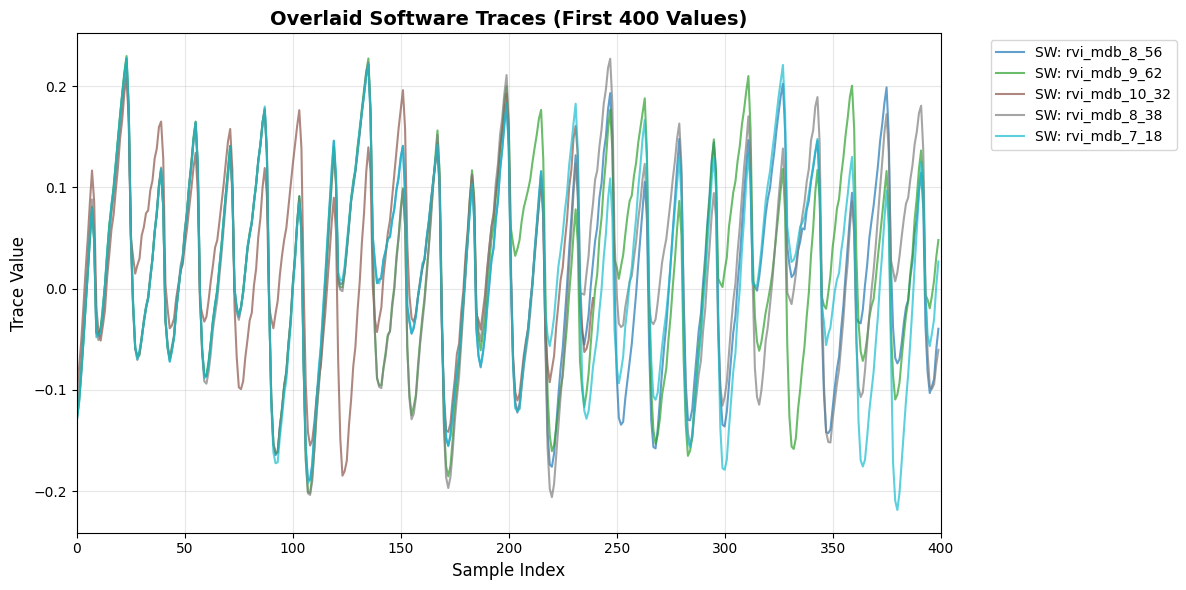

In [7]:
import re
import os
import random
import numpy as np
import matplotlib.pyplot as plt

pattern = "rvi_mdb_[0-9]+_[0-9]+$"
all_sws = datgen.get_software_directories()
filtered_list = [item for item in all_sws if re.match(pattern, item.split("/")[-1])]
selected_sws = random.choices(filtered_list, k=5)

# Set matplotlib backend and figure size
plt.figure(figsize=(12, 6))
plt.clf()  # Clear any existing plots

# Generate colors for different traces
colors = plt.cm.tab10(np.linspace(0, 1, 5))

# Load and plot traces
for i, sw in enumerate(selected_sws):
    trace = np.load(os.path.join(sw, "trace.npy"))
    
    # Take first 400 values (or less if trace is shorter)
    n_repetitions = trace.shape[0]
    head_trace = trace[random.randint(0,n_repetitions-1)][:400]
    
    # Debug: Print trace info
    print(f"Trace {i}: shape={trace.shape}, head_shape={head_trace.shape}, min={head_trace.min():.2f}, max={head_trace.max():.2f}")
    
    # Plot with different colors and labels
    plt.plot(range(len(head_trace)), head_trace, 
             color=colors[i], 
             alpha=0.7, 
             linewidth=1.5,
             label=f"SW: {os.path.basename(sw)}")

# Customize the plot
plt.title("Overlaid Software Traces (First 400 Values)", fontsize=14, fontweight='bold')
plt.xlabel("Sample Index", fontsize=12)
plt.ylabel("Trace Value", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Set reasonable axis limits to avoid huge plots
plt.xlim(0, 400)
# Let matplotlib auto-scale y-axis, but you can set manual limits if needed
# plt.ylim(-1000, 1000)  # Uncomment and adjust if needed

plt.tight_layout()

# Show the plot
plt.show()

If above visual doesn't look "smooth", in particular, if the first ~150 or so samples don't overlap neatly. Something probably went wrong, and data should be regenerated. Particularly, for oversampling rate = 16, experience has shown that sine-like waves should be clearly visible within each instruction cycle.

# Prune Preamble and Epilogue

Before pruning, we need to set up the tooling to do so. 
From the instructionAnalysis notebook, we found some key information regarding the preamble / epilogue instruction cycle lengths, as well as the amount that was unaccounted for. 
We start by hardcoding them below.

```
============================================================
INSTRUCTION CYCLE SUMMARY
============================================================

HEAD (Prefix):
  Empirical cycles:   11
  Theoretical cycles:  6
  Unaccounted cycles:  5 ✓

TAIL (Suffix):
  Empirical cycles:   12
  Theoretical cycles:  9
  Unaccounted cycles:  3 ✓

============================================================
```

In [8]:
CYCLE_LENGTH = 16
INSTRUCTION_CYCLES = {
    "nop" : 1, 
    "c.addi" : 1, 
    "auipc" : 1, 
    "addi" : 1, 
    "c.mv" : 1, 
    "c.swsp" : 2, 
    "c.lwsp" : 2, 
    "c.li" : 1, 
    "ret" : 2,
    "jalr" : 2,
    "c.jal" : 2
}
INSTRUCTION_LENGTHS = {key: val * CYCLE_LENGTH for key, val in INSTRUCTION_CYCLES.items()}
head_unaccounted, tail_unaccounted = 5 * CYCLE_LENGTH, 3 * CYCLE_LENGTH

In [9]:
import re
import os

def read_labels(sw_dir):
    labels_path = os.path.join(sw_dir, "label_instr.txt")
    with open(labels_path, "r") as f:
        labels = f.read()
    return labels

def parse_instructions(instructions):
    """
    Parse instruction labels to extract metadata about prefix, core, and suffix sections.
    This function is idempotent - calling it on already parsed/pruned instructions returns None.
    
    Args:
        instructions: List of instruction strings or a single multi-line string
    
    Returns:
        dict or None: If valid prefix and suffix found, returns parsed_dict containing:
            {
                'prefix': list of prefix instructions,
                'core': list of generated instructions,
                'suffix': list of suffix instructions,
                'first_cmv_index': index of first c.mv,
                'last_cmv_index': index of last c.mv,
                'total_count': total number of instructions
            }
        If already pruned (neither prefix nor suffix found), returns None.
        
    Raises:
        ValueError: If only one of prefix or suffix is found (invalid state)
    """

    # Handle both string and list inputs
    if isinstance(instructions, str):
        inst_str = instructions
    elif isinstance(instructions, list):
        inst_str = '\n'.join(instructions)
    else:
        raise Exception("instructions should be a string or a list of strings")
    
    # Single regex pattern with 3 capturing groups: (prefix)(core)(suffix)
    prefix_pattern = '^c\.addi\n(?:c\.swsp\n)+auipc\naddi\nc\.mv'
    suffix_pattern = 'c\.mv\n(?:c\.lwsp\n)+c\.li\nc\.addi\nret\n(?:c\.)?jal$'
    pattern = rf'({prefix_pattern})\n?(.*?)\n?({suffix_pattern})'
    
    match = re.search(pattern, inst_str, re.DOTALL)
    
    if match:
        # Both prefix and suffix found - parse the structure
        prefix_lines = match.group(1).split('\n')
        core_lines = match.group(2).split('\n') if match.group(2) else []
        suffix_lines = match.group(3).split('\n')
        
        # Remove empty strings
        core_lines = [line for line in core_lines if line]
        
        first_cmv = len(prefix_lines) - 1  # Last instruction in prefix is c.mv
        last_cmv = len(prefix_lines) + len(core_lines)  # First instruction in suffix is c.mv
        
        return {
            'prefix': prefix_lines,
            'core': core_lines,
            'suffix': suffix_lines,
            'first_cmv_index': first_cmv,
            'last_cmv_index': last_cmv,
            'total_count': len(inst_str.split("\n"))
        }
    
    else:
        # Check if partial patterns exist to determine error vs already pruned
        prefix_only = re.search(rf'{prefix_pattern}', inst_str)
        suffix_only = re.search(rf'{suffix_pattern}', inst_str)
        
        if prefix_only or suffix_only:
            if prefix_only:
                raise ValueError("Found prefix pattern but no matching suffix pattern - invalid instruction sequence")
            else:
                raise ValueError("Found suffix pattern but no matching prefix pattern - invalid instruction sequence")
        else:
            # Neither found - already pruned
            return None

In [9]:
def prune_visual(selected_sw, prefix_length, suffix_length):
    # Intended for use prior to pruning!
    print(f"Selected software: {os.path.basename(selected_sw)}")
    print(f"Prefix length: {prefix_length}, Suffix length: {suffix_length}")
    
    # Set matplotlib backend and figure size
    plt.figure(figsize=(12, 6))
    plt.clf()  # Clear any existing plots
    
    # Load trace data
    trace = np.load(os.path.join(selected_sw, "trace.npy"))
    n_repetitions = trace.shape[0]
    
    print(f"Trace shape: {trace.shape}")
    print(f"Number of repetitions: {n_repetitions}")
    
    # Generate colors for different repetitions
    colors = plt.cm.viridis(np.linspace(0, 1, n_repetitions))
    
    # First plot the full non-pruned traces (faded background)
    for rep_idx in range(n_repetitions):
        full_trace = trace[rep_idx]
        plt.plot(range(len(full_trace)), full_trace, 
                 color=colors[rep_idx], 
                 alpha=0.2, 
                 linewidth=0.8)
    
    # Add vertical lines to show prefix/suffix boundaries on the full trace
    plt.axvline(x=prefix_length, color='red', linestyle='-', alpha=0.8, linewidth=2,
                label=f'Prefix end (idx {prefix_length})')
    if suffix_length > 0:
        suffix_start = len(trace[0]) - suffix_length
        plt.axvline(x=suffix_start, color='orange', linestyle='-', alpha=0.8, linewidth=2,
                    label=f'Suffix start (idx {suffix_start})')
    
    # Plot the pruned traces (core section only) with dashed lines
    for rep_idx in range(n_repetitions):
        rep_trace = trace[rep_idx][prefix_length:-suffix_length]  # Pruned to core section
        x_offset = prefix_length  # Start plotting from prefix_length position
        
        # Plot with different colors and dashed lines
        plt.plot(range(x_offset, x_offset + len(rep_trace)), rep_trace, 
                 color=colors[rep_idx], 
                 alpha=0.8, 
                 linewidth=1.5,
                 linestyle='--',
                 label=f"Rep {rep_idx + 1} (core)" if n_repetitions <= 10 else None)
    
    # Customize the plot
    plt.title(f"All Repetitions of {os.path.basename(selected_sw)} - Core Section Highlighted", 
              fontsize=14, fontweight='bold')
    plt.xlabel("Sample Index", fontsize=12)
    plt.ylabel("Trace Value", fontsize=12)
    
    # Only show legend if we have reasonable number of repetitions
    if n_repetitions <= 10:
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    
    # Show the plot
    plt.show()

In [10]:
def prune_uneven_traces(full_trace, prefix_length, suffix_length):
    """Trim, prune, re-pad using np.pad."""
    # Trim trailing zeros and prune each trace
    pruned_traces = []
    for trace in full_trace:
        trimmed = np.trim_zeros(trace, trim='b')
        if len(trimmed) > prefix_length + suffix_length:
            pruned_traces.append(trimmed[prefix_length:-suffix_length])
        else:
            pruned_traces.append(np.array([]))
    
    # Handle edge case
    if not pruned_traces or all(len(t) == 0 for t in pruned_traces):
        return np.zeros((len(full_trace), 0), dtype=full_trace.dtype)
    
    # Find max length and pad each trace
    max_len = max(len(t) for t in pruned_traces)
    
    result = np.array([
        np.pad(trace, (0, max_len - len(trace)), mode='constant', constant_values=0)
        for trace in pruned_traces
    ])
    
    return result

In [11]:
def prune_software(sw_dir: str) -> None:
    """
    Prune software traces and labels to remove prefix and suffix, keeping only the core section.
    
    Args:
        sw_dir: Path to software directory containing trace.npy and label files
    """
    CYCLE_LENGTH = 16
    INSTRUCTION_CYCLES = {
        "nop" : 1, 
        "c.addi" : 1, 
        "auipc" : 1, 
        "addi" : 1, 
        "c.mv" : 1, 
        "c.swsp" : 2, 
        "c.lwsp" : 2, 
        "c.li" : 1, 
        "ret" : 2,
        "jalr" : 2,
        "c.jal" : 2,
        "jal" : 2
    }
    INSTRUCTION_LENGTHS = {key: val * CYCLE_LENGTH for key, val in INSTRUCTION_CYCLES.items()}
    head_unaccounted, tail_unaccounted = 5 * CYCLE_LENGTH, 3 * CYCLE_LENGTH
    
    # Read and parse instruction labels
    labels = read_labels(sw_dir)
    metadata = parse_instructions(labels)
    
    # Calculate prefix and suffix lengths in trace samples
    prefix_length = sum([INSTRUCTION_LENGTHS[inst] for inst in metadata["prefix"]]) + head_unaccounted
    suffix_length = sum([INSTRUCTION_LENGTHS[inst] for inst in metadata["suffix"]]) + tail_unaccounted
    
    # Load and prune trace data
    trace_path = os.path.join(sw_dir, "trace.npy")
    full_trace = np.load(trace_path)
    pruned_trace = prune_uneven_traces(full_trace, prefix_length, suffix_length)
    
    # Prune basic instruction labels
    pruned_labels = metadata["core"]
    
    # Read and prune register-specific instruction labels
    label_reg_path = os.path.join(sw_dir, "label_instr_reg.txt")
    with open(label_reg_path, "r") as f:
        reg_labels = [line.strip() for line in f.read().strip().split('\n') if line.strip()]
    
    # Find the core section in register labels by matching instruction prefixes
    core_instructions = metadata["core"]
    pruned_reg_labels = []
    
    if core_instructions:
        # Find where core section starts in reg_labels
        core_start_idx = None
        for i in range(len(reg_labels) - len(core_instructions) + 1):
            # Check if we found a matching sequence
            match = True
            for j, core_inst in enumerate(core_instructions):
                if i + j >= len(reg_labels):
                    match = False
                    break
                # Check if reg_labels[i+j] starts with core_inst
                if not reg_labels[i + j].startswith(core_inst):
                    match = False
                    break
            
            if match:
                core_start_idx = i
                break
        
        if core_start_idx is not None:
            # Extract the matching core section
            pruned_reg_labels = reg_labels[core_start_idx:core_start_idx + len(core_instructions)]
        else:
            # Fallback: if exact matching fails, try to find approximate matches
            print(f"Warning: Could not find exact core section in {label_reg_path}")
            print(f"Core instructions: {core_instructions[:3]}...")
            print(f"Register labels sample: {reg_labels[:3]}...")
            pruned_reg_labels = []
    
    # Save pruned files, overwriting originals
    
    # Save pruned trace
    np.save(trace_path, pruned_trace)
    
    # Save pruned basic labels
    label_path = os.path.join(sw_dir, "label_instr.txt")
    with open(label_path, "w") as f:
        f.write('\n'.join(pruned_labels) + '\n')
    
    # Save pruned register labels
    if pruned_reg_labels:
        with open(label_reg_path, "w") as f:
            f.write('\n'.join(pruned_reg_labels) + '\n')
    else:
        # If no core section found, write empty file or keep original
        print(f"Warning: No core register labels found for {sw_dir}")
    
    print(f"Pruned {sw_dir}:")
    print(f"  Trace: {full_trace.shape} -> {pruned_trace.shape}")
    print(f"  Labels: {len(metadata['prefix']) + len(metadata['core']) + len(metadata['suffix'])} -> {len(pruned_labels)}")
    print(f"  Reg labels: {len(reg_labels)} -> {len(pruned_reg_labels)}")

## Perform Pruning

In [12]:
# Prune all software matching pattern.

pattern = "rvi_mdb_[0-9]+_[0-9]+$"
all_sws = datgen.get_software_directories()
filtered_list = [item for item in all_sws if re.match(pattern, item.split("/")[-1])]

for selected_sw in filtered_list:
    labels = read_labels(selected_sw)
    metadata = parse_instructions(labels)
    if metadata: # i.e. skip if already pruned  
        prune_software(selected_sw)
    else:
        print(f"Skipping {selected_sw}")

Skipping /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_10_0
Skipping /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_10_1
Skipping /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_10_10
Skipping /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_10_11
Skipping /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_10_12
Skipping /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_10_13
Skipping /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_10_14
Skipping /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_10_15
Skipping /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_10_16
Skipping /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_10_17
Skipping /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_10_18
Skipping /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_10_19
Skipping /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_10_2
Skipping /home/eduemat/chipwhisperer_lab/software/src/rvi_mdb_10_20
Skipping /home/eduemat/chipwhisperer_lab/software/s

Trace shape: (5, 384)
Number of repetitions: 5


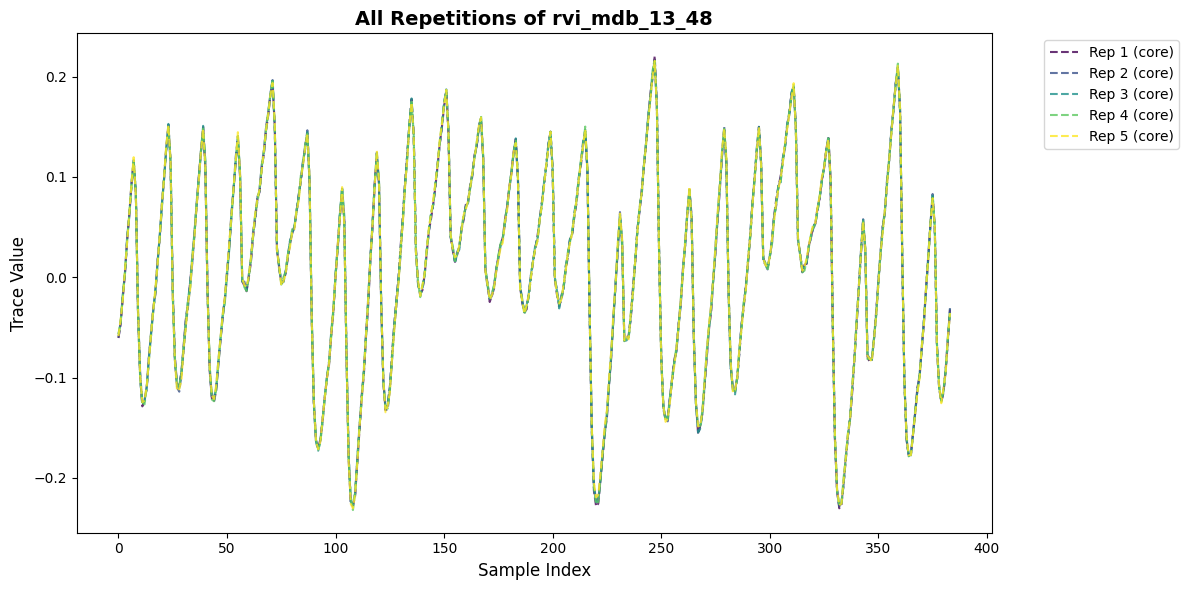

In [14]:
selected_sw = random.choice(filtered_list)

# Set matplotlib backend and figure size
plt.figure(figsize=(12, 6))
plt.clf()  # Clear any existing plots

# Load trace data
trace = np.load(os.path.join(selected_sw, "trace.npy"))
n_repetitions = trace.shape[0]

print(f"Trace shape: {trace.shape}")
print(f"Number of repetitions: {n_repetitions}")

# Generate colors for different repetitions
colors = plt.cm.viridis(np.linspace(0, 1, n_repetitions))

# First plot the full non-pruned traces (faded background)
for rep_idx in range(n_repetitions):
    full_trace = trace[rep_idx]
    plt.plot(range(len(full_trace)), full_trace, 
             color=colors[rep_idx], 
             alpha=0.8, 
             linewidth=1.5,
             linestyle='--',
             label=f"Rep {rep_idx + 1} (core)" if n_repetitions <= 10 else None)

# Customize the plot
plt.title(f"All Repetitions of {os.path.basename(selected_sw)}", 
          fontsize=14, fontweight='bold')
plt.xlabel("Sample Index", fontsize=12)
plt.ylabel("Trace Value", fontsize=12)

# Only show legend if we have reasonable number of repetitions
if n_repetitions <= 10:
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

# Show the plot
plt.show()

## Build Datasets

In [15]:
from sklearn.model_selection import train_test_split
from typing import List, Dict, Optional

def create_dataset_dict(software_list: List[str], 
                       train_ratio: float = 0.7, 
                       val_ratio: float = 0.15, 
                       test_ratio: float = 0.15,
                       random_state: Optional[int] = 42) -> Dict[str, List[str]]:
    """
    Create a dataset_dict for train-validation-test split using sklearn.
    
    Args:
        software_list (List[str]): List of software directory names
        train_ratio (float): Proportion for training set (default: 0.7)
        val_ratio (float): Proportion for validation set (default: 0.15)
        test_ratio (float): Proportion for test set (default: 0.15)
        random_state (Optional[int]): Random state for reproducibility (default: 42)
    
    Returns:
        Dict[str, List[str]]: Dictionary with keys 'train', 'val', 'test'
    """
    # Store only leaf directory name
    software_list = [sw_dir.split("/")[-1] for sw_dir in software_list]
    
    # Validate ratios
    if abs(train_ratio + val_ratio + test_ratio - 1.0) > 1e-10:
        raise ValueError(f"Ratios must sum to 1.0, got {train_ratio + val_ratio + test_ratio}")
    
    # First split: separate out test set
    temp_ratio = val_ratio / (train_ratio + val_ratio)  # val ratio within the remaining data
    train_val, test = train_test_split(
        software_list, 
        test_size=test_ratio, 
        random_state=random_state
    )
    
    # Second split: separate train and validation from the remaining data
    train, val = train_test_split(
        train_val,
        test_size=temp_ratio,
        random_state=random_state
    )
    
    dataset_dict = {
        'train': train,
        'val': val, 
        'test': test
    }
    
    # Print summary
    total = len(software_list)
    print(f"Dataset split summary:")
    print(f"  Total software: {total}")
    print(f"  Train: {len(train)} ({len(train)/total:.1%})")
    print(f"  Val: {len(val)} ({len(val)/total:.1%})")
    print(f"  Test: {len(test)} ({len(test)/total:.1%})")
    
    return dataset_dict

In [16]:
pattern = "rvi_mdb_[0-9]+_[0-9]+$"
all_sws = datgen.get_software_directories()
filtered_list = [item for item in all_sws if re.match(pattern, item.split("/")[-1])]

dw = DataWrangler()
dataset_dict = create_dataset_dict(filtered_list)

Dataset split summary:
  Total software: 1600
  Train: 1119 (69.9%)
  Val: 241 (15.1%)
  Test: 240 (15.0%)


In [17]:
# Check the tokenizer, pseudoinstructions may occur if not avoided deliberately in spike decoding
dw.genDatasetFairseq(dataset_dict, name = "full_rvi_mdb")

Dataset 'full_rvi_mdb' generated successfully in /home/eduemat/chipwhisperer_lab/datasets/full_rvi_mdb
Manifests created at /home/eduemat/chipwhisperer_lab/datasets/full_rvi_mdb/manifest_*.json


# Testing Scripts

This section contains snippets for testing the data generation pipeline.

## Verify ISG generation, and verify consistency with debugger output

In [ ]:
# For testing the isg
sw = "test"
datsynth.gen_c_file(sw,10000,overwrite=True)
datgen.build_software(sw, force=True)
datgen.generate_labels(sw, force=True)

In [ ]:
# Just for checking if Spike results are consistent with debugger - it is
from collections import defaultdict

counter = defaultdict(lambda: 0)
# https://www.cs.sfu.ca/~ashriram/Courses/CS295/assets/notebooks/RISCV/RISCV_CARD.pdf
pseudoinstr = {"zext.b":"andi", "blez":"bge", "bgtz":"blt", "neg":"sub", "nop":"addi", "mv":"addi", "not":"xori","beqz":"beq","bnez":"bne","bgez":"bge",
              "bltz":"blt","bgtz":"blt","bgt":"blt","ble":"bge","bgtu":"bltu","bleu":"bgeu","j":"jal","jr":"jalr","ret":"jalr"}
for swdir in datgen.get_software_directories():
    if "beebs" in swdir or "claude" in swdir:
        with open(os.path.join(swdir, "debug_instr.txt")) as f:
            instrseq = f.readlines()
        with open(os.path.join(swdir, "label_instr.txt")) as f:
            ref = f.readlines()
        ref = [instr.split()[0] for instr in ref]
        instrseq = [instr.split()[0] for instr in instrseq]
        for gdb, spike in zip(instrseq, ref):
            if gdb not in spike:
                if pseudoinstr.get(gdb, "") == spike:
                    continue
                counter[swdir.split("/")[-1]]+=1
                #print(f"gdb: spike - {gdb in spike} - {gdb} : {spike}")
print(counter)

## Verify Trace Capture

In [ ]:
# For fast iteration on software modifications.
software = "isg_50_10"
#datgen.build_software(software, force=False)
datgen.generate_data(software, icw, force=True, save=False)
#datgen.generate_labels(software, icw, platform="CW305_IBEX", force=True)

In [ ]:
trace = datgen.last_trace
from matplotlib import pyplot as plt
plt.plot(list(range(len(trace))),trace)

In [ ]:
icw.reload(datgen.get_ext(software))
trace = datgen._capture_trace(software, icw)
from matplotlib import pyplot as plt
plt.plot(list(range(len(trace))),trace)